## 导入数据

In [3]:
# 基本库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 机器学习模块
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# 集成方法
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb

# 数据预处理
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# colors = sns.color_palette('pastel')[0:len(travel_ratio)]


In [4]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

user_id  Age Attrition     BusinessTravel  DailyRate  \
0     1374   58        No      Travel_Rarely        605   
1     1092   45        No      Travel_Rarely        950   
2      768   40        No      Travel_Rarely        300   
3      569   36        No         Non-Travel       1434   
4      911   25       Yes  Travel_Frequently        599   

               Department  DistanceFromHome  Education    EducationField  \
0                   Sales                21          3     Life Sciences   
1  Research & Development                28          3  Technical Degree   
2                   Sales                26          3         Marketing   
3                   Sales                 8          4     Life Sciences   
4                   Sales                24          1     Life Sciences   

   EmployeeCount  ...  RelationshipSatisfaction  StandardHours  \
0              1  ...                         3             80   
1              1  ...                         4             80   
2              1  ...                         2             80   
3              1  ...                         2             80   
4              1  ...                         4             80   

  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                1                 29                      2                2   
1                1                  8                      3                3   
2                1                  8                      3                2   
3                0                 10                      1                3   
4                0                  1                      4                3   

  YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0              1                   0                       0   
1              5                   4                       0   
2              7                   7                       7   
3             10                   7                       0   
4              1                   0                       1   

   YearsWithCurrManager  
0                     0  
1                     3  
2                     5  
3                     9  
4                     0  

[5 rows x 36 columns]

In [5]:
data = data.drop(columns=['user_id'])
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   58        No      Travel_Rarely        605                   Sales   
1   45        No      Travel_Rarely        950  Research & Development   
2   40        No      Travel_Rarely        300                   Sales   
3   36        No         Non-Travel       1434                   Sales   
4   25       Yes  Travel_Frequently        599                   Sales   

   DistanceFromHome  Education    EducationField  EmployeeCount  \
0                21          3     Life Sciences              1   
1                28          3  Technical Degree              1   
2                26          3         Marketing              1   
3                 8          4     Life Sciences              1   
4                24          1     Life Sciences              1   

   EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0            1938  ...                         3            80   
1            1546  ...                         4            80   
2            1066  ...                         2            80   
3             789  ...                         2            80   
4            1273  ...                         4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 1                 29                      2               2   
1                 1                  8                      3               3   
2                 1                  8                      3               2   
3                 0                 10                      1               3   
4                 0                  1                      4               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               1                  0                        0   
1               5                  4                        0   
2               7                  7                        7   
3              10                  7                        0   
4               1                  0                        1   

   YearsWithCurrManager  
0                     0  
1                     3  
2                     5  
3                     9  
4                     0  

[5 rows x 35 columns]

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # preprocessing预处理模块 - 用于特征标准化、独热编码和数值编码
from sklearn.model_selection import train_test_split # model_selection 模型选择 - 用于将数据集划分为训练集和测试集


# 分离特征数据和标签数据
X = data.drop(['Attrition'], axis=1)  # 特征数据 除了标签以外的列读到x里面
# y = data['Attrition']  # 标签数据
y = data['Attrition'].map({'Yes': 1, 'No': 0})


In [7]:
X = X.drop(['StandardHours','EmployeeCount','Over18','EmployeeNumber','PerformanceRating'], axis=1)
# StandardHours
# EmployeeCount

## 描述性分析

### 对object列进行分析

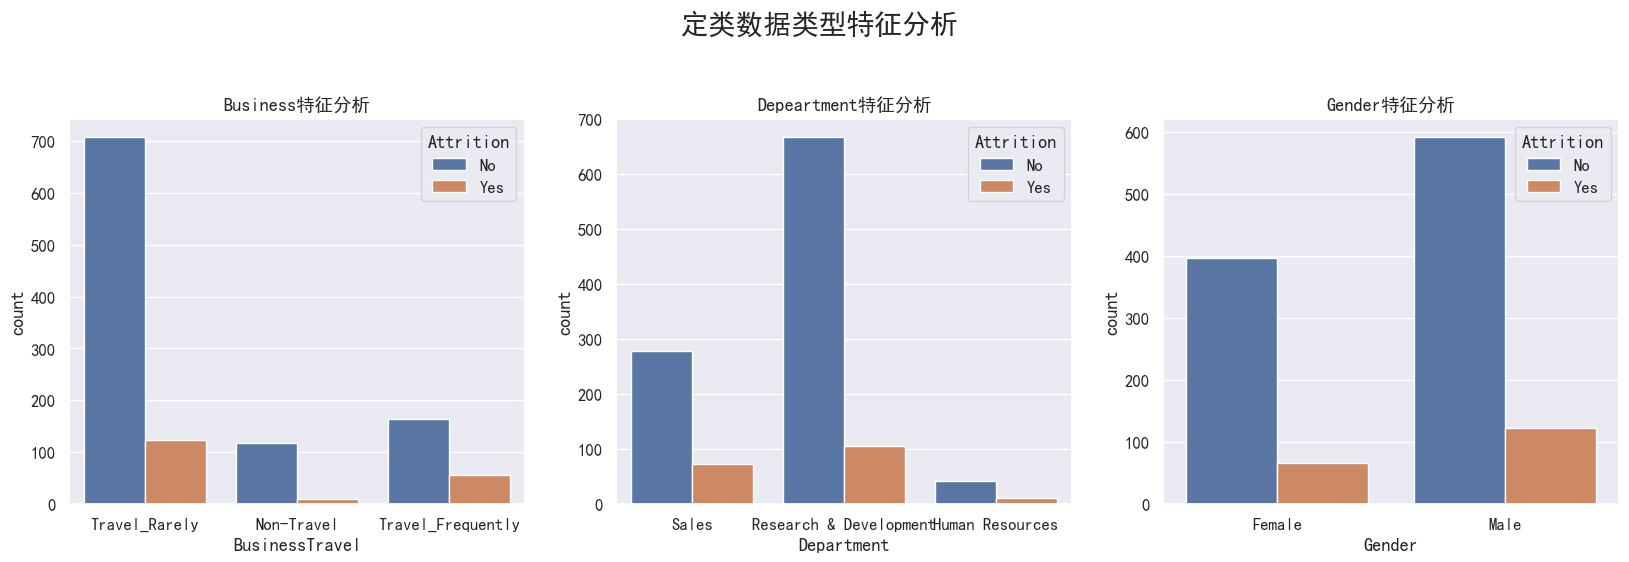

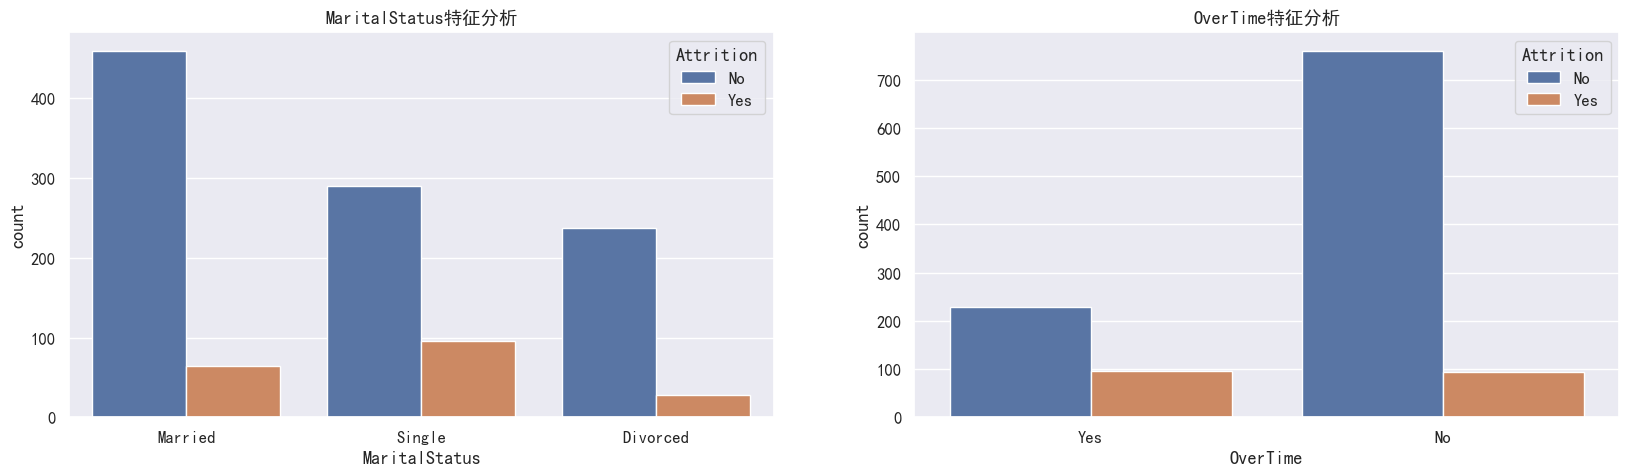

In [312]:
train_data = data
#对各个定类变量分别与标签进行可视化；
#观察可知经常出差的离职率是最高的；研究部门的人数占比最多，但是销售部门的人员流动性更高，即离职率更高；男性且单身的离职率相对较高
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1.1)  # 解决Seaborn中文显示问题并调整字体大小
f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='BusinessTravel',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='Department',hue='Attrition',data=train_data,ax=ax2)
sns.countplot(x='Gender',hue='Attrition',data=train_data,ax=ax3)
ax1.set_title('Business特征分析')
ax2.set_title('Depeartment特征分析')
ax3.set_title('Gender特征分析')
f.suptitle('定类数据类型特征分析',size=20,y=1.1)
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='OverTime',hue='Attrition',data=train_data,ax=ax2)
ax1.set_title('MaritalStatus特征分析')
ax2.set_title('OverTime特征分析')

plt.show()

男性离职率较高
单身离职率较高
研究部门人数多 销售也多

In [313]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   58        No      Travel_Rarely        605                   Sales   
1   45        No      Travel_Rarely        950  Research & Development   
2   40        No      Travel_Rarely        300                   Sales   
3   36        No         Non-Travel       1434                   Sales   
4   25       Yes  Travel_Frequently        599                   Sales   

   DistanceFromHome  Education    EducationField  EmployeeCount  \
0                21          3     Life Sciences              1   
1                28          3  Technical Degree              1   
2                26          3         Marketing              1   
3                 8          4     Life Sciences              1   
4                24          1     Life Sciences              1   

   EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0            1938  ...                         3            80   
1            1546  ...                         4            80   
2            1066  ...                         2            80   
3             789  ...                         2            80   
4            1273  ...                         4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 1                 29                      2               2   
1                 1                  8                      3               3   
2                 1                  8                      3               2   
3                 0                 10                      1               3   
4                 0                  1                      4               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               1                  0                        0   
1               5                  4                        0   
2               7                  7                        7   
3              10                  7                        0   
4               1                  0                        1   

   YearsWithCurrManager  
0                     0  
1                     3  
2                     5  
3                     9  
4                     0  

[5 rows x 35 columns]

### 加班和离职的关系

交叉表：
Attrition   No  Yes
OverTime           
No         760   93
Yes        228   95

标准化交叉表（离职率）：
Attrition        No       Yes
OverTime                     
No         0.890973  0.109027
Yes        0.705882  0.294118


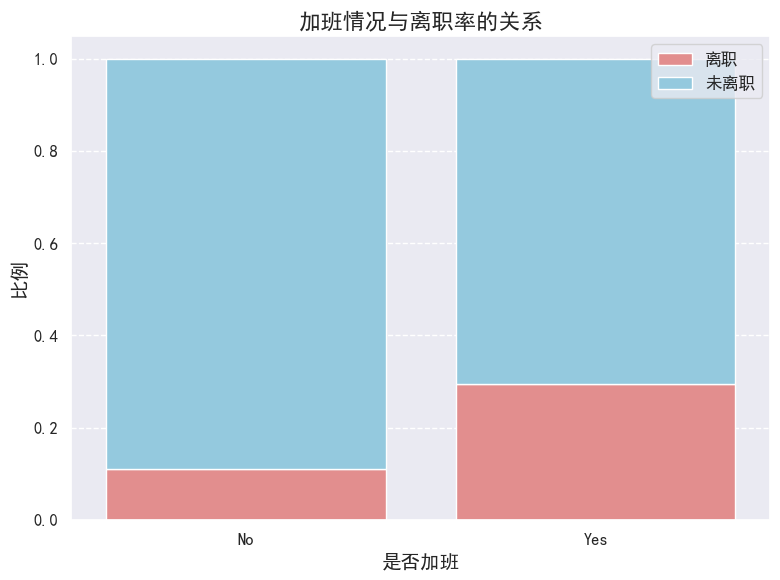

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1.1)  # 解决Seaborn中文显示问题并调整字体大小
# 假设您已经将数据加载到一个名为 df 的 Pandas DataFrame 中
# 如果还没有加载数据，您可以使用以下代码加载（假设数据文件名为 'employee_data.csv'）：
# df = pd.read_csv('employee_data.csv')

# 为了演示，我将创建一个示例 DataFrame（您需要替换为您的实际数据）
# data = {
#     'OverTime': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
#     'Attrition': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes']
# }
# df = pd.DataFrame(data)
df = data
# 1. 计算交叉表（列联表）
cross_tab = pd.crosstab(df['OverTime'], df['Attrition'])
print("交叉表：")
print(cross_tab)

# 2. 计算加班员工和不加班员工的离职率
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)
print("\n标准化交叉表（离职率）：")
print(cross_tab_norm)

# 3. 绘制柱状图
plt.figure(figsize=(8, 6))  # 设置图形大小

# 方法一：使用 Pandas 内置的绘图功能
# cross_tab_norm.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])

# 方法二：使用 Seaborn 绘图（推荐，更美观）
sns.barplot(x=cross_tab_norm.index, y=cross_tab_norm['Yes'], color='lightcoral', label='离职')
sns.barplot(x=cross_tab_norm.index, y=cross_tab_norm['No'], bottom=cross_tab_norm['Yes'], color='skyblue', label='未离职')

plt.title('加班情况与离职率的关系', fontsize=16)
plt.xlabel('是否加班', fontsize=14)
plt.ylabel('比例', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()  # 显示图例
plt.grid(axis='y', linestyle='--')  # 添加网格线
plt.tight_layout()  # 自动调整子图参数
plt.show()

# 也可以绘制堆叠柱状图，但对于这个二元变量，堆叠柱状图可能不如并排柱状图直观
# sns.histplot(data = df, x = 'OverTime', hue = "Attrition", multiple="stack", shrink=.8)

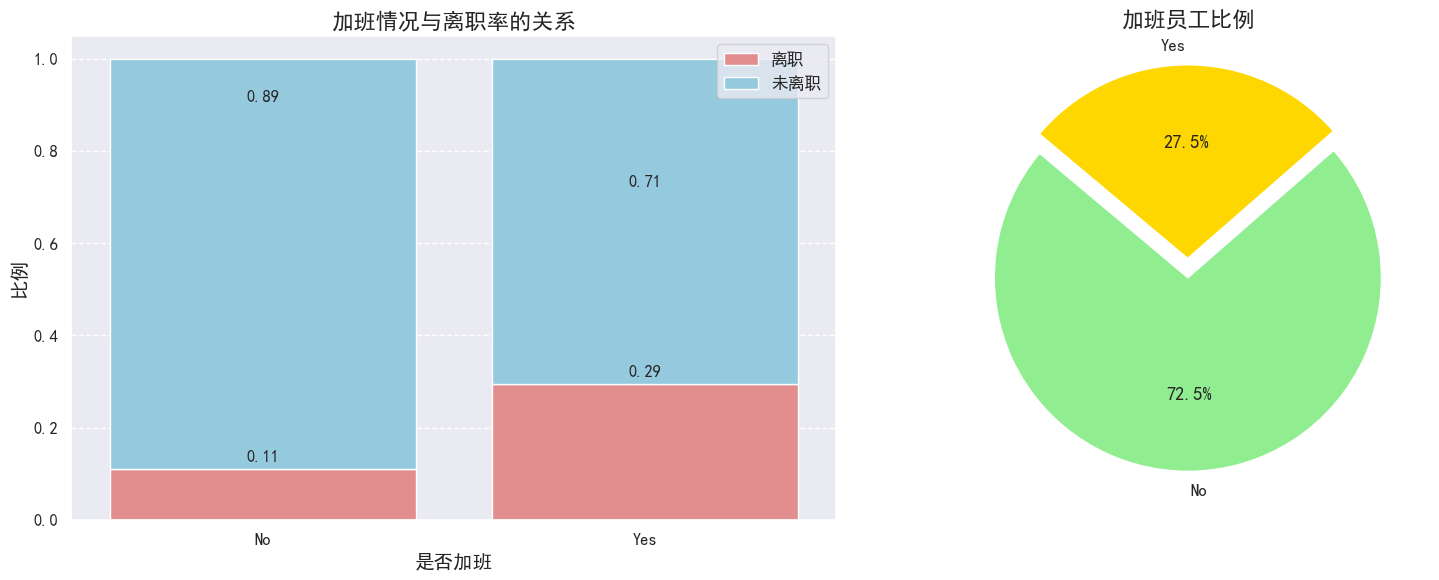

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设您已经将数据加载到一个名为 df 的 Pandas DataFrame 中
# 如果还没有加载数据，您可以使用以下代码加载（假设数据文件名为 'employee_data.csv'）：
# df = pd.read_csv('employee_data.csv')

# 为了演示，我将创建一个示例 DataFrame（您需要替换为您的实际数据）
# 数据与您提供的交叉表数据一致
# data = {
#     'OverTime': ['No'] * 853 + ['Yes'] * 323,
#     'Attrition': ['No'] * 760 + ['Yes'] * 93 + ['No'] * 228 + ['Yes'] * 95
# }
df = pd.DataFrame(data)

# 1. 计算交叉表（列联表）
cross_tab = pd.crosstab(df['OverTime'], df['Attrition'])

# 2. 计算加班员工和不加班员工的离职率
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# 3. 绘制图形
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 创建包含两个子图的图形

# 3.1 左图：加班与离职关系图
sns.barplot(x=cross_tab_norm.index, y=cross_tab_norm['Yes'], color='lightcoral', label='离职', ax=axes[0])
sns.barplot(x=cross_tab_norm.index, y=cross_tab_norm['No'], bottom=cross_tab_norm['Yes'], color='skyblue', label='未离职', ax=axes[0])
axes[0].set_title('加班情况与离职率的关系', fontsize=16)
axes[0].set_xlabel('是否加班', fontsize=14)
axes[0].set_ylabel('比例', fontsize=14)
axes[0].tick_params(labelsize=12)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--')

# 在柱子上标注比例值
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

# 3.2 右图：加班比例图
overtime_counts = df['OverTime'].value_counts()
overtime_ratio = overtime_counts / len(df)

axes[1].pie(overtime_ratio, labels=overtime_ratio.index, autopct='%1.1f%%', startangle=140,
            colors=['lightgreen', 'gold'], explode=(0, 0.1)) # 加入阴影效果
axes[1].set_title('加班员工比例', fontsize=16)
# plt.axis('equal')  # 使饼图为正圆形（如果需要）
plt.tight_layout()
plt.show()

### 出差和离职的关系

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 设置中文字体（根据您的系统和字体文件路径修改）
font_path = './heiti.ttf'  # 替换为您的字体文件路径
font_prop = FontProperties(fname=font_path, size=14)

# 1. 计算交叉表（列联表）
cross_tab = pd.crosstab(df['BusinessTravel'], df['Attrition'])

# 2. 计算每种出差情况下的离职率
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# 3. 绘制图形
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 创建包含两个子图的图形

# 3.1 左图：出差情况与离职率关系图
sns.barplot(x=cross_tab_norm.index, y=cross_tab_norm['Yes'], color='salmon', ax=axes[0])
axes[0].set_title('出差情况与离职率的关系', fontsize=16, fontproperties=font_prop)
axes[0].set_xlabel('出差情况', fontsize=14, fontproperties=font_prop)
axes[0].set_ylabel('离职率', fontsize=14, fontproperties=font_prop)
axes[0].tick_params(labelsize=12)
axes[0].grid(axis='y', linestyle='--')
#设置x轴标签的顺序
axes[0].set_xticklabels(['Non-Travel','Travel_Rarely','Travel_Frequently'])
# 在柱子上标注比例值
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12,
                     fontproperties=font_prop)

# 3.2 右图：出差情况分布饼图
travel_counts = df['BusinessTravel'].value_counts()
travel_ratio = travel_counts / len(df)

# 使用更柔和的调色板
colors = sns.color_palette('pastel')[0:len(travel_ratio)]

axes[1].pie(travel_ratio,  autopct='%1.1f%%', startangle=140,
            colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
            pctdistance=0.85)  # 调整百分比标签的距离
# 添加图例（使用岗位名称）
axes[1].legend(travel_ratio.index, title='出差情况', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12,prop=font_prop)
axes[1].set_title('出差情况分布', fontsize=16,fontproperties=font_prop)

# 添加中心圆环，使饼图变成环形图
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\3002853283.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['Non-Travel','Travel_Rarely','Travel_Frequently'])


KeyboardInterrupt: 

### 岗位和离职的关系

C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\55602575.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_role_counts['Attrition Rate'], y=job_role_counts.index,
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\55602575.py:54: UserWarning: Glyph 23703 (\N{CJK UNIFIED IDEOGRAPH-5C97}) missing from current font.
  plt.tight_layout(rect=[0, 0, 0.75, 1])
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\55602575.py:54: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  plt.tight_layout(rect=[0, 0, 0.75, 1])
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23703 (\N{CJK UNIFIED IDEOGRAPH-5C97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:1

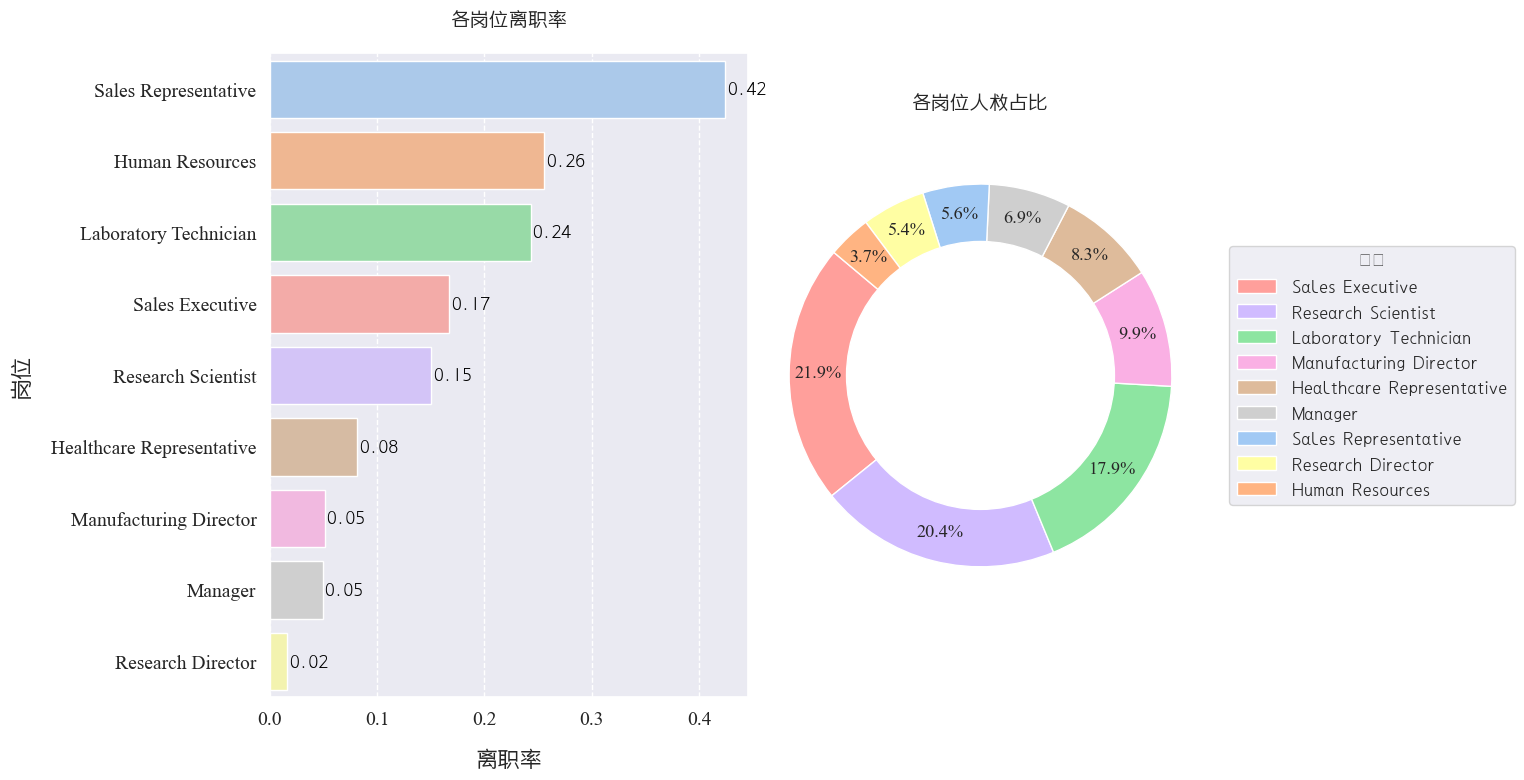

In [ ]:
font_path = './heiti.ttf'  # 替换为您的字体文件路径
# 创建字体属性对象
font_prop = FontProperties(fname=font_path, size=14)

df = pd.DataFrame(data)  # 将字典转换为 DataFrame
# 1. 计算数据
job_role_counts = df.groupby('JobRole')['Attrition'].value_counts().unstack(fill_value=0)
job_role_counts['Total'] = job_role_counts['No'] + job_role_counts['Yes']
job_role_counts['Attrition Rate'] = job_role_counts['Yes'] / job_role_counts['Total']
job_role_counts = job_role_counts.sort_values('Attrition Rate', ascending=False)
job_role_distribution = df['JobRole'].value_counts()

# 2. 设置颜色
num_job_roles = len(job_role_counts)  # 获取岗位数量
colors = sns.color_palette('pastel')[0:len(job_role_distribution)]


# 创建岗位与颜色的映射字典
color_map = dict(zip(job_role_counts.index, colors))

# 3. 绘制图形
plt.rcParams['font.family'] = 'Times New Roman'
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 3.1 左图：柱状图
sns.barplot(x=job_role_counts['Attrition Rate'], y=job_role_counts.index,
            palette=color_map,  # 使用颜色映射
            ax=axes[0], orient='h')

axes[0].set_title('各岗位离职率', fontsize=18, fontweight='bold', pad=20, fontproperties=font_prop)
axes[0].set_xlabel('离职率', fontsize=16, labelpad=15, fontproperties=font_prop)
axes[0].set_ylabel('岗位', fontsize=16, labelpad=15, fontproperties=font_prop)
axes[0].tick_params(labelsize=14)
axes[0].grid(axis='x', linestyle='--')

for p in axes[0].patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    axes[0].annotate(value, (x, y), ha='center', va='center', fontsize=14, color='black', fontproperties=font_prop)

# 3.2 右图：饼图
axes[1].pie(job_role_distribution, labels=None, autopct='%1.1f%%', startangle=140,
            colors=[color_map[job] for job in job_role_distribution.index],  # 使用颜色映射
            wedgeprops={'edgecolor': 'white', 'linewidth': 1},
            pctdistance=0.85)

axes[1].legend(job_role_distribution.index, title='岗位', loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, prop=font_prop)
axes[1].set_title('各岗位人数占比', fontsize=18, fontweight='bold', pad=20, fontproperties=font_prop)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

### 工作满意度 和离职的关系

In [ ]:
data.head()['JobSatisfaction']

0    4
1    4
2    1
3    1
4    4
Name: JobSatisfaction, dtype: int64

In [ ]:
type(data)

pandas.core.frame.DataFrame

C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\942524567.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_rates.values, palette=colors, ax=axes[1]) # 修改y
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\942524567.py:28: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(x=attrition_counts.index, y=attrition_rates.values, palette=colors, ax=axes[1]) # 修改y


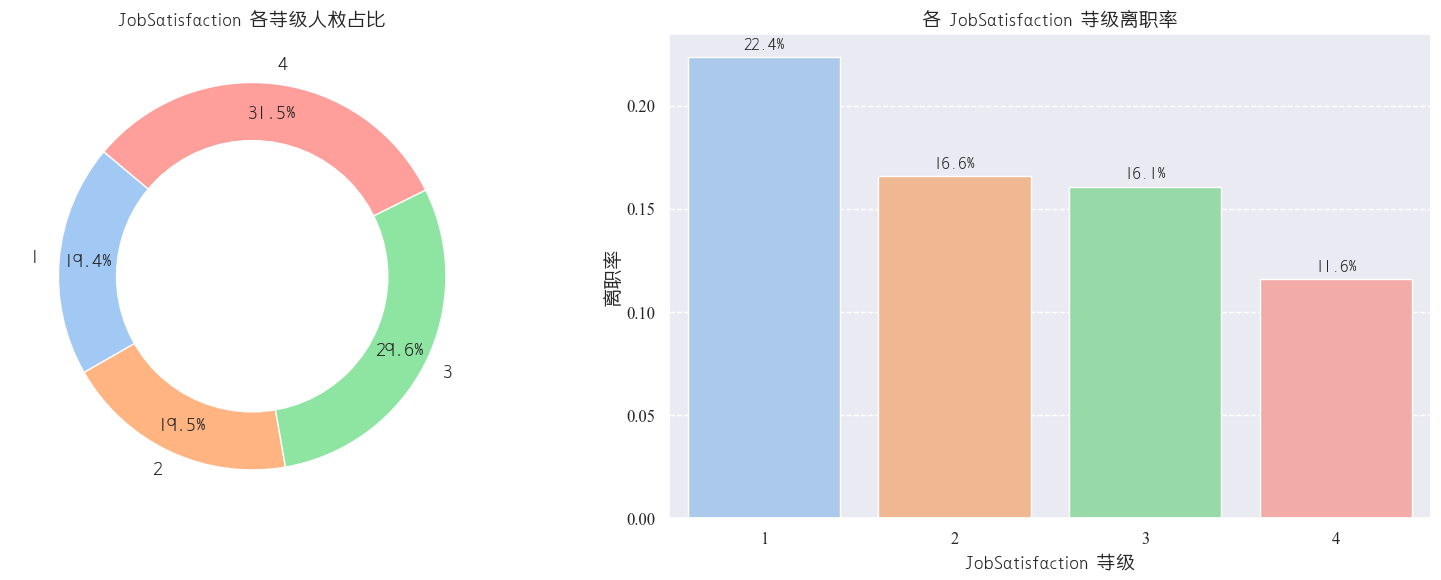


各 JobSatisfaction 等级离职率：
JobSatisfaction
1    0.223684
2    0.165939
3    0.160920
4    0.115903
dtype: float64


In [ ]:
df = data
font_path = './heiti.ttf'  # 替换为您的字体文件路径
# 创建字体属性对象
font_prop = FontProperties(fname=font_path, size=14)
# 1. 计算每个 JobSatisfaction 等级的员工数量
satisfaction_counts = df['JobSatisfaction'].value_counts().sort_index()

# 2. 计算每个 JobSatisfaction 等级下的离职人数
attrition_counts = df[df['Attrition'] == 'Yes'].groupby('JobSatisfaction')['Attrition'].count().reindex(satisfaction_counts.index, fill_value=0)

# 3. 计算每个 JobSatisfaction 等级下的离职率
attrition_rates = (attrition_counts / satisfaction_counts).fillna(0)

# --------------------  绘制图形  --------------------

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 饼图（环形图）：JobSatisfaction 分布
colors = sns.color_palette('pastel')[0:len(job_role_distribution)]
axes[0].pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140,
            colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
            pctdistance=0.85, textprops={'fontsize': 12, 'fontproperties': font_prop})
axes[0].set_title('JobSatisfaction 各等级人数占比', fontsize=16, fontproperties=font_prop)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[0].add_artist(centre_circle)

# 2. 柱状图：JobSatisfaction 与离职人数
sns.barplot(x=attrition_counts.index, y=attrition_rates.values, palette=colors, ax=axes[1]) # 修改y
axes[1].set_title('各 JobSatisfaction 等级离职率', fontsize=16, fontproperties=font_prop) #修改标题
axes[1].set_xlabel('JobSatisfaction 等级', fontsize=14, fontproperties=font_prop)
axes[1].set_ylabel('离职率', fontsize=14, fontproperties=font_prop) #修改纵轴
axes[1].tick_params(labelsize=12)
axes[1].grid(axis='y', linestyle='--')

# 在柱子上标注离职率（百分比）
for i, p in enumerate(axes[1].patches):
    # 获取柱子对应的 JobSatisfaction 等级
    job_satisfaction = attrition_counts.index[i]
    # 获取该等级的离职率
    rate = attrition_rates[job_satisfaction]
    axes[1].annotate(f'{rate:.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12,
                     fontproperties=font_prop)

plt.tight_layout()
plt.show()

# --------------------  打印离职率  --------------------

print("\n各 JobSatisfaction 等级离职率：")
print(attrition_rates)

### 教育程度和离职

C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\1434404549.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rates.index, y=attrition_rates.values, palette=colors, ax=axes[1])
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\1434404549.py:24: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.barplot(x=attrition_rates.index, y=attrition_rates.values, palette=colors, ax=axes[1])


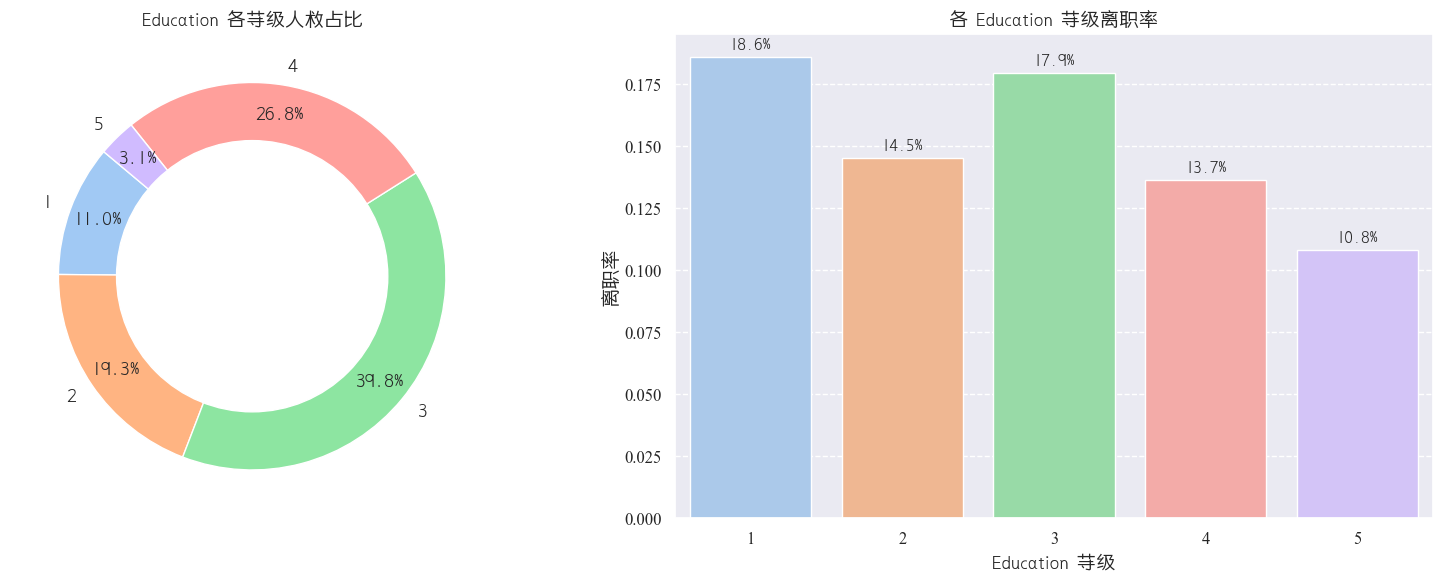


各 Education 等级离职率：
Education
1    0.186047
2    0.145374
3    0.179487
4    0.136508
5    0.108108
dtype: float64


In [ ]:

# 1. 计算每个 Education 等级的员工数量
education_counts = df['Education'].value_counts().sort_index()

# 2. 计算每个 Education 等级下的离职人数
attrition_counts = df[df['Attrition'] == 'Yes'].groupby('Education')['Attrition'].count().reindex(education_counts.index, fill_value=0)

# 3. 计算每个 Education 等级下的离职率
attrition_rates = (attrition_counts / education_counts).fillna(0)

# --------------------  绘制图形  --------------------

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 饼图（环形图）：Education 分布
colors = sns.color_palette('pastel')[0:len(job_role_distribution)]
axes[0].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140,
            colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1},
            pctdistance=0.85, textprops={'fontsize': 12, 'fontproperties': font_prop})
axes[0].set_title('Education 各等级人数占比', fontsize=16, fontproperties=font_prop)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[0].add_artist(centre_circle)

# 2. 柱状图：Education 与离职率
sns.barplot(x=attrition_rates.index, y=attrition_rates.values, palette=colors, ax=axes[1])
axes[1].set_title('各 Education 等级离职率', fontsize=16, fontproperties=font_prop)
axes[1].set_xlabel('Education 等级', fontsize=14, fontproperties=font_prop)
axes[1].set_ylabel('离职率', fontsize=14, fontproperties=font_prop)
axes[1].tick_params(labelsize=12)
axes[1].grid(axis='y', linestyle='--')

# 在柱子上标注离职率（百分比）
for i, p in enumerate(axes[1].patches):
    job_satisfaction = attrition_counts.index[i]
    rate = attrition_rates[job_satisfaction]
    axes[1].annotate(f'{rate:.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12,
                     fontproperties=font_prop)

plt.tight_layout()
plt.show()

# --------------------  打印离职率  --------------------

print("\n各 Education 等级离职率：")
print(attrition_rates)

### 年龄

C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\1938489563.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rates.index, y=attrition_rates.values, palette=color, ax=axes[0])  # 使用了不同的颜色
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\1938489563.py:34: UserWarning: 
The palette list has fewer values (9) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=attrition_rates.index, y=attrition_rates.values, palette=color, ax=axes[0])  # 使用了不同的颜色
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\1938489563.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Age', data=df, palette=color, ax=axes[1]) # 使用了不同的调色板
C:

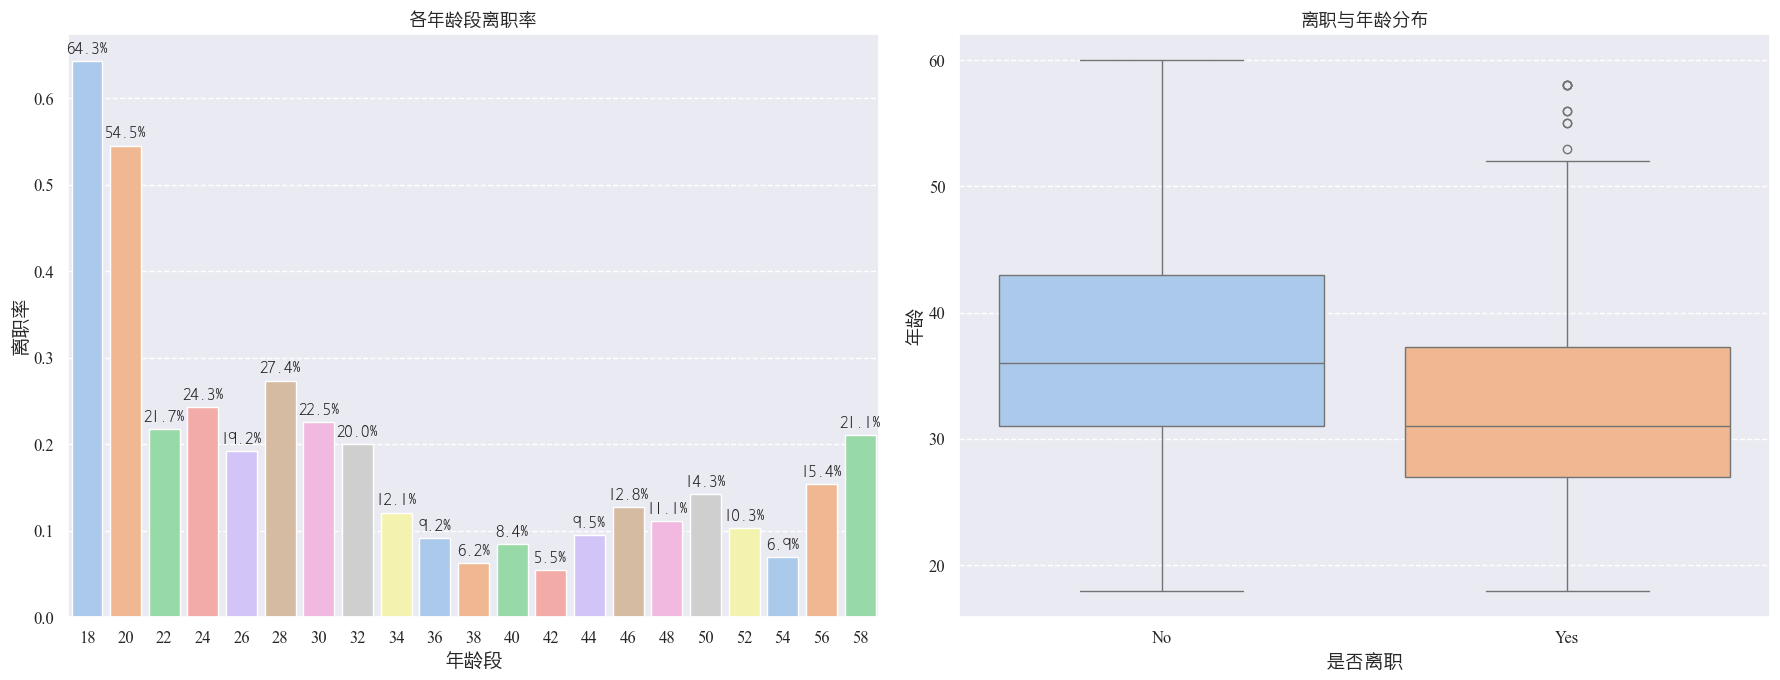


各年龄段离职率：
AgeGroup
18    0.642857
20    0.545455
22    0.217391
24    0.243243
26    0.191781
28    0.273684
30    0.225490
32    0.200000
34    0.120968
36    0.091837
38    0.062500
40    0.084337
42    0.054545
44    0.095238
46    0.127660
48    0.111111
50    0.142857
52    0.103448
54    0.068966
56    0.153846
58    0.210526
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 假设您的数据存储在名为 df 的 DataFrame 中
# 如果您还没有加载数据，请取消下面这行的注释，并替换为您的文件路径
# df = pd.read_csv('your_data.csv')

# 设置中文字体
font_path = './heiti.ttf'  # 替换为您系统中的中文字体文件路径，例如 SimHei.ttf
font_prop = fm.FontProperties(fname=font_path)

# 1. 为了便于分析，我们将年龄划分为不同的年龄段
#    这里使用 pandas 的 cut 函数进行年龄分组
bins = list(range(18, 62, 2)) 
labels = [f'{i}' for i in range(18, 60, 2)]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 2. 计算每个年龄段的员工数量
age_group_counts = df['AgeGroup'].value_counts().sort_index()

# 3. 计算每个年龄段下的离职人数
attrition_counts = df[df['Attrition'] == 'Yes'].groupby('AgeGroup')['Attrition'].count().reindex(age_group_counts.index, fill_value=0)

# 4. 计算每个年龄段的离职率
attrition_rates = (attrition_counts / age_group_counts).fillna(0)

# --------------------  绘制图形  --------------------

fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # 调整了figsize 使两个图都更清楚一些
color=sns.color_palette('pastel')[0:len(job_role_distribution)]
# 1. 柱状图：年龄段与离职率
sns.barplot(x=attrition_rates.index, y=attrition_rates.values, palette=color, ax=axes[0])  # 使用了不同的颜色
axes[0].set_title('各年龄段离职率', fontsize=16, fontproperties=font_prop)
axes[0].set_xlabel('年龄段', fontsize=14, fontproperties=font_prop)
axes[0].set_ylabel('离职率', fontsize=14, fontproperties=font_prop)
axes[0].tick_params(labelsize=12)
axes[0].grid(axis='y', linestyle='--')
plt.margins(x=0)  # 移除X轴边缘空白
# 在柱子上标注离职率（百分比）
for i, p in enumerate(axes[0].patches):
    age_group = attrition_rates.index[i]
    rate = attrition_rates[age_group]
    axes[0].annotate(f'{rate:.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12,
                     fontproperties=font_prop)

# 2. 箱线图：离职率与年龄的分布
sns.boxplot(x='Attrition', y='Age', data=df, palette=color, ax=axes[1]) # 使用了不同的调色板
axes[1].set_title('离职与年龄分布', fontsize=16, fontproperties=font_prop)
axes[1].set_xlabel('是否离职', fontsize=14, fontproperties=font_prop)
axes[1].set_ylabel('年龄', fontsize=14, fontproperties=font_prop)
axes[1].tick_params(labelsize=12)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# --------------------  打印离职率  --------------------

print("\n各年龄段离职率：")
print(attrition_rates)

### 知乎-可视化图

In [ ]:
print(df['Attrition'].unique())

['No' 'Yes']


In [ ]:
print(cross_tab_norm.columns)

Index(['No', 'Yes'], dtype='object', name='Attrition')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Manager'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Sales Executive'),
  Text(3, 0, 'Sales Representative'),
  Text(4, 0, 'Laboratory Technician'),
  Text(5, 0, 'Manufacturing Director'),
  Text(6, 0, 'Human Resources'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Healthcare Representative')])

c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  func(*args, **kwargs)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  func(*args, **kwargs)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) missing from current font.
  func(*args, **kwargs)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPy

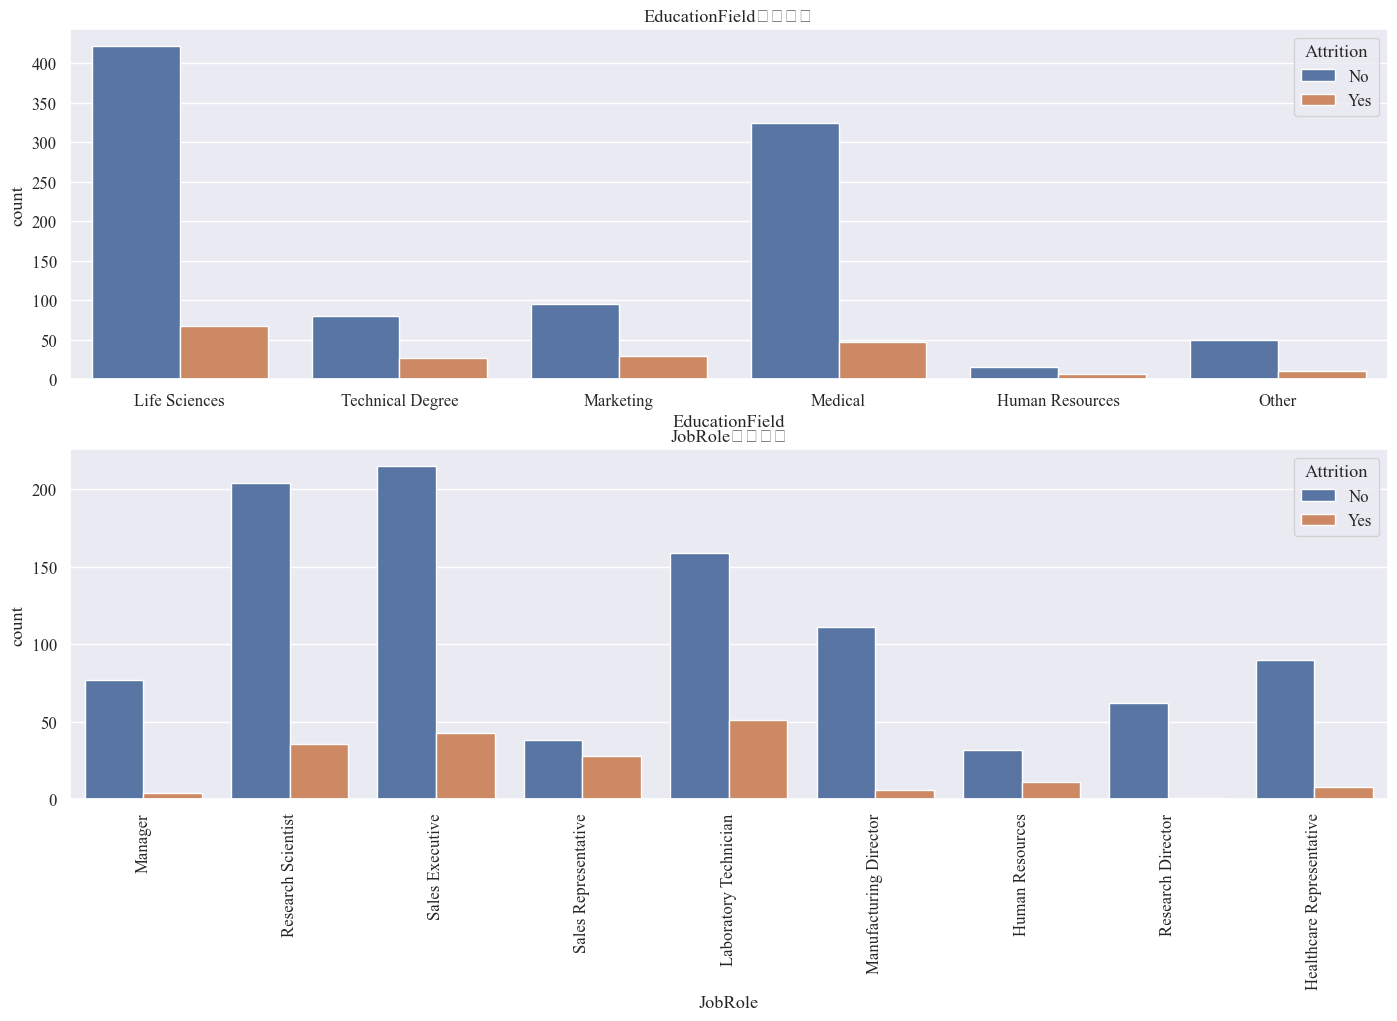

In [ ]:
f,[ax1,ax2]=plt.subplots(2,1,figsize=(17,10))
sns.countplot(x='EducationField',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='JobRole',hue='Attrition',data=train_data,ax=ax2)
ax1.set_title(u'EducationField特征分析')
ax2.set_title(u'JobRole特征分析')
plt.xticks(rotation=90)

实验室技术人员
销售

c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


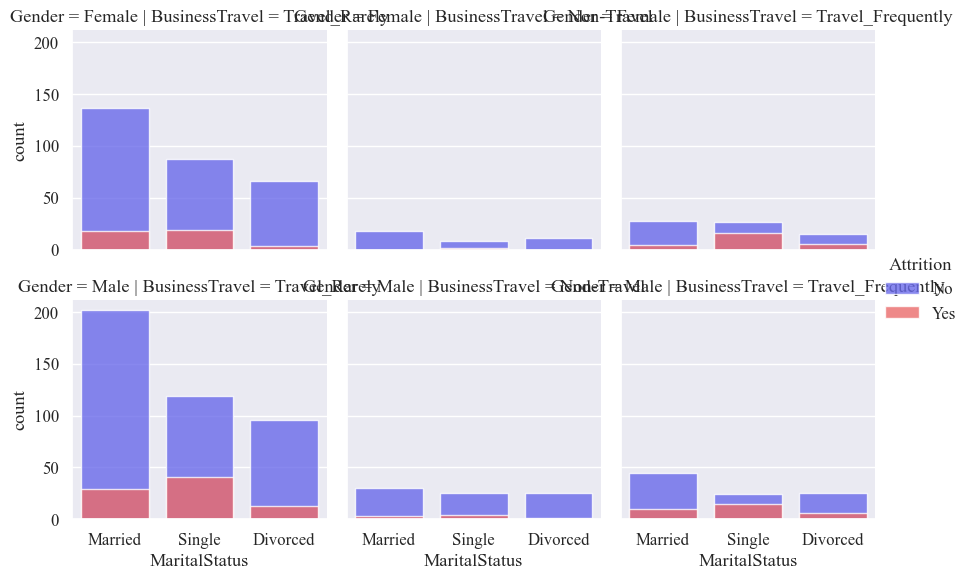

In [ ]:
grid=sns.FacetGrid(train_data,row='Gender',col='BusinessTravel',hue='Attrition',palette='seismic')
grid.map(sns.countplot,'MaritalStatus',alpha=0.8)
grid.add_legend()

<Axes: xlabel='PercentSalaryHike', ylabel='Attrition'>

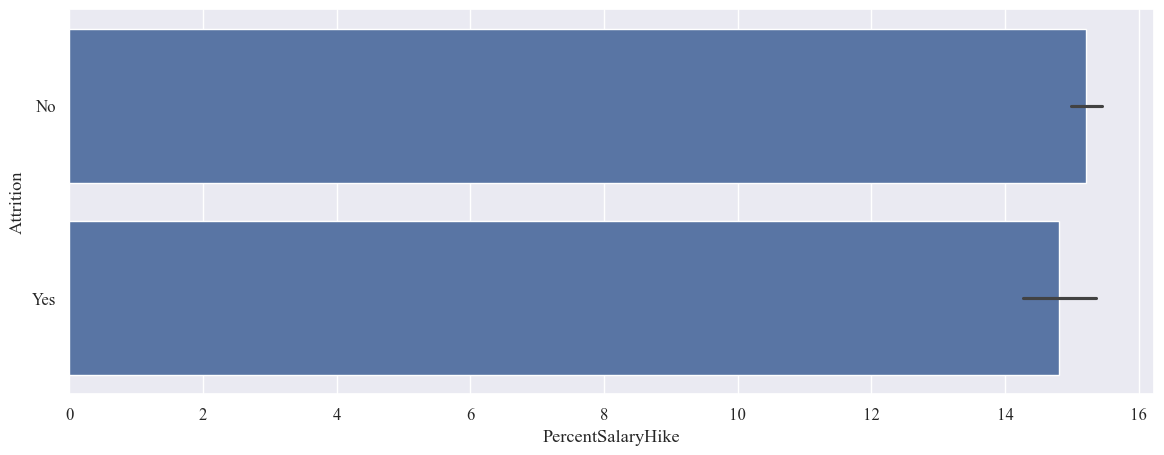

In [ ]:
#工资提成的离职情况分布
plt.figure(figsize=(14,5))
sns.barplot(x='PercentSalaryHike',y='Attrition',data=train_data)

<Axes: xlabel='Age', ylabel='Attrition'>

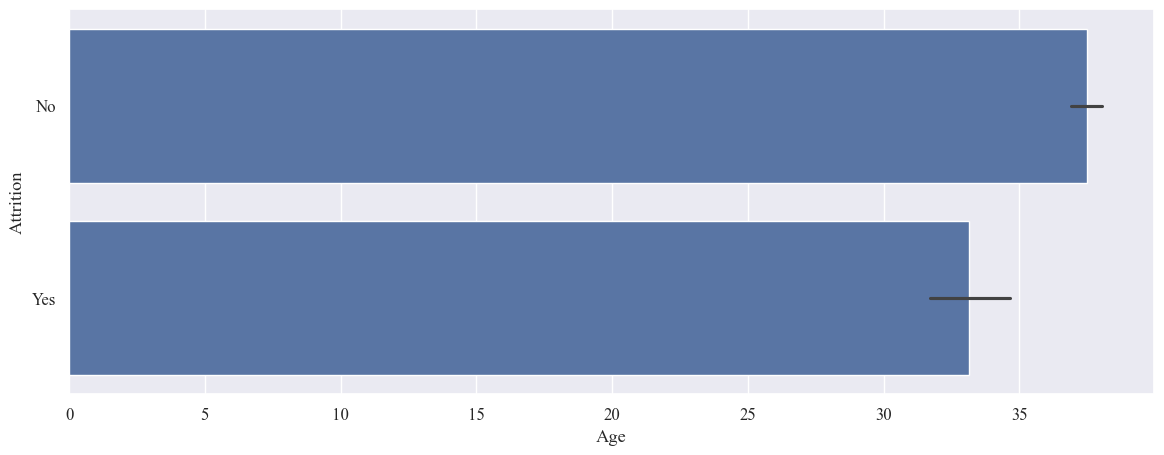

In [ ]:
#年龄的离职情况分布
plt.figure(figsize=(14,5))
sns.barplot(x='Age',y='Attrition',data=train_data)

C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\1728691404.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PercentSalaryHike', y='Attrition', data=train_data, palette='coolwarm', ci=None)  # 移除置信区间
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\1728691404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PercentSalaryHike', y='Attrition', data=train_data, palette='coolwarm', ci=None)  # 移除置信区间
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\1728691404.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Attrition', data=train_data, palette='viridis', ci=None)  # 移除置信区间
C:\Users\Tiffany\AppData\Local\Temp\ipykernel_10756\1728691404.py:25: FutureWarning: 

Passing `palette` without

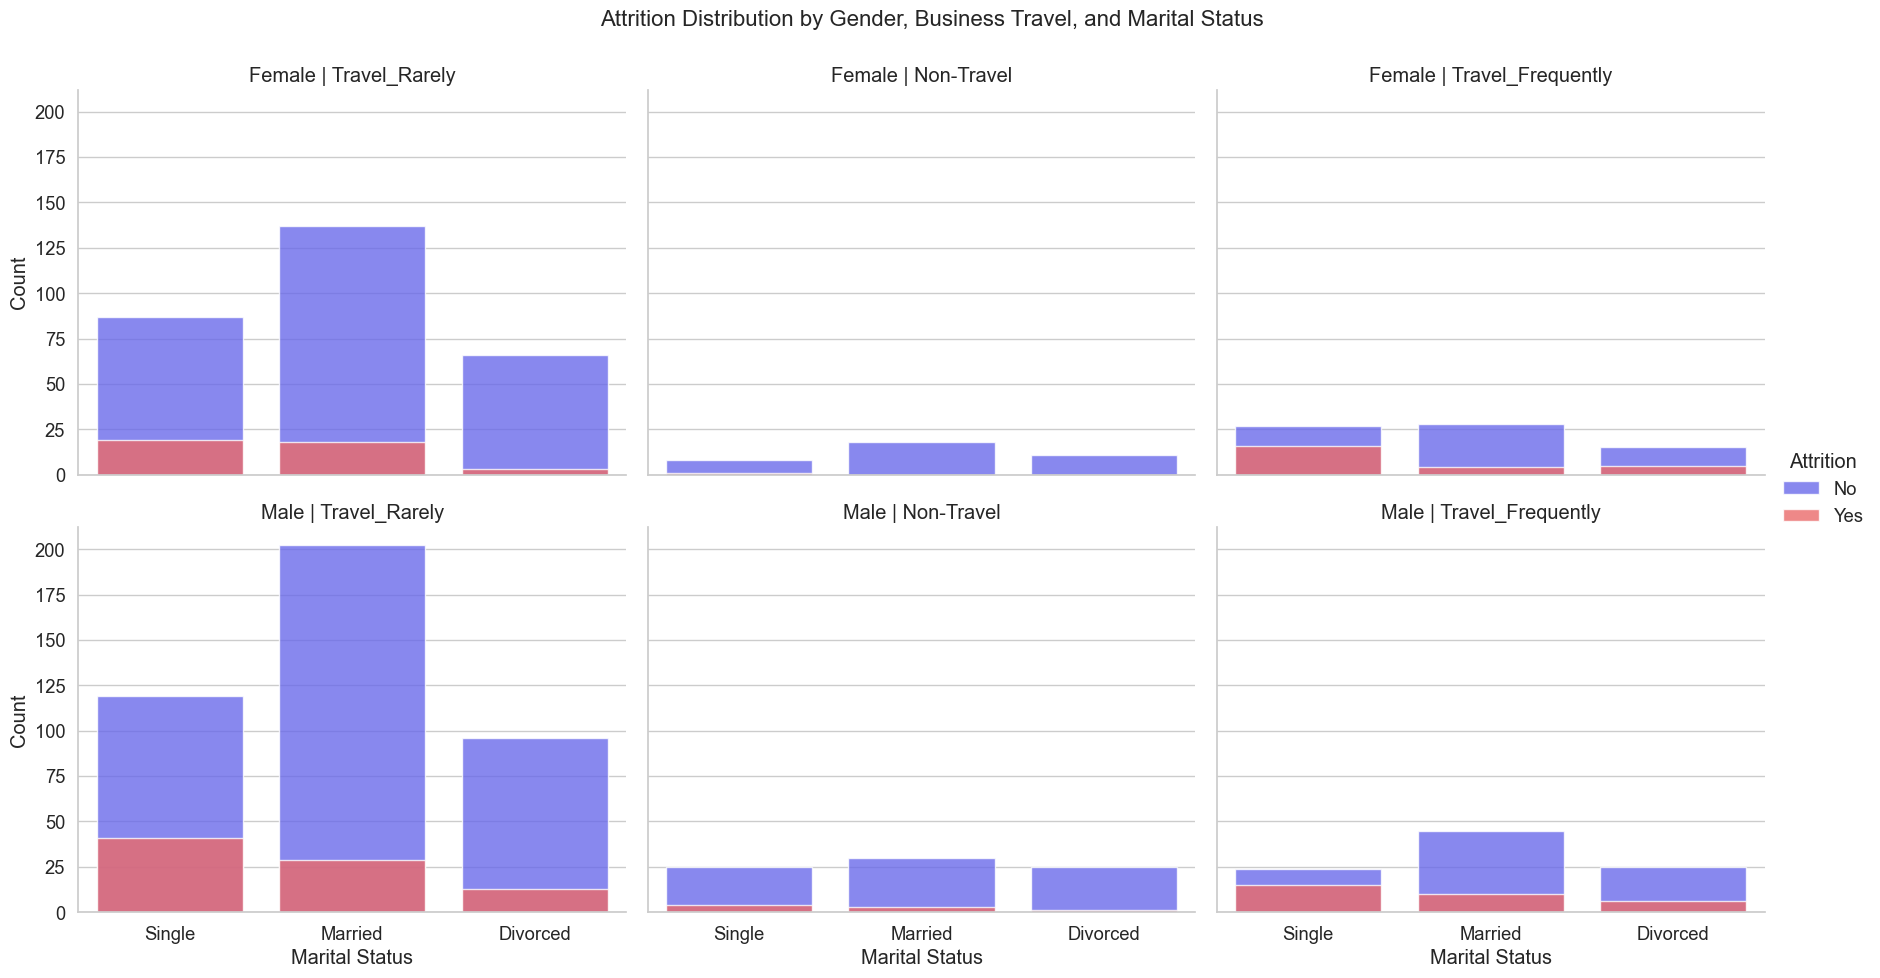

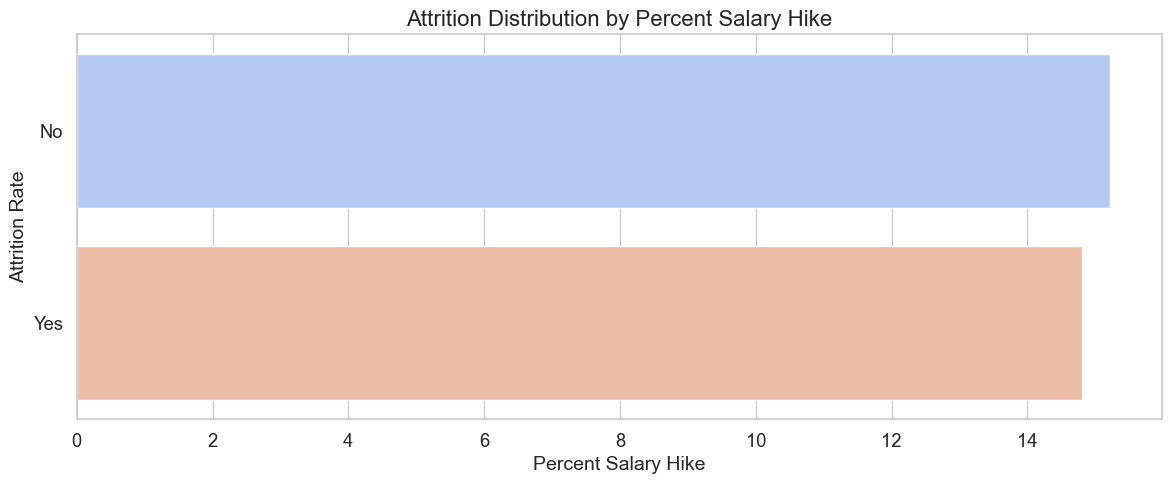

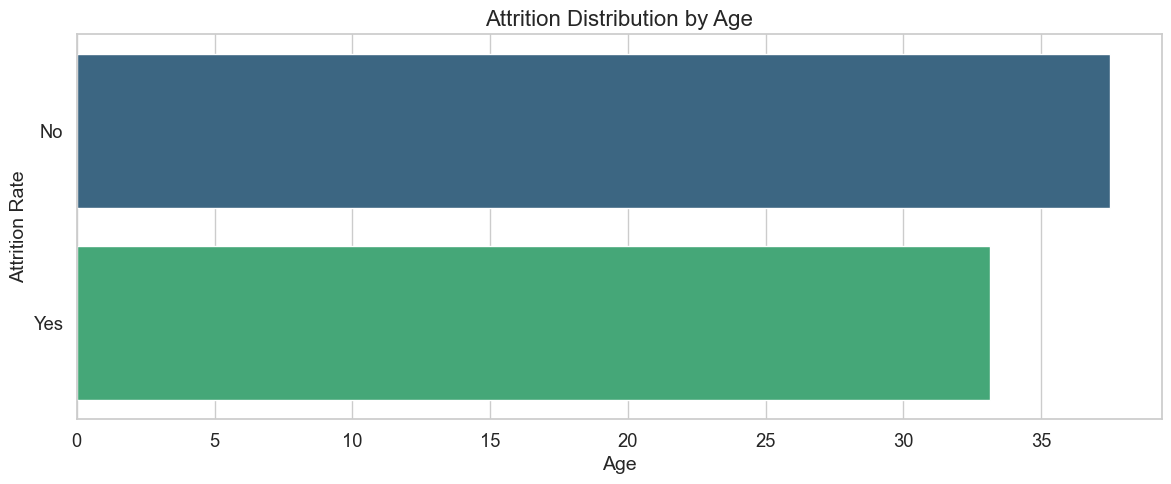

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置全局字体大小和样式
sns.set(style="whitegrid", font_scale=1.2)

# 分面网格图：按性别和出差频率分面，颜色表示离职状态
grid = sns.FacetGrid(train_data, row='Gender', col='BusinessTravel', hue='Attrition', palette='seismic', height=5, aspect=1.2)
grid.map(sns.countplot, 'MaritalStatus', alpha=0.8, order=['Single', 'Married', 'Divorced'])  # 指定婚姻状况的顺序
grid.add_legend(title='Attrition')  # 添加图例并设置标题
grid.set_axis_labels('Marital Status', 'Count')  # 设置轴标签
grid.set_titles(row_template='{row_name}', col_template='{col_name}')  # 设置子图标题
plt.subplots_adjust(top=0.9)  # 调整子图间距
grid.fig.suptitle('Attrition Distribution by Gender, Business Travel, and Marital Status', fontsize=16)  # 设置总标题

# 工资提成的离职情况分布
plt.figure(figsize=(14, 5))
sns.barplot(x='PercentSalaryHike', y='Attrition', data=train_data, palette='coolwarm', ci=None)  # 移除置信区间
plt.title('Attrition Distribution by Percent Salary Hike', fontsize=16)  # 设置标题
plt.xlabel('Percent Salary Hike', fontsize=14)  # 设置x轴标签
plt.ylabel('Attrition Rate', fontsize=14)  # 设置y轴标签

# 年龄的离职情况分布
plt.figure(figsize=(14, 5))
sns.barplot(x='Age', y='Attrition', data=train_data, palette='viridis', ci=None)  # 移除置信区间
plt.title('Attrition Distribution by Age', fontsize=16)  # 设置标题
plt.xlabel('Age', fontsize=14)  # 设置x轴标签
plt.ylabel('Attrition Rate', fontsize=14)  # 设置y轴标签

# 显示所有图表
plt.show()

### 热力图

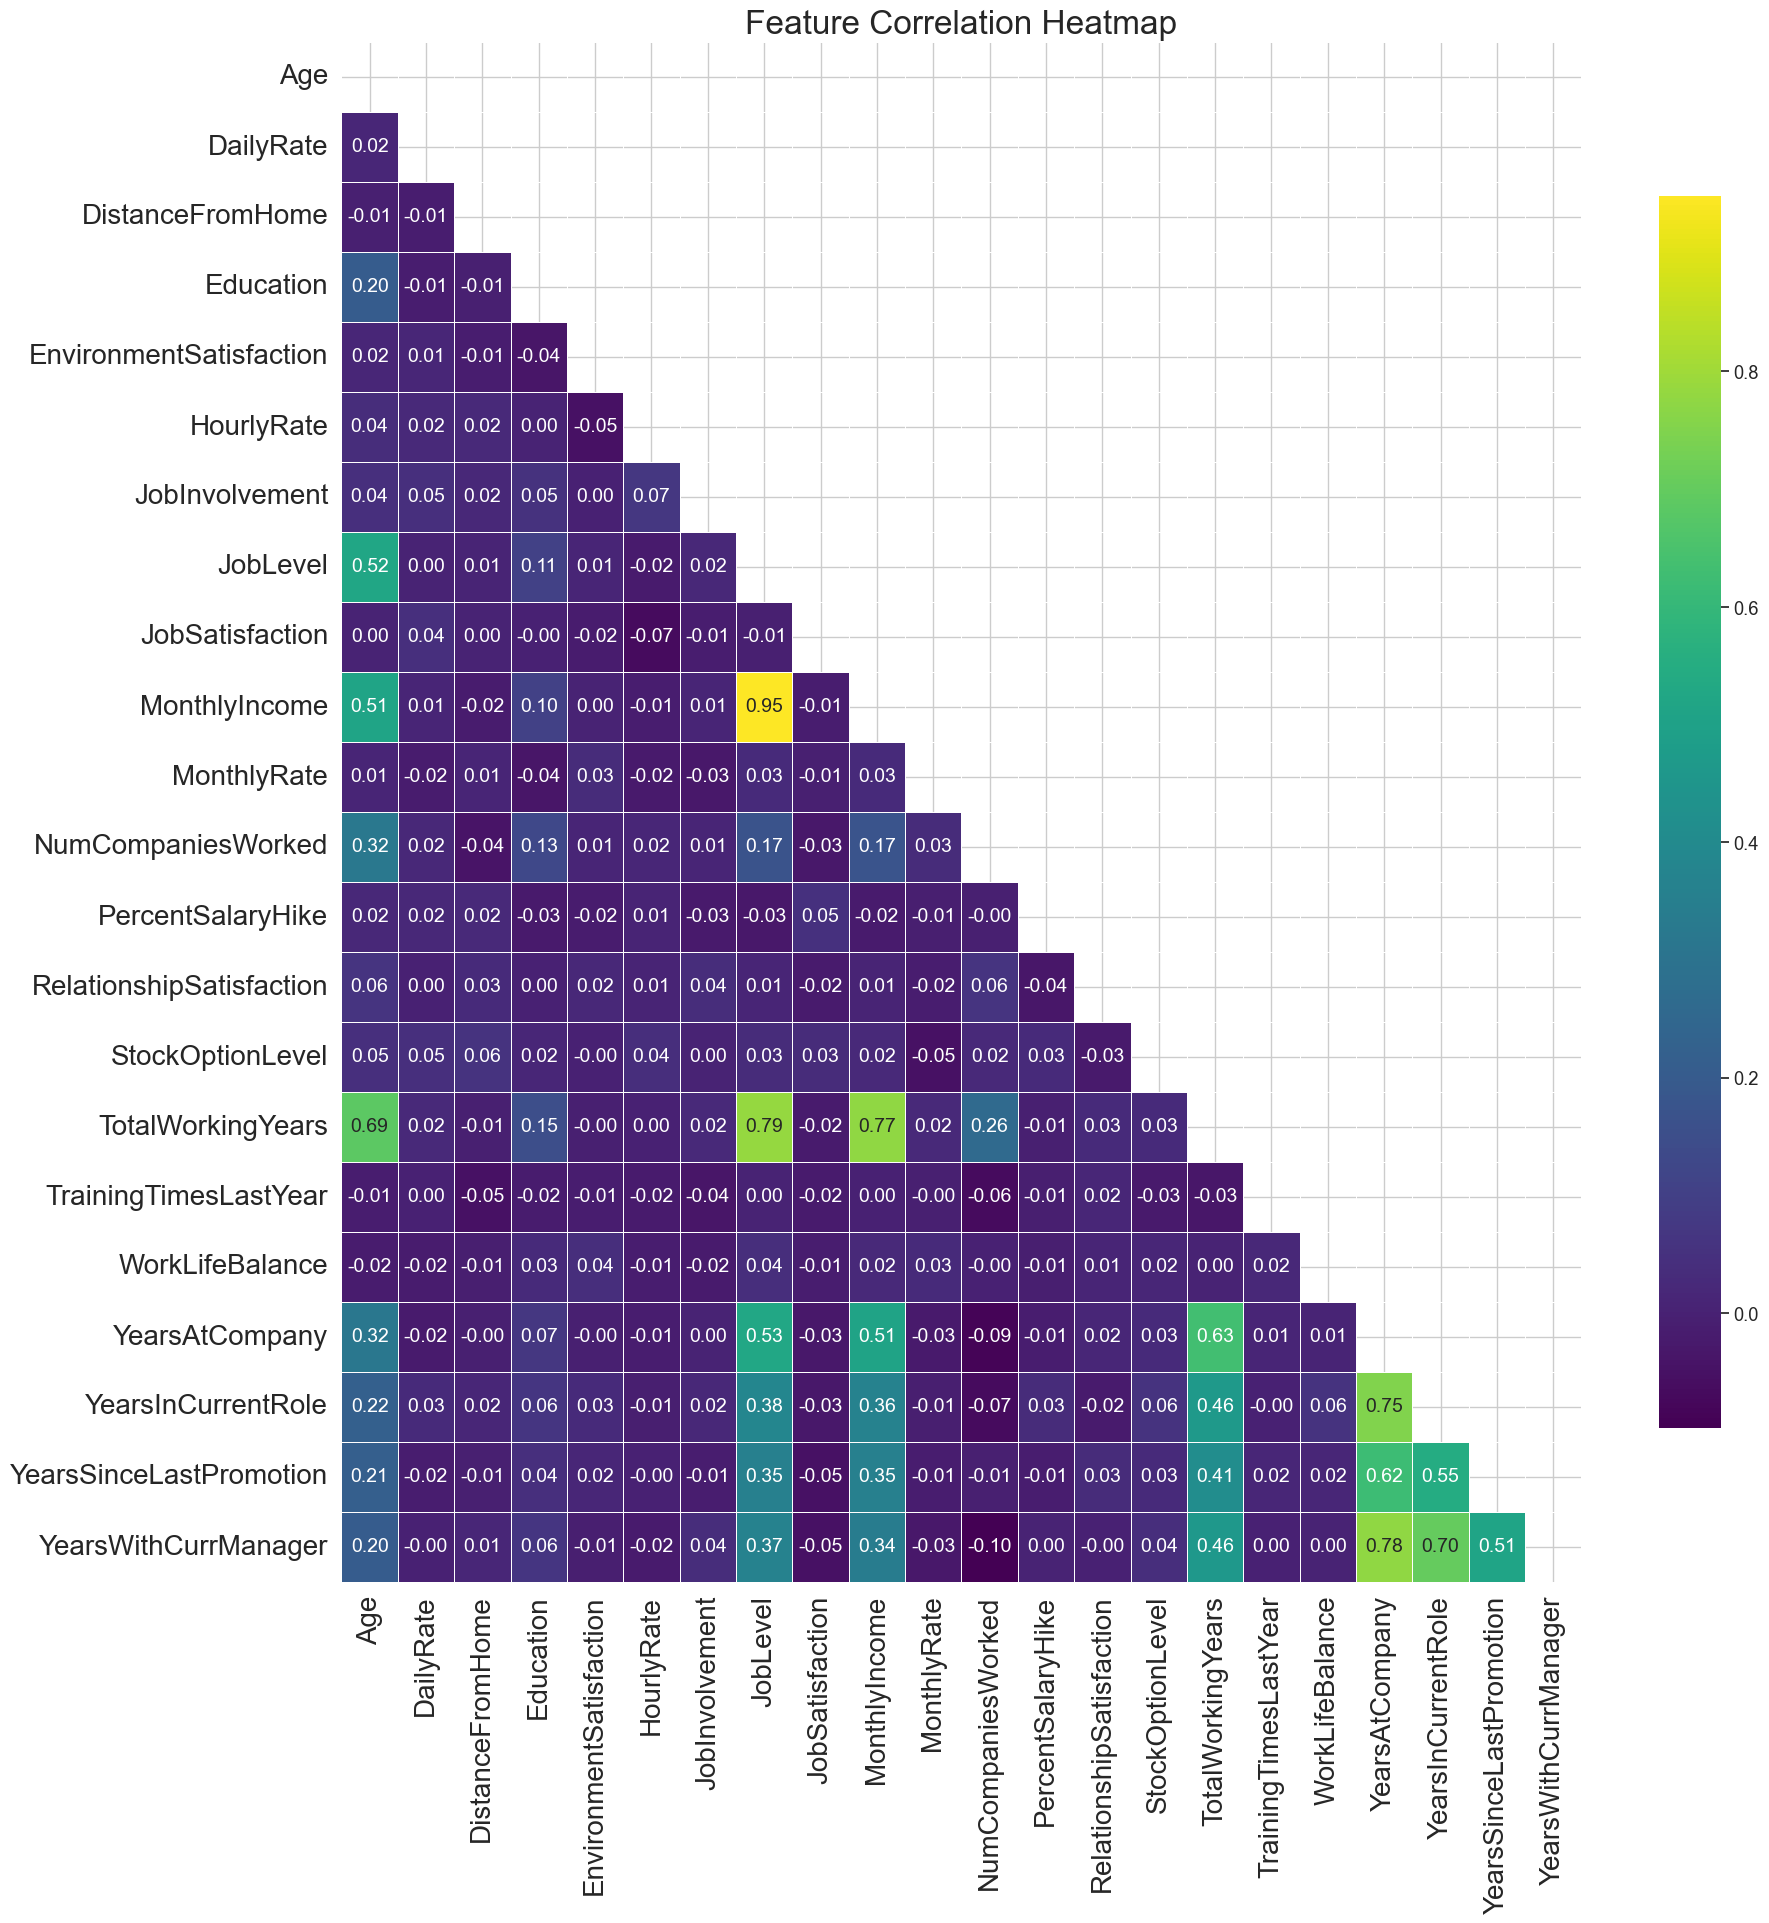

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
# 假设你的数据已经加载到 DataFrame 中，名为 df
# df = pd.read_csv('your_data.csv')

# 删除不相关的列
# columns_to_drop = [ 'EmployeeCount']
# df = df.drop(columns=columns_to_drop, errors='ignore')
plt.rcParams.update({'font.size': 14})
# 将布尔型列转换为数值型（0 和 1）
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)

# 筛选出数值型列
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
data_num = X[numeric_columns]

# 计算相关性矩阵
correlation_matrix = data_num.corr()

# 可选：将相关性矩阵的上三角部分设置为 NaN，避免重复显示
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.mask(mask)

# 绘制热力图
plt.figure(figsize=(20, 20))  # 设置热力图的大小
sns.heatmap(correlation_matrix_masked, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontsize=24)
plt.xticks(fontsize=20)  # 设置 x 轴标签（列名）字体大小
plt.yticks(fontsize=20)  # 设置 y 轴标签（行名）字体大小
plt.show()

In [ ]:
X = X.drop(['JobLevel'], axis=1) 

### 箱线图

异常值：
      Age Attrition     BusinessTravel  DailyRate              Department  \
13     34       Yes  Travel_Frequently        988         Human Resources   
79     42        No      Travel_Rarely        932  Research & Development   
81     56        No  Travel_Frequently        906                   Sales   
108    45        No         Non-Travel       1195  Research & Development   
128    44       Yes      Travel_Rarely       1376         Human Resources   
231    29        No      Travel_Rarely       1283  Research & Development   
235    36        No      Travel_Rarely        429  Research & Development   
324    36        No         Non-Travel        427  Research & Development   
346    42        No      Travel_Rarely       1396  Research & Development   
352    36        No      Travel_Rarely        559  Research & Development   
413    54        No      Travel_Rarely       1217  Research & Development   
424    52        No      Travel_Rarely        258  Research & Developme

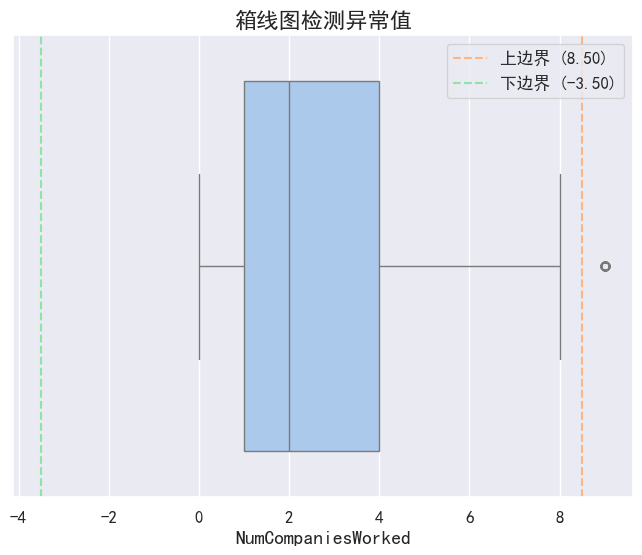

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette('pastel')[0:len(job_role_distribution)]
# 假设 df 是您的数据集，column_name 是目标列
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1.1)  # 解决Seaborn中文显示问题并调整字体大小
df = data
# 计算四分位数和 IQR
Q1 = df['NumCompaniesWorked'].quantile(0.25)  # 第一四分位数
Q3 = df['NumCompaniesWorked'].quantile(0.75)  # 第三四分位数
IQR = Q3 - Q1  # 四分位距

# 计算上下边界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 检测异常值
outliers = df[(df['NumCompaniesWorked'] < lower_bound) | (df['NumCompaniesWorked'] > upper_bound)]
print("异常值：")
print(outliers)

# 绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['NumCompaniesWorked'], color=color[0])

# 在超过 1.5 倍 IQR 的地方绘制一条线
plt.axvline(x=upper_bound, color=color[1], linestyle='--', label=f'上边界 ({upper_bound:.2f})')
plt.axvline(x=lower_bound, color=color[2], linestyle='--', label=f'下边界 ({lower_bound:.2f})')

# 设置标题和标签
plt.title('箱线图检测异常值', fontsize=16)
plt.xlabel('NumCompaniesWorked', fontsize=14)
plt.legend()
plt.show()

## 数据预处理

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   DistanceFromHome          1176 non-null   int64 
 5   Education                 1176 non-null   int64 
 6   EducationField            1176 non-null   object
 7   EnvironmentSatisfaction   1176 non-null   int64 
 8   Gender                    1176 non-null   object
 9   HourlyRate                1176 non-null   int64 
 10  JobInvolvement            1176 non-null   int64 
 11  JobRole                   1176 non-null   object
 12  JobSatisfaction           1176 non-null   int64 
 13  MaritalStatus             1176 non-null   object
 14  MonthlyIncome           

解决重复列问题

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

def process_data(X):
    # 分离连续特征和离散特征
    continuous_features = X.select_dtypes(include=['float64', 'int64']).columns  # 连续
    print(continuous_features)

    # 保存原始索引
    original_index = X.index

    # 连续特征标准化
    scaler = StandardScaler()
    X_continuous = scaler.fit_transform(X[continuous_features])
    X_continuous_df = pd.DataFrame(X_continuous, columns=continuous_features, index=original_index)

    hot = ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']
    lab = ['Gender', 'EnvironmentSatisfaction', 'JobSatisfaction', 'OverTime']

    # 无序离散特征独热编码
    onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')  # Handle potential new categories in test data
    X_hot = onehot_encoder.fit_transform(X[hot])
    X_hot_df = pd.DataFrame(X_hot.toarray(), columns=onehot_encoder.get_feature_names_out(hot), index=original_index)

    # 有序离散特征或二元分类特征标签编码
    # X_lab_df = X[lab].apply(lambda col: label_encoder.fit_transform(col)) # This is much better!
    X_lab_df = pd.DataFrame(index=original_index)
    for col in lab:
        if col in X.columns:  # Check if column exists
            le = LabelEncoder()
            X_lab_df[col] = le.fit_transform(X[col])

    # 删除原始数据中的标签编码列和独热编码列，避免列名重复
    X = X.drop(columns=lab, errors='ignore')  # Use errors='ignore' to handle cases where columns don't exist
    X = X.drop(columns=hot, errors='ignore')

    # 拼接处理后的特征
    X = pd.concat([X_continuous_df, X_hot_df, X_lab_df], axis=1)

    # 检查并删除重复列
    X = X.loc[:,~X.columns.duplicated()].copy() # .copy() is very important, avoid SettingWithCopyWarning

    return X

# 示例用法 (假设 X 是你的 DataFrame)
# 创建一个示例 DataFrame (为了演示,你需要有自己的数据)

# X = pd.DataFrame(data)

X = process_data(X.copy()) # always work on copies of your data
# print(X_processed)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [507]:
# 分离连续特征和离散特征
continuous_features = X.select_dtypes(include=['float64', 'int64']).columns  # 连续特征
print("连续特征:", continuous_features)

# 保存原始索引
original_index = X.index

# 连续特征标准化
scaler = StandardScaler()
X_continuous = scaler.fit_transform(X[continuous_features])
X_continuous_df = pd.DataFrame(X_continuous, columns=continuous_features, index=original_index)

# 定义需要独热编码和标签编码的特征
hot = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']  # 无序离散特征
lab = ['Gender', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction', 'OverTime']  # 有序离散特征或二元分类特征

# 无序离散特征独热编码
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # 设置 sparse_output=False 并删除第一列以避免多重共线性
X_hot = onehot_encoder.fit_transform(X[hot])
X_hot_df = pd.DataFrame(X_hot, columns=onehot_encoder.get_feature_names_out(hot), index=original_index)

# 有序离散特征或二元分类特征标签编码
X_lab_df = X[lab].apply(LabelEncoder().fit_transform)  # 对每一列分别进行标签编码

# 拼接处理后的特征
X = pd.concat([X_continuous_df, X_hot_df, X_lab_df], axis=1)

print("处理后的特征数据:")
print(X)

连续特征: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')


KeyError: "None of [Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',\n       'MaritalStatus'],\n      dtype='object')] are in the [columns]"

In [182]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1176 non-null   float64
 1   DailyRate                          1176 non-null   float64
 2   DistanceFromHome                   1176 non-null   float64
 3   Education                          1176 non-null   float64
 4   EnvironmentSatisfaction            1176 non-null   float64
 5   HourlyRate                         1176 non-null   float64
 6   JobInvolvement                     1176 non-null   float64
 7   JobSatisfaction                    1176 non-null   float64
 8   MonthlyIncome                      1176 non-null   float64
 9   MonthlyRate                        1176 non-null   float64
 10  NumCompaniesWorked                 1176 non-null   float64
 11  PercentSalaryHike                  1176 non-null   float

In [102]:
columns_to_extract = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'BusinessTravel_Travel_Frequently', 'Department_Research & Development', 'Department_Sales',
    'EducationField_Medical', 'Gender_Female', 'JobRole_Laboratory Technician', 'MaritalStatus_Married',
    'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'
]

# 提取指定列
X = X[columns_to_extract]

### 梯度特征选择

最优特征数量: 27
被选中的特征索引:  [ True False  True False  True False  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True  True False  True  True  True  True]


c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21449 (\N{CJK UNIFIED IDEOGRAPH-53C9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35777 (\N{CJK UNIFIED IDEOGRAPH-8BC1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  

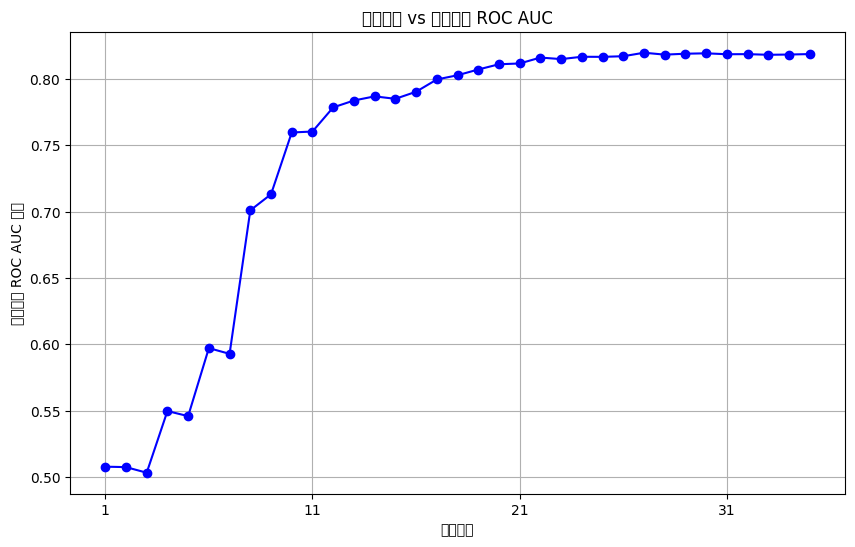

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold

# 生成示例数据集（假设有 100 个样本和 32 个特征）
# X, y = make_classification(n_samples=100, n_features=32, n_informative=15, n_redundant=5, random_state=42)

# 定义基础模型（以随机森林为例）
model = SVC(kernel='linear', probability=True, random_state=42)

# 定义交叉验证策略（5 折交叉验证）
cv = StratifiedKFold(n_splits=5)

# 定义 RFECV
rfecv = RFECV(
    estimator=model,  # 基础模型
    step=1,  # 每次迭代删除 1 个特征
    cv=cv,  # 交叉验证策略
    scoring='roc_auc',  # 使用 ROC AUC 作为评估标准
    min_features_to_select=1  # 至少选择 1 个特征
)

# 训练 RFECV 模型
rfecv.fit(X, y)

# 输出最优特征数量
print(f"最优特征数量: {rfecv.n_features_}")

# 输出被选中的特征
selected_features = rfecv.support_
print("被选中的特征索引: ", selected_features)

# 绘制特征数量与交叉验证分数的曲线图
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')
plt.title("特征数量 vs 交叉验证 ROC AUC")
plt.xlabel("特征数量")
plt.ylabel("交叉验证 ROC AUC 分数")
plt.grid(True)
plt.xticks(range(1, len(rfecv.cv_results_['mean_test_score']) + 1,10))
plt.show()

In [10]:
selected_features = rfecv.support_
print("被选中的特征索引: ", selected_features)

被选中的特征索引:  [ True False  True False  True False  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True  True False  True  True  True  True]


In [11]:
X= X.loc[:, selected_features]
print("筛选后的特征数据集: ")


筛选后的特征数据集: 


In [321]:
# 检查列名是否重复
if len(X_train.columns) != len(set(X_train.columns)):
    print("存在重复列名:")
    print(X_train.columns[X_train.columns.duplicated()])
else:
    print("列名无重复。")

列名无重复。


In [322]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1176 non-null   float64
 1   DistanceFromHome                   1176 non-null   float64
 2   EnvironmentSatisfaction            1176 non-null   float64
 3   JobInvolvement                     1176 non-null   float64
 4   JobLevel                           1176 non-null   float64
 5   JobSatisfaction                    1176 non-null   float64
 6   MonthlyIncome                      1176 non-null   float64
 7   NumCompaniesWorked                 1176 non-null   float64
 8   RelationshipSatisfaction           1176 non-null   float64
 9   StockOptionLevel                   1176 non-null   float64
 10  TotalWorkingYears                  1176 non-null   float64
 11  TrainingTimesLastYear              1176 non-null   float

In [12]:

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 过采样

c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36807 (\N{CJK UNIFIED IDEOGRAPH-8FC7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37319 (\N{CJK UNIFIED IDEOGRAPH-91C7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  

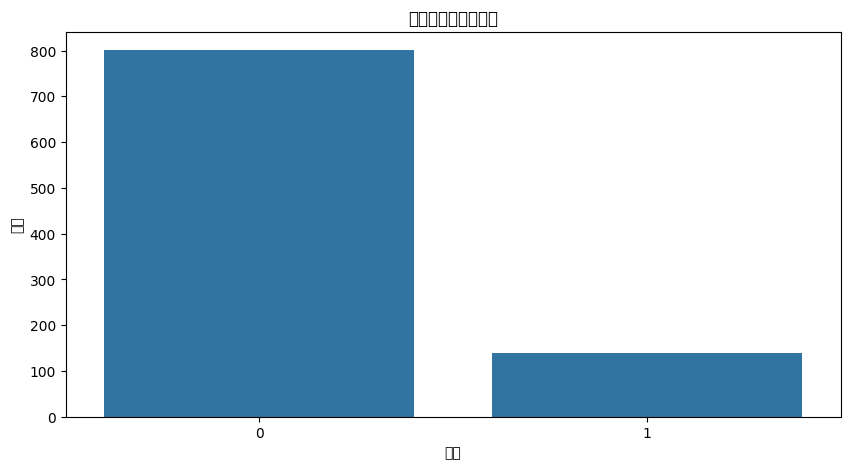

In [13]:
from collections import Counter
# 统计过采样前的类别数量
y_before = Counter(y_train)

# 可视化过采样前的类别分布
plt.figure(figsize=(10, 5))
sns.barplot(x=list(y_before.keys()), y=list(y_before.values()))
plt.title("过采样前的类别分布")
plt.xlabel("类别")
plt.ylabel("数量")
plt.show()

In [14]:
# 对训练集进行过采样

from imblearn.over_sampling import SMOTE

# 使用 SMOTE 进行过采样,并赋值给自己
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\UserFiles\Anaconda3\envs\hh\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\UserFiles\Anaconda3\envs\hh\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\UserFiles\Anaconda3\envs\hh\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [303]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

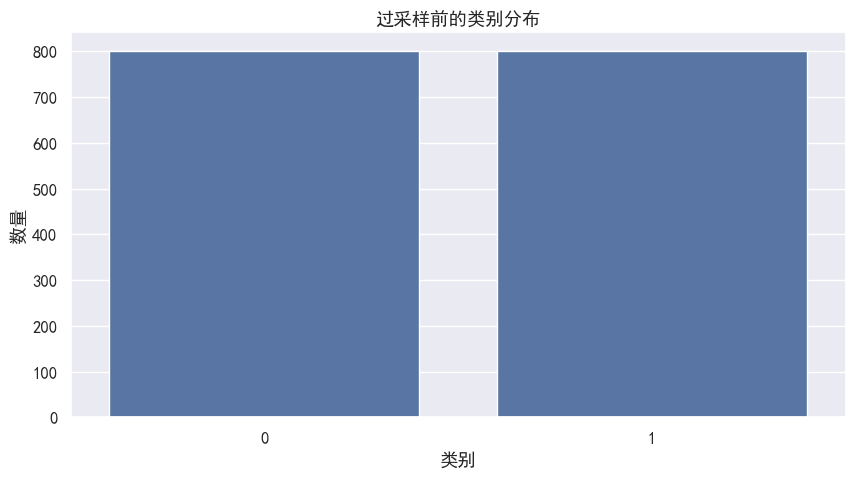

In [358]:
from collections import Counter
# 统计过采样前的类别数量
y_before = Counter(y_train)

# 可视化过采样前的类别分布
plt.figure(figsize=(10, 5))
sns.barplot(x=list(y_before.keys()), y=list(y_before.values()))
plt.title("过采样前的类别分布")
plt.xlabel("类别")
plt.ylabel("数量")
plt.show()

## 模型训练

### 知乎

In [331]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

model={}
model['rfc']=RandomForestClassifier()
model['gdbt']=GradientBoostingClassifier()
model['cart']=DecisionTreeClassifier()
model['knn']=KNeighborsClassifier()
model['svm']=svm.SVC()
model['lr']=LogisticRegression()
for i in model:
    model[i].fit(X_train,y_train)
    score=cross_val_score(model[i],X_train,y_train,cv=5,scoring='f1')
    print('%s的auc为：%.3f'%(i,score.mean()))
    # 在测试集上进行预测
    y_pred = model[i].predict(X_test)
    # 打印分类报告
    print("分类报告:")
    print(classification_report(y_test, y_pred))
    # 计算 F1 值
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 值: {f1}")
    # y_pred_proba = model[i].predict_proba(X_test)[:, 1]
    # print(f"auc:{roc_auc_score(y_test, y_pred_proba)}")
    cm = confusion_matrix(y_test, y_pred)
    print("\n最佳模型混淆矩阵:\n", cm)

    

rfc的auc为：0.923
分类报告:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       187
           1       0.77      0.20      0.32        49

    accuracy                           0.82       236
   macro avg       0.80      0.59      0.61       236
weighted avg       0.81      0.82      0.78       236

F1 值: 0.7781794663217272

最佳模型混淆矩阵:
 [[184   3]
 [ 39  10]]
gdbt的auc为：0.858
分类报告:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       187
           1       0.78      0.43      0.55        49

    accuracy                           0.86       236
   macro avg       0.82      0.70      0.73       236
weighted avg       0.85      0.86      0.84       236

F1 值: 0.8390821686985827

最佳模型混淆矩阵:
 [[181   6]
 [ 28  21]]
cart的auc为：0.837
分类报告:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       187
           1       0.40      0.35      0.37        4

### 逻辑回归

模型准确率: 0.7372881355932204
分类报告:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       187
           1       0.42      0.69      0.52        49

    accuracy                           0.74       236
   macro avg       0.66      0.72      0.67       236
weighted avg       0.80      0.74      0.76       236

F1 值: 0.7573312899807102
auc:0.8057404780093855

最佳模型混淆矩阵:
 [[140  47]
 [ 15  34]]


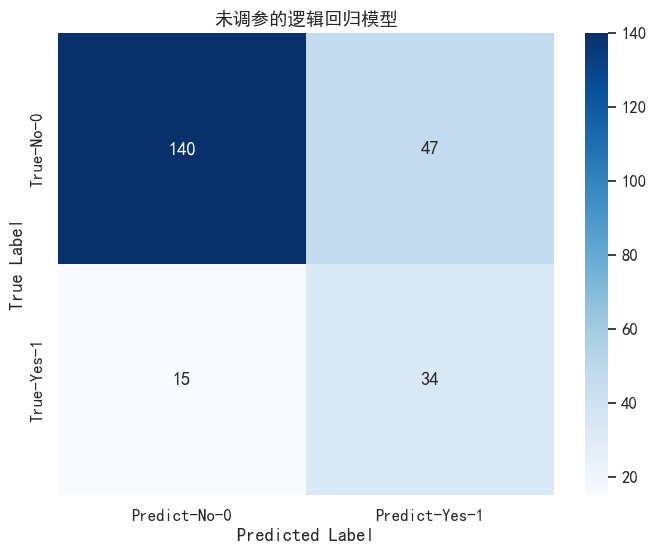

In [495]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, f1_score,roc_curve,auc
# 创建逻辑回归模型
logreg = LogisticRegression(random_state=43)
# logreg = LogisticRegression(penalty='l1',C=124.15503013717493,solver='liblinear',class_weight='balanced')

# 训练模型
logreg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logreg.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy}")

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred))

# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 值: {f1}")

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
print(f"auc:{roc_auc_score(y_test, y_pred_proba)}")
# 使用最佳模型在测试集上进行预测
y_pred_best = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
print("\n最佳模型混淆矩阵:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predict-No-0', 'Predict-Yes-1'],
            yticklabels=['True-No-0', 'True-Yes-1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('未调参的逻辑回归模型')
plt.show()

论文参数

模型准确率: 0.7457627118644068
分类报告:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       187
           1       0.43      0.69      0.53        49

    accuracy                           0.75       236
   macro avg       0.67      0.73      0.68       236
weighted avg       0.81      0.75      0.76       236

F1 值: 0.7644702158060701
auc:0.825166430208447

最佳模型混淆矩阵:
 [[142  45]
 [ 15  34]]


c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35843 (\N{CJK UNIFIED IDEOGRAPH-8C03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36923 (\N{CJK UNIFIED IDEOGRAPH-903B}) missing from current font.
  

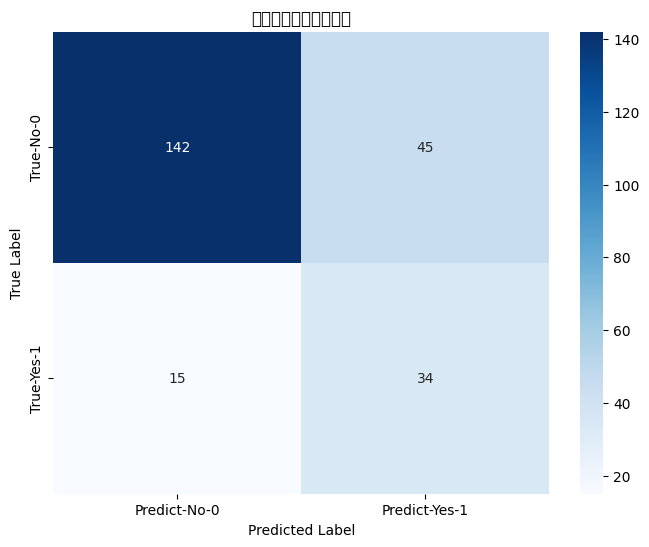

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, f1_score,roc_curve,auc
# 创建逻辑回归模型
logreg = LogisticRegression(C=0.05696421076895237, solver='lbfgs',random_state=16)
# logreg = LogisticRegression(penalty='l1',C=124.15503013717493,solver='liblinear',class_weight='balanced')

# 训练模型
logreg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logreg.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy}")

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred))

# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 值: {f1}")

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
print(f"auc:{roc_auc_score(y_test, y_pred_proba)}")
# 使用最佳模型在测试集上进行预测
y_pred_best = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
print("\n最佳模型混淆矩阵:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predict-No-0', 'Predict-Yes-1'],
            yticklabels=['True-No-0', 'True-Yes-1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('调参后的逻辑回归模型')
plt.show()

参数网格

Fitting 10 folds for each of 30 candidates, totalling 300 fits


c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver,

最佳模型参数: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
最佳模型在测试集上的准确率: 0.75
最佳模型分类报告:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       187
           1       0.44      0.69      0.54        49

    accuracy                           0.75       236
   macro avg       0.67      0.73      0.68       236
weighted avg       0.81      0.75      0.77       236

最佳模型 F1 值: 0.7680360607098026
最佳模型 AUC: 0.8245116228309507

最佳模型混淆矩阵:
 [[143  44]
 [ 15  34]]


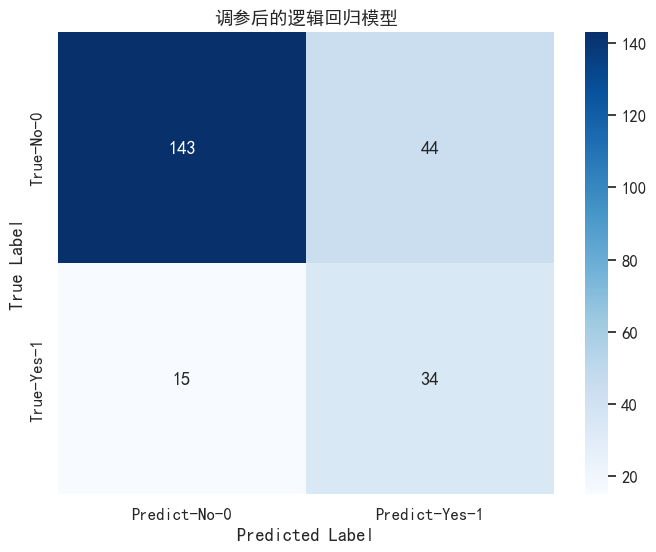

In [493]:
# 定义参数网格
param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=43),
                           param_grid=param_grid,
                           cv=10,
                           scoring='f1_weighted',
                           verbose=2,
                           n_jobs=-1)

# 在训练数据上运行 GridSearchCV
grid_search.fit(X_train, y_train)

# 获取最佳模型和最佳参数
best_logreg = grid_search.best_estimator_
best_params = grid_search.best_params_

print("最佳模型参数:", best_params)

# 使用最佳模型在测试集上进行预测
y_pred_best = best_logreg.predict(X_test)

# 评估最佳模型
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"最佳模型在测试集上的准确率: {accuracy_best}")

print("最佳模型分类报告:")
print(classification_report(y_test, y_pred_best))

f1_best = f1_score(y_test, y_pred_best, average='weighted')
print(f"最佳模型 F1 值: {f1_best}")

y_pred_proba_best = best_logreg.predict_proba(X_test)[:, 1]
print(f"最佳模型 AUC: {roc_auc_score(y_test, y_pred_proba_best)}")

cm = confusion_matrix(y_test, y_pred_best)
print("\n最佳模型混淆矩阵:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predict-No-0', 'Predict-Yes-1'],
            yticklabels=['True-No-0', 'True-Yes-1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('调参后的逻辑回归模型')
plt.show()

In [474]:
# {'C': 0.001, 'class_weight': None, 'penalty': 'none', 'solver': 'saga'}
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, f1_score,roc_curve,auc
# 创建逻辑回归模型
logreg = LogisticRegression(C=10, penalty= 'l1', solver= 'liblinear')
# logreg = LogisticRegression(penalty='l1',C=124.15503013717493,solver='liblinear',class_weight='balanced')

# 训练模型
logreg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logreg.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy}")

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred))

# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 值: {f1}")

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
print(f"auc:{roc_auc_score(y_test, y_pred_proba)}")

模型准确率: 0.7245762711864406
分类报告:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       187
           1       0.40      0.67      0.50        49

    accuracy                           0.72       236
   macro avg       0.65      0.71      0.66       236
weighted avg       0.79      0.72      0.75       236

F1 值: 0.7459400915696643
auc:0.8022481719960711


In [475]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, f1_score,roc_curve,auc
# 创建逻辑回归模型
logreg = LogisticRegression(C=0.1, penalty='l2', solver= 'saga')
# logreg = LogisticRegression(penalty='l1',C=124.15503013717493,solver='liblinear',class_weight='balanced')

# 训练模型
logreg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logreg.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy}")

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred))

# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 值: {f1}")

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
print(f"auc:{roc_auc_score(y_test, y_pred_proba)}")

模型准确率: 0.75
分类报告:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       187
           1       0.44      0.69      0.54        49

    accuracy                           0.75       236
   macro avg       0.67      0.73      0.68       236
weighted avg       0.81      0.75      0.77       236

F1 值: 0.7680360607098026
auc:0.8245116228309507


In [365]:
param_grid = [
    # L1 正则化只能用 'liblinear' 或 'saga'
    {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'class_weight': ['balanced', None]},
    
    # L2 正则化适用于多种 solver
    {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'], 'class_weight': ['balanced', None]},
    
    # ElasticNet 只能用 'saga' 并且需要 l1_ratio
    {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9], 'class_weight': ['balanced', None]},
]


In [366]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)
print("最佳参数:", grid_search.best_params_)


最佳参数: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}


### 随机森林

循环10次

In [283]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification  # 用于生成示例数据
import numpy as np
from imblearn.over_sampling import ADASYN

# 生成示例数据 (用于演示，实际应用中请替换为您的真实数据)

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(class_weight='balanced_subsample') # 固定随机种子以保证实验可重复性

# 设置循环次数
n_splits = 10

# 初始化存储各项评估指标的列表
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

# 循环进行数据划分和评估
for i in range(n_splits):
    # 随机划分训练集和测试集，每次循环使用不同的随机种子
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i) # random_state=i 确保每次划分不同
    adasyn = ADASYN(random_state=42)
    X_train, y_train = adasyn.fit_resample(X_train, y_train)
    # 训练随机森林模型
    rf_classifier.fit(X_train, y_train)

    # 在测试集上进行预测 (类别和概率)
    y_pred = rf_classifier.predict(X_test)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1] # 获取正类概率用于 AUC

    # 计算各项评估指标
    LG_accuracy = accuracy_score(y_test, y_pred)
    LG_precision = precision_score(y_test, y_pred)
    LG_recall = recall_score(y_test, y_pred, average='weighted')
    LG_f1 = f1_score(y_test, y_pred, average='weighted')
    LG_auc = roc_auc_score(y_test, y_pred_proba)

    # 将本次循环的评估指标添加到列表中
    accuracy_scores.append(LG_accuracy)
    precision_scores.append(LG_precision)
    recall_scores.append(LG_recall)
    f1_scores.append(LG_f1)
    auc_scores.append(LG_auc)

# 计算各项评估指标的平均值
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(auc_scores)

# 输出平均评估指标
print("Average Evaluation Metrics over {} random splits:".format(n_splits))
print(f"Average Accuracy:  {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall:    {avg_recall:.4f}")
print(f"Average F1-score:  {avg_f1:.4f}")
print(f"Average AUC:       {avg_auc:.4f}")

Average Evaluation Metrics over 10 random splits:
Average Accuracy:  0.8558
Average Precision: 0.6260
Average Recall:    0.8558
Average F1-score:  0.8260
Average AUC:       0.7612


未调参

Random Forest:
AUC:  0.7731092436974789
准确率: 0.8305084745762712

最佳随机森林模型混淆矩阵:
 [[186   1]
 [ 39  10]]
最佳随机森林模型 F1 值: 0.7846525149470682


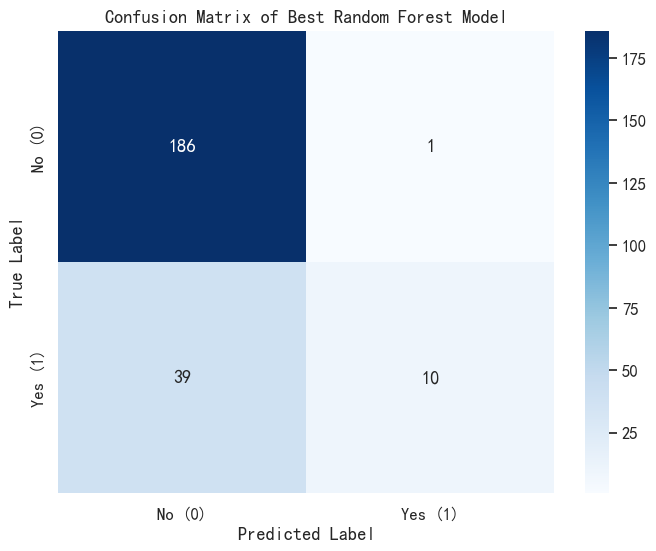

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       187
           1       0.91      0.20      0.33        49

    accuracy                           0.83       236
   macro avg       0.87      0.60      0.62       236
weighted avg       0.84      0.83      0.78       236



In [541]:
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类模型
# 随机森林
print("Random Forest:")
rf = RandomForestClassifier(random_state=43)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_rf))

y_pred_rf_best = rf.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"准确率: {accuracy_rf_best}")

# 计算混淆矩阵 - 针对最佳随机森林模型
cm_rf = confusion_matrix(y_test, y_pred_rf_best)
print("\n最佳随机森林模型混淆矩阵:\n", cm_rf)

f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')
print(f"最佳随机森林模型 F1 值: {f1_rf_best}")

# 可视化混淆矩阵 - 针对最佳随机森林模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Best Random Forest Model')
plt.show()

print(classification_report(y_test, y_pred_rf_best))

论文参数

Random Forest:
AUC:  0.7775837607770381
准确率: 0.8347457627118644

最佳随机森林模型混淆矩阵:
 [[183   4]
 [ 35  14]]
最佳随机森林模型 F1 值: 0.8028398497156403


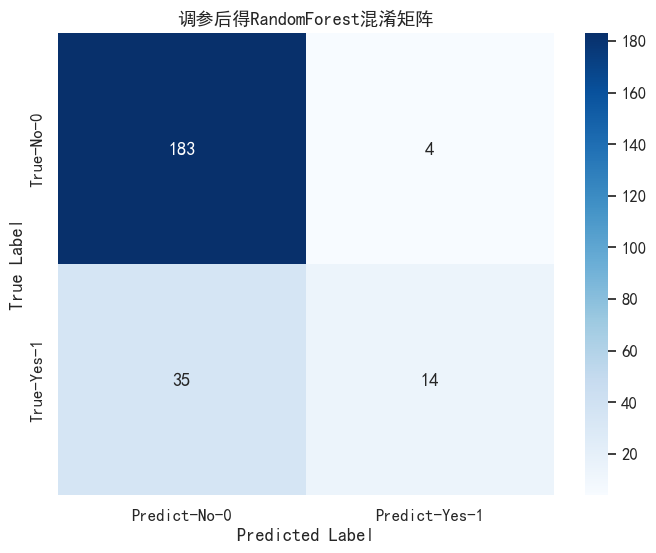

In [557]:
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类模型
# 随机森林
print("Random Forest:")
rf = RandomForestClassifier(
        max_depth=15, min_samples_leaf=5,
        min_samples_split=14, n_estimators=200
    )
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_rf))

y_pred_rf_best = rf.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"准确率: {accuracy_rf_best}")

# 计算混淆矩阵 - 针对最佳随机森林模型
cm_rf = confusion_matrix(y_test, y_pred_rf_best)
print("\n最佳随机森林模型混淆矩阵:\n", cm_rf)

f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')
print(f"最佳随机森林模型 F1 值: {f1_rf_best}")

# 可视化混淆矩阵 - 针对最佳随机森林模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Predict-No-0', 'Predict-Yes-1'],
            yticklabels=['True-No-0', 'True-Yes-1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('调参后得RandomForest混淆矩阵')
plt.show()

#### stacking参数

Random Forest:
AUC:  0.7770380879624577
准确率: 0.8305084745762712

最佳随机森林模型混淆矩阵:
 [[181   6]
 [ 34  15]]
最佳随机森林模型 F1 值: 0.8025128594316553


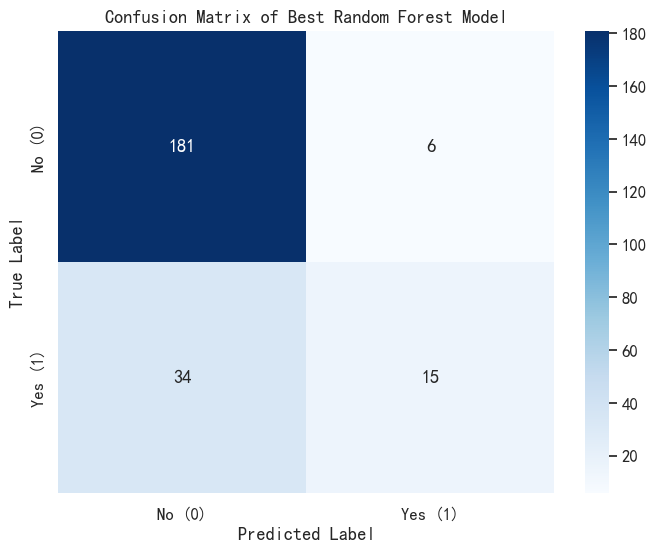

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       187
           1       0.71      0.31      0.43        49

    accuracy                           0.83       236
   macro avg       0.78      0.64      0.66       236
weighted avg       0.82      0.83      0.80       236



In [542]:
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类模型
# 随机森林
print("Random Forest:")
rf = RandomForestClassifier(n_estimators=90,max_depth=8,min_samples_leaf=6,random_state=45)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_rf))

y_pred_rf_best = rf.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"准确率: {accuracy_rf_best}")

# 计算混淆矩阵 - 针对最佳随机森林模型
cm_rf = confusion_matrix(y_test, y_pred_rf_best)
print("\n最佳随机森林模型混淆矩阵:\n", cm_rf)

f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')
print(f"最佳随机森林模型 F1 值: {f1_rf_best}")

# 可视化混淆矩阵 - 针对最佳随机森林模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Best Random Forest Model')
plt.show()


# 输出分类报告
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best))

网格搜索

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
最佳随机森林模型参数: {'class_weight': 'balanced_subsample', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
最佳随机森林模型在测试集上的准确率: 0.8668555240793201
最佳随机森林模型分类报告:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       295
           1       0.79      0.26      0.39        58

    accuracy                           0.87       353
   macro avg       0.83      0.62      0.66       353
weighted avg       0.86      0.87      0.84       353

最佳随机森林模型 F1 值: 0.8372648082696408
最佳随机森林模型 AUC: 0.76291642314436

最佳随机森林模型混淆矩阵:
 [[291   4]
 [ 43  15]]


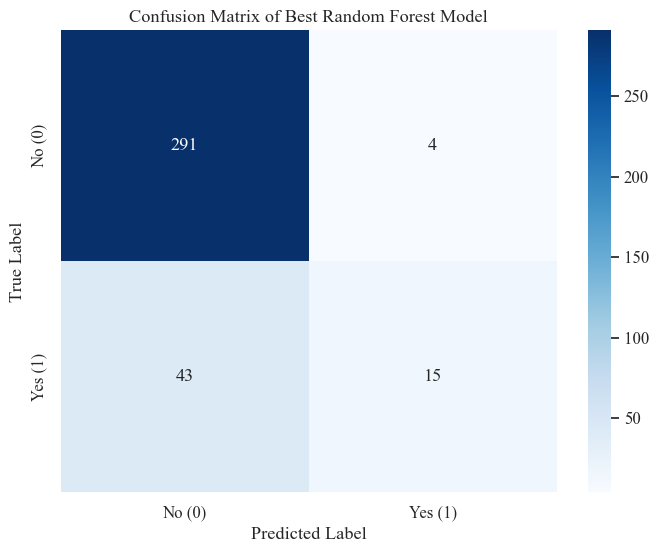

In [ ]:
# 定义参数网格 - 您可以根据需要调整参数和取值范围
param_grid_rf = {
    'n_estimators': [90, 200, 300], # 尝试不同的树的数量
    'max_depth': [5, 10, 8],   # 尝试不同的最大深度
    'min_samples_split': [2, 5, 10],  # 尝试不同的节点分裂所需的最小样本数
    'min_samples_leaf': [1, 4, 6],    # 尝试不同的叶节点所需的最小样本数
    'class_weight': ['balanced', 'balanced_subsample', None] # 处理类别不平衡
}

# 创建 GridSearchCV 对象 - 针对 RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), # 使用 RandomForestClassifier
                           param_grid=param_grid_rf,
                           cv=5,          # 使用 5 折交叉验证
                           scoring='f1_weighted', # 使用 weighted F1-score 作为评估指标
                           verbose=2,       # 可选: 显示搜索过程的详细信息
                           n_jobs=-1)      # 可选: 使用所有 CPU 核心并行搜索

# 在训练数据上运行 GridSearchCV - 训练 Random Forest 模型并进行调参
grid_search_rf.fit(X_train, y_train)

# 获取最佳模型和最佳参数 - 来自 Random Forest 的 GridSearchCV 结果
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

print("最佳随机森林模型参数:", best_params_rf)

# 使用最佳模型在测试集上进行预测
y_pred_rf_best = best_rf.predict(X_test)

# 评估最佳随机森林模型
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"最佳随机森林模型在测试集上的准确率: {accuracy_rf_best}")

print("最佳随机森林模型分类报告:")
print(classification_report(y_test, y_pred_rf_best))

f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')
print(f"最佳随机森林模型 F1 值: {f1_rf_best}")

y_pred_proba_rf_best = best_rf.predict_proba(X_test)[:, 1]
print(f"最佳随机森林模型 AUC: {roc_auc_score(y_test, y_pred_proba_rf_best)}")

# 计算混淆矩阵 - 针对最佳随机森林模型
cm_rf = confusion_matrix(y_test, y_pred_rf_best)
print("\n最佳随机森林模型混淆矩阵:\n", cm_rf)

# 可视化混淆矩阵 - 针对最佳随机森林模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Best Random Forest Model')
plt.show()

贝叶斯优化

Random Forest:
AUC:  0.7588126159554731
准确率: 0.8305084745762712

最佳随机森林模型混淆矩阵:
 [[180   7]
 [ 33  16]]
最佳随机森林模型 F1 值: 0.8054143126177025


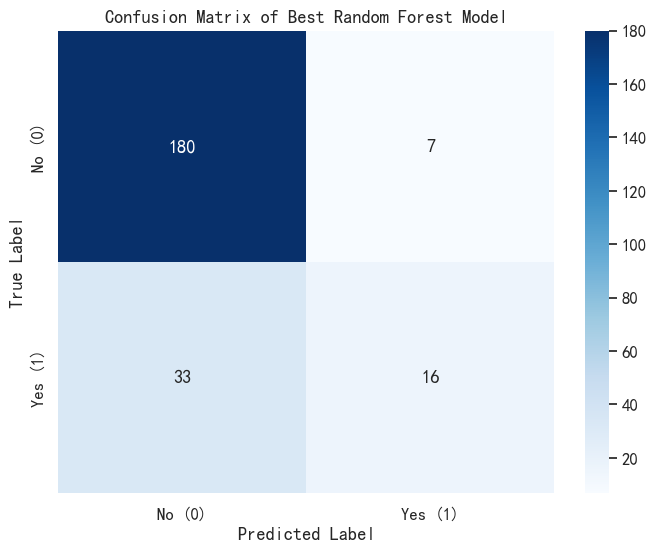

In [540]:
# {'n_estimators': 237, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3, 'class_weight': None}.
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类模型
# 随机森林
print("Random Forest:")
rf = RandomForestClassifier(
        max_depth=5, min_samples_leaf=3,
        min_samples_split=2, n_estimators=237
    )
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_rf))

y_pred_rf_best = rf.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"准确率: {accuracy_rf_best}")

# 计算混淆矩阵 - 针对最佳随机森林模型
cm_rf = confusion_matrix(y_test, y_pred_rf_best)
print("\n最佳随机森林模型混淆矩阵:\n", cm_rf)

f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')
print(f"最佳随机森林模型 F1 值: {f1_rf_best}")

# 可视化混淆矩阵 - 针对最佳随机森林模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Best Random Forest Model')
plt.show()


### SVM

测试集 AUC:  0.7991924042344211
F1 值: 0.8191890050887527
最佳 SVM 模型在测试集上的准确率: 0.8220338983050848
最佳 SVM 模型分类报告:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       187
           1       0.58      0.53      0.55        49

    accuracy                           0.82       236
   macro avg       0.73      0.71      0.72       236
weighted avg       0.82      0.82      0.82       236

最佳 SVM 模型 F1 值: 0.8191890050887527
最佳 SVM 模型 AUC: 0.7991924042344211

最佳 SVM 模型混淆矩阵:
 [[168  19]
 [ 23  26]]


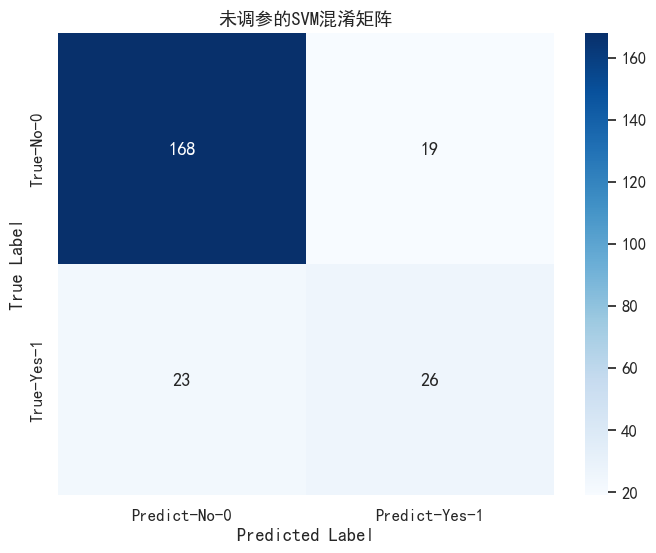

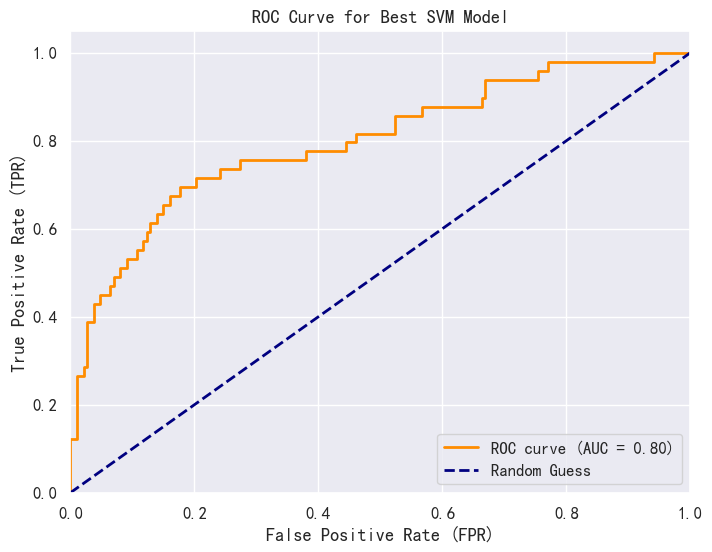

In [555]:
from sklearn.svm import SVC
# 定义 SVM 模型（使用默认参数）,C=1, gamma=0.01
# 'C': 70.20314474657421, 'kernel': 'rbf', 'gamma': 0.06730170359351065, 'class_weight': None
svm = SVC(probability=True, random_state=42)  # 启用概率估计

# 训练模型
svm.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_proba = svm.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 输出测试集 AUC
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

y_pred = svm.predict(X_test)

# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 值: {f1}")


# 使用最佳模型在测试集上进行预测
y_pred_svm_best = svm.predict(X_test)

# 评估最佳 SVM 模型
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print(f"最佳 SVM 模型在测试集上的准确率: {accuracy_svm_best}")

print("最佳 SVM 模型分类报告:")
print(classification_report(y_test, y_pred_svm_best))

f1_svm_best = f1_score(y_test, y_pred_svm_best, average='weighted')
print(f"最佳 SVM 模型 F1 值: {f1_svm_best}")

y_pred_proba_svm_best = svm.predict_proba(X_test)[:, 1]
print(f"最佳 SVM 模型 AUC: {roc_auc_score(y_test, y_pred_proba_svm_best)}")

# 计算混淆矩阵 - 针对最佳 SVM 模型
cm_svm = confusion_matrix(y_test, y_pred_svm_best)
print("\n最佳 SVM 模型混淆矩阵:\n", cm_svm)

# 可视化混淆矩阵 - 针对最佳 SVM 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predict-No-0', 'Predict-Yes-1'],
            yticklabels=['True-No-0', 'True-Yes-1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('未调参的SVM混淆矩阵')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对最佳 SVM 模型)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm_best)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.title('ROC Curve for Best SVM Model')
plt.legend(loc="lower right")
plt.show()

论文参数

测试集 AUC:  0.8119611480956019
F1 值: 0.8174175216824443
最佳 SVM 模型在测试集上的准确率: 0.8135593220338984
最佳 SVM 模型分类报告:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       187
           1       0.55      0.61      0.58        49

    accuracy                           0.81       236
   macro avg       0.72      0.74      0.73       236
weighted avg       0.82      0.81      0.82       236

最佳 SVM 模型 F1 值: 0.8174175216824443
最佳 SVM 模型 AUC: 0.8119611480956019

最佳 SVM 模型混淆矩阵:
 [[162  25]
 [ 19  30]]


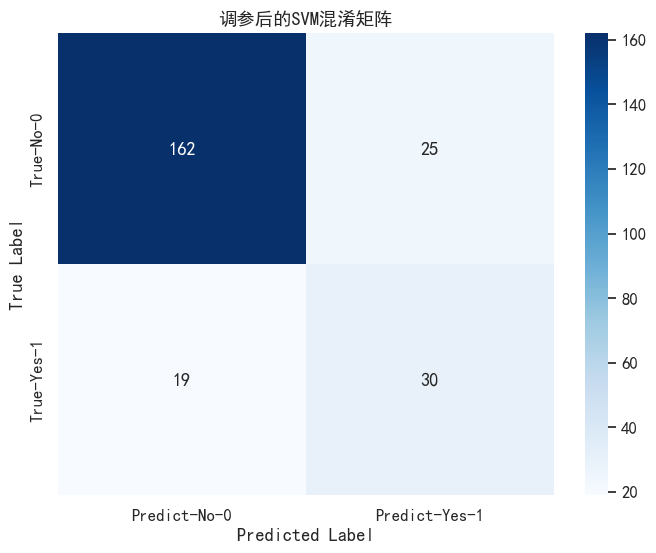

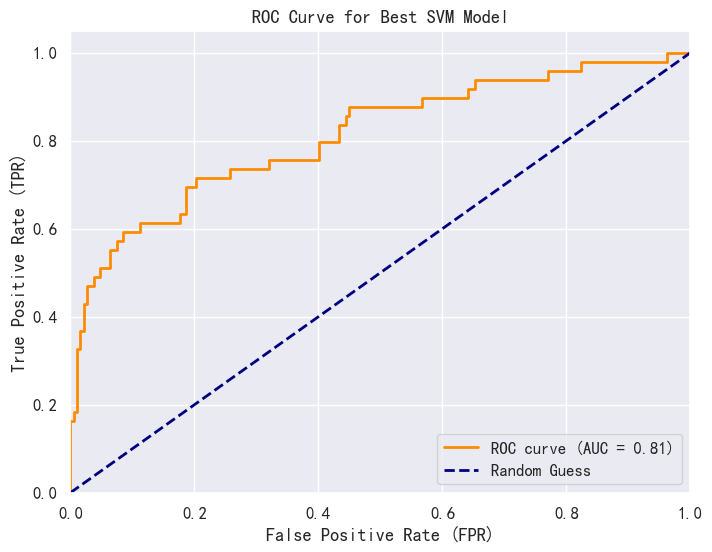

In [556]:
# C=1, gamma=0.01
from sklearn.svm import SVC
# 定义 SVM 模型（使用默认参数）
svm = SVC(C=10, gamma=0.01,random_state=45,probability=True)  # 启用概率估计
# 'C': 70.20314474657421, 'kernel': 'rbf', 'gamma': 0.06730170359351065, 
# 训练模型
svm.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_proba = svm.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 输出测试集 AUC
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

y_pred = svm.predict(X_test)

# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 值: {f1}")


# 使用最佳模型在测试集上进行预测
y_pred_svm_best = svm.predict(X_test)

# 评估最佳 SVM 模型
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print(f"最佳 SVM 模型在测试集上的准确率: {accuracy_svm_best}")

print("最佳 SVM 模型分类报告:")
print(classification_report(y_test, y_pred_svm_best))

f1_svm_best = f1_score(y_test, y_pred_svm_best, average='weighted')
print(f"最佳 SVM 模型 F1 值: {f1_svm_best}")

y_pred_proba_svm_best = svm.predict_proba(X_test)[:, 1]
print(f"最佳 SVM 模型 AUC: {roc_auc_score(y_test, y_pred_proba_svm_best)}")

# 计算混淆矩阵 - 针对最佳 SVM 模型
cm_svm = confusion_matrix(y_test, y_pred_svm_best)
print("\n最佳 SVM 模型混淆矩阵:\n", cm_svm)

# 可视化混淆矩阵 - 针对最佳 SVM 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predict-No-0', 'Predict-Yes-1'],
            yticklabels=['True-No-0', 'True-Yes-1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('调参后的SVM混淆矩阵')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对最佳 SVM 模型)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm_best)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Best SVM Model')
plt.legend(loc="lower right")
plt.show()

测试集 AUC:  0.8328604168940303
F1 值: 0.7921095470650197
最佳 SVM 模型在测试集上的准确率: 0.7796610169491526
最佳 SVM 模型分类报告:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       187
           1       0.48      0.67      0.56        49

    accuracy                           0.78       236
   macro avg       0.69      0.74      0.71       236
weighted avg       0.82      0.78      0.79       236

最佳 SVM 模型 F1 值: 0.7921095470650197
最佳 SVM 模型 AUC: 0.8328604168940303

最佳 SVM 模型混淆矩阵:
 [[151  36]
 [ 16  33]]


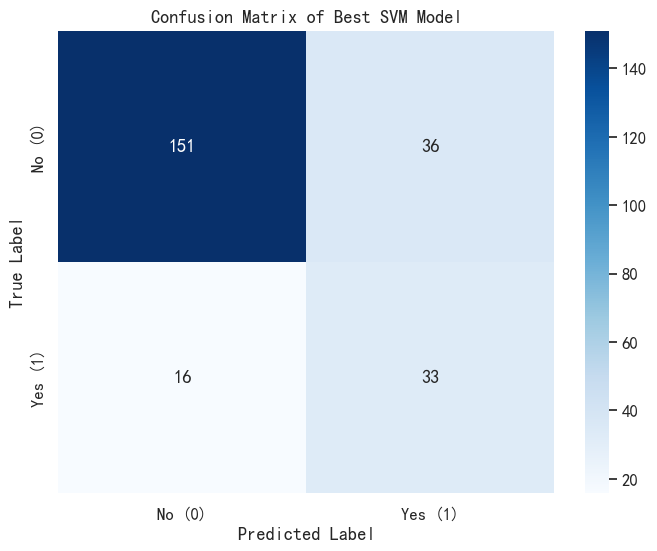

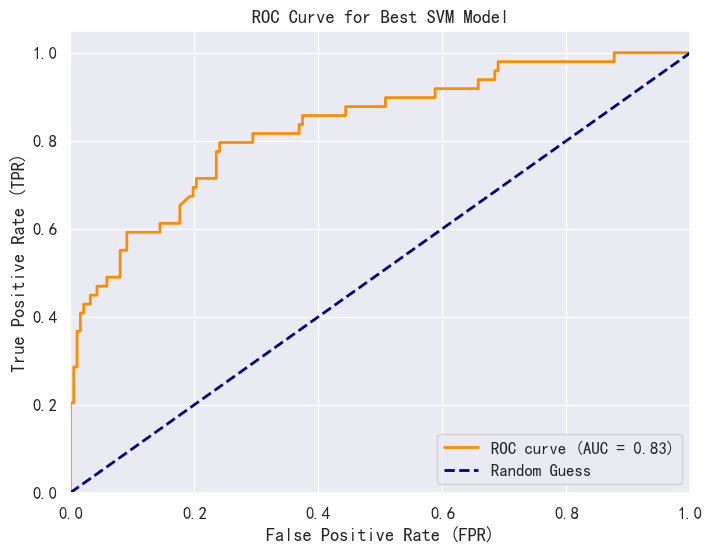

In [349]:
# C=1, gamma=0.01
from sklearn.svm import SVC
# 定义 SVM 模型（使用默认参数）
svm = SVC(probability=True, random_state=42,C=1, gamma= 0.01)  # 启用概率估计
# 'C': 70.20314474657421, 'kernel': 'rbf', 'gamma': 0.06730170359351065, 
# 训练模型
svm.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_proba = svm.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 输出测试集 AUC
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

y_pred = svm.predict(X_test)

# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 值: {f1}")


# 使用最佳模型在测试集上进行预测
y_pred_svm_best = svm.predict(X_test)

# 评估最佳 SVM 模型
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print(f"最佳 SVM 模型在测试集上的准确率: {accuracy_svm_best}")

print("最佳 SVM 模型分类报告:")
print(classification_report(y_test, y_pred_svm_best))

f1_svm_best = f1_score(y_test, y_pred_svm_best, average='weighted')
print(f"最佳 SVM 模型 F1 值: {f1_svm_best}")

y_pred_proba_svm_best = svm.predict_proba(X_test)[:, 1]
print(f"最佳 SVM 模型 AUC: {roc_auc_score(y_test, y_pred_proba_svm_best)}")

# 计算混淆矩阵 - 针对最佳 SVM 模型
cm_svm = confusion_matrix(y_test, y_pred_svm_best)
print("\n最佳 SVM 模型混淆矩阵:\n", cm_svm)

# 可视化混淆矩阵 - 针对最佳 SVM 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Best SVM Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对最佳 SVM 模型)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm_best)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Best SVM Model')
plt.legend(loc="lower right")
plt.show()

网格参数

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
最佳 SVM 模型参数: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
最佳 SVM 模型在测试集上的准确率: 0.8601694915254238
最佳 SVM 模型分类报告:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       187
           1       0.90      0.37      0.52        49

    accuracy                           0.86       236
   macro avg       0.88      0.68      0.72       236
weighted avg       0.87      0.86      0.84       236

最佳 SVM 模型 F1 值: 0.8358159419680328
最佳 SVM 模型 AUC: 0.8472116119174942

最佳 SVM 模型混淆矩阵:
 [[185   2]
 [ 31  18]]


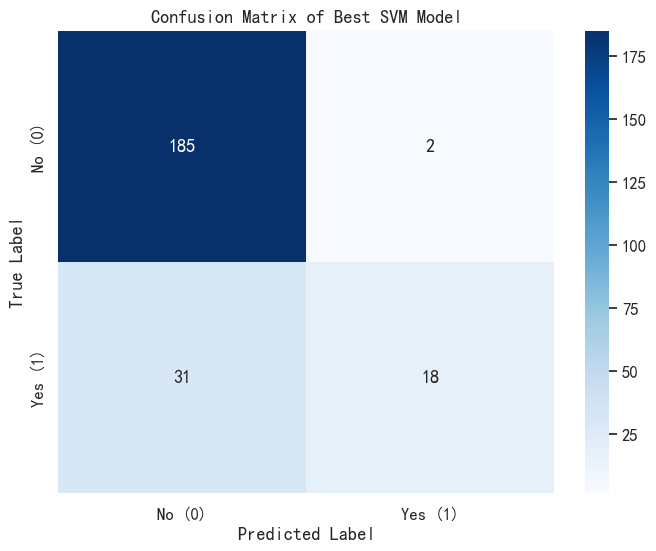

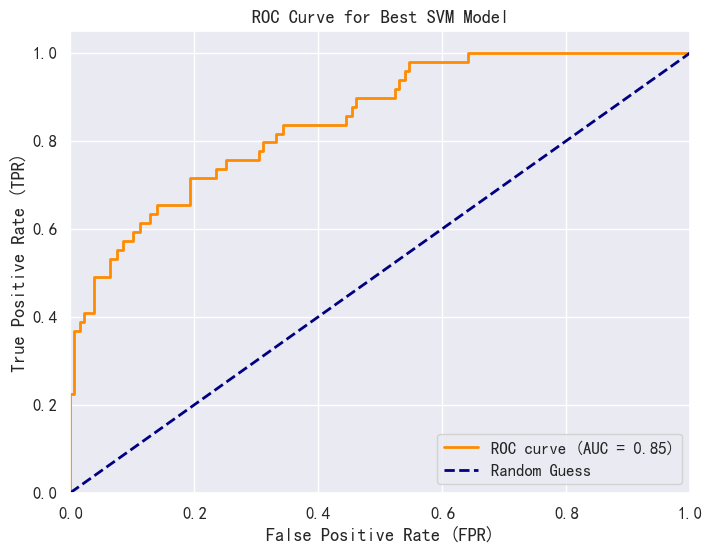

In [404]:
# 定义参数网格 - 您可以根据需要调整参数和取值范围,C=1, gamma=0.01
param_grid_svm = {
    'C': [0.1, 1, 10, 100],          # 尝试不同的 C 值 (正则化强度)
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], # 尝试不同的核函数
    'gamma': ['scale', 'auto', 0.01, 0.1], # 尝试不同的 gamma 值 (核系数)，'scale' 和 'auto' 是默认选项
    'class_weight': ['balanced', None],    # 处理类别不平衡
    'degree': [2, 3, 4],               # 尝试不同的 degree 值 (用于 'poly' 核函数)
    'probability': [True]              # 确保 probability=True，以便 predict_proba 可用 (计算 AUC)
}
# 创建 GridSearchCV 对象 - 针对 SVC (支持向量分类器)
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42), # 使用 SVC
                           param_grid=param_grid_svm,
                           cv=5,          # 使用 5 折交叉验证
                           scoring='f1_weighted', # 使用 weighted F1-score 作为评估指标
                           verbose=2,       # 可选: 显示搜索过程的详细信息
                           n_jobs=-1)      # 可选: 使用所有 CPU 核心并行搜索

# 在训练数据上运行 GridSearchCV - 训练 SVM 模型并进行调参
grid_search_svm.fit(X_train, y_train)

# 获取最佳模型和最佳参数 - 来自 SVM 的 GridSearchCV 结果
best_svm = grid_search_svm.best_estimator_
best_params_svm = grid_search_svm.best_params_

print("最佳 SVM 模型参数:", best_params_svm)

# 使用最佳模型在测试集上进行预测
y_pred_svm_best = best_svm.predict(X_test)

# 评估最佳 SVM 模型
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print(f"最佳 SVM 模型在测试集上的准确率: {accuracy_svm_best}")

print("最佳 SVM 模型分类报告:")
print(classification_report(y_test, y_pred_svm_best))

f1_svm_best = f1_score(y_test, y_pred_svm_best, average='weighted')
print(f"最佳 SVM 模型 F1 值: {f1_svm_best}")

y_pred_proba_svm_best = best_svm.predict_proba(X_test)[:, 1]
print(f"最佳 SVM 模型 AUC: {roc_auc_score(y_test, y_pred_proba_svm_best)}")

# 计算混淆矩阵 - 针对最佳 SVM 模型
cm_svm = confusion_matrix(y_test, y_pred_svm_best)
print("\n最佳 SVM 模型混淆矩阵:\n", cm_svm)

# 可视化混淆矩阵 - 针对最佳 SVM 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Best SVM Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对最佳 SVM 模型)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm_best)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Best SVM Model')
plt.legend(loc="lower right")
plt.show()

### GDBC

网格搜索

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
最佳 GBDT 模型参数: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
最佳 GBDT 模型在测试集上的准确率: 0.8177966101694916
最佳 GBDT 模型分类报告:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       187
           1       0.65      0.27      0.38        49

    accuracy                           0.82       236
   macro avg       0.74      0.61      0.64       236
weighted avg       0.80      0.82      0.79       236

最佳 GBDT 模型 F1 值: 0.7860631971098608
最佳 GBDT 模型 AUC: 0.7691

最佳 GBDT 模型混淆矩阵:
 [[180   7]
 [ 36  13]]


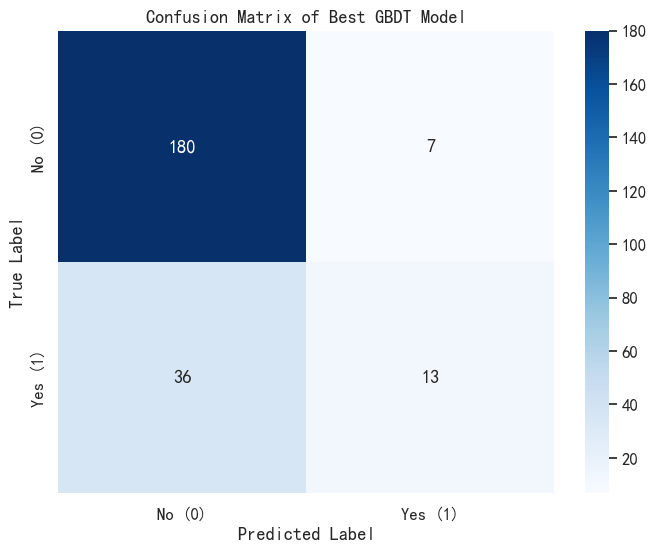

In [496]:
# 定义参数网格 - 您可以根据需要调整参数和取值范围
param_grid_gbdt = {
    'n_estimators': [100, 200, 300],      # 尝试不同的 boosting 轮数 (树的数量)
    'learning_rate': [0.01, 0.05, 0.1],   # 尝试不同的学习率
    'max_depth': [3, 4, 5],             # 尝试不同的最大深度
    'min_samples_split': [2, 5, 10],    # 尝试不同的节点分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 4],     # 尝试不同的叶节点所需的最小样本数
    'max_features': ['sqrt', 'log2', None] # 尝试不同的最大特征数
}

# 创建 GridSearchCV 对象 - 针对 GradientBoostingClassifier (GBDT)
grid_search_gbdt = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), # 使用 GradientBoostingClassifier
                           param_grid=param_grid_gbdt,
                           cv=5,          # 使用 5 折交叉验证
                           scoring='recall', # 使用 weighted F1-score 作为评估指标
                           verbose=2,       # 可选: 显示搜索过程的详细信息
                           n_jobs=-1)      # 可选: 使用所有 CPU 核心并行搜索

# 在训练数据上运行 GridSearchCV - 训练 GBDT 模型并进行调参
grid_search_gbdt.fit(X_train, y_train)

# 获取最佳模型和最佳参数 - 来自 GBDT 的 GridSearchCV 结果
best_gbdt = grid_search_gbdt.best_estimator_
best_params_gbdt = grid_search_gbdt.best_params_

print("最佳 GBDT 模型参数:", best_params_gbdt)

# 使用最佳模型在测试集上进行预测
y_pred_gbdt_best = best_gbdt.predict(X_test)
y_pred_proba_gbdt_best = best_gbdt.predict_proba(X_test)[:, 1]

# 评估最佳 GBDT 模型
accuracy_gbdt_best = accuracy_score(y_test, y_pred_gbdt_best)
print(f"最佳 GBDT 模型在测试集上的准确率: {accuracy_gbdt_best}")

print("最佳 GBDT 模型分类报告:")
print(classification_report(y_test, y_pred_gbdt_best))

f1_gbdt_best = f1_score(y_test, y_pred_gbdt_best, average='weighted')
print(f"最佳 GBDT 模型 F1 值: {f1_gbdt_best}")

auc_gbdt_best = roc_auc_score(y_test, y_pred_proba_gbdt_best)
print(f"最佳 GBDT 模型 AUC: {auc_gbdt_best:.4f}")

# 计算混淆矩阵 - 针对最佳 GBDT 模型
cm_gbdt = confusion_matrix(y_test, y_pred_gbdt_best)
print("\n最佳 GBDT 模型混淆矩阵:\n", cm_gbdt)

# 可视化混淆矩阵 - 针对最佳 GBDT 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbdt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Best GBDT Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对最佳 GBDT 模型)
fpr_gbdt, tpr_gbdt, thresholds_gbdt = roc_curve(y_test, y_pred_proba_gbdt_best)
roc_auc_gbdt = auc(fpr_gbdt, tpr_gbdt)

optuna

In [ ]:
import optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    # 设定可调参数
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # 定义模型
    model = GradientBoostingClassifier(
        n_estimators=n_estimators, learning_rate=learning_rate,
        max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, subsample=subsample,
        max_features=max_features, random_state=42
    )

    # 交叉验证评分
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted').mean()
    return score

# 创建优化器
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # 运行50次优化

# 输出最佳参数
print("最佳超参数:", study)


[I 2025-03-23 17:53:07,155] A new study created in memory with name: no-name-7e70b775-4466-4e21-bc78-b252e3182265
[I 2025-03-23 17:53:07,782] Trial 0 finished with value: 0.8443607174430868 and parameters: {'n_estimators': 50, 'learning_rate': 0.15501434023709545, 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 4, 'subsample': 0.8149373494468424, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8443607174430868.
[I 2025-03-23 17:53:08,202] Trial 1 finished with value: 0.8485706633722122 and parameters: {'n_estimators': 72, 'learning_rate': 0.11253463142283594, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 8, 'subsample': 0.9803210562055367, 'max_features': 'log2'}. Best is trial 1 with value: 0.8485706633722122.
[I 2025-03-23 17:53:10,764] Trial 2 finished with value: 0.8400410416743872 and parameters: {'n_estimators': 258, 'learning_rate': 0.0957153878255047, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 4, 'subsample': 0.766725600316341

AttributeError: 'Study' object has no attribute 'best_params_'

In [411]:
# 输出最佳参数
print("最佳超参数:", study.best_params)

最佳超参数: {'n_estimators': 267, 'learning_rate': 0.13784475256766954, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 5, 'subsample': 0.8038843392788658, 'max_features': 'log2'}


In [ ]:
# 最佳超参数: {'n_estimators': 267, 'learning_rate': 0.13784475256766954, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 5, 'subsample': 0.8038843392788658, 'max_features': 'log2'}

默认参数 GBDT 模型在测试集上的准确率: 0.8559
默认参数 GBDT 模型分类报告:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       187
           1       0.78      0.43      0.55        49

    accuracy                           0.86       236
   macro avg       0.82      0.70      0.73       236
weighted avg       0.85      0.86      0.84       236

默认参数 GBDT 模型 F1 值: 0.8391
默认参数 GBDT 模型 AUC: 0.8076

默认参数 GBDT 模型混淆矩阵:
 [[181   6]
 [ 28  21]]


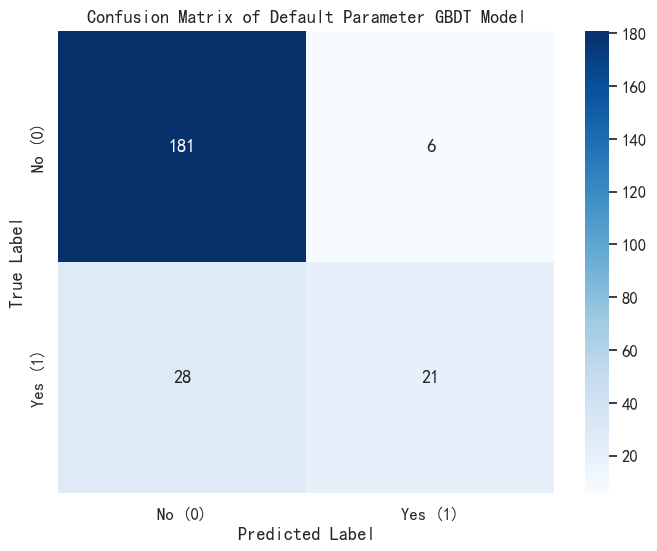

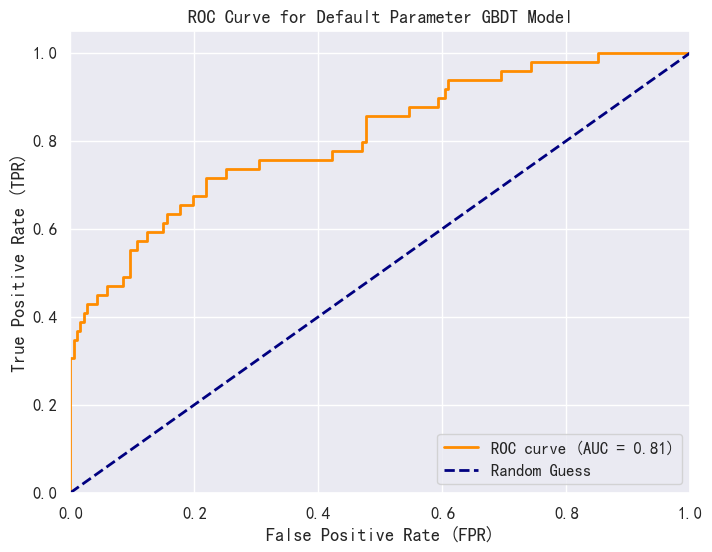

In [504]:
# 创建 GradientBoostingClassifier 模型，使用optuna参数
gbdt_default = GradientBoostingClassifier(random_state=23,n_estimators=267,learning_rate=0.13784475256766954,max_depth=3,min_samples_split=15,min_samples_leaf=6,subsample=0.8038843392788658,max_features='log2') # 可以设置 random_state 以保证结果可复现

# 在训练数据上训练模型
gbdt_default.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_gbdt_default = gbdt_default.predict(X_test)
y_pred_proba_gbdt_default = gbdt_default.predict_proba(X_test)[:, 1]

# 评估默认参数 GBDT 模型
accuracy_gbdt_default = accuracy_score(y_test, y_pred_gbdt_default)
print(f"默认参数 GBDT 模型在测试集上的准确率: {accuracy_gbdt_default:.4f}")

print("默认参数 GBDT 模型分类报告:")
print(classification_report(y_test, y_pred_gbdt_default))

f1_gbdt_default = f1_score(y_test, y_pred_gbdt_default, average='weighted')
print(f"默认参数 GBDT 模型 F1 值: {f1_gbdt_default:.4f}")

auc_gbdt_default = roc_auc_score(y_test, y_pred_proba_gbdt_default)
print(f"默认参数 GBDT 模型 AUC: {auc_gbdt_default:.4f}")

# 计算混淆矩阵 - 针对默认参数 GBDT 模型
cm_gbdt_default = confusion_matrix(y_test, y_pred_gbdt_default)
print("\n默认参数 GBDT 模型混淆矩阵:\n", cm_gbdt_default)

# 可视化混淆矩阵 - 针对默认参数 GBDT 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbdt_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Default Parameter GBDT Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对默认参数 GBDT 模型)
fpr_gbdt_default, tpr_gbdt_default, thresholds_gbdt_default = roc_curve(y_test, y_pred_proba_gbdt_default)
roc_auc_gbdt_default = auc(fpr_gbdt_default, tpr_gbdt_default)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbdt_default, tpr_gbdt_default, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbdt_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Default Parameter GBDT Model')
plt.legend(loc="lower right")
plt.show()

论文参数

In [17]:
# 创建 GradientBoostingClassifier 模型，使用默认参数
gbdt_default = GradientBoostingClassifier(learning_rate=0.25, max_depth=2, random_state=45,
                subsample=1, max_features='sqrt') # 可以设置 random_state 以保证结果可复现

# 在训练数据上训练模型
gbdt_default.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_gbdt_default = gbdt_default.predict(X_test)
y_pred_proba_gbdt_default = gbdt_default.predict_proba(X_test)[:, 1]

# 评估默认参数 GBDT 模型
accuracy_gbdt_default = accuracy_score(y_test, y_pred_gbdt_default)
print(f"默认参数 GBDT 模型在测试集上的准确率: {accuracy_gbdt_default:.4f}")

print("默认参数 GBDT 模型分类报告:")
print(classification_report(y_test, y_pred_gbdt_default))

f1_gbdt_default = f1_score(y_test, y_pred_gbdt_default, average='weighted')
print(f"默认参数 GBDT 模型 F1 值: {f1_gbdt_default:.4f}")

auc_gbdt_default = roc_auc_score(y_test, y_pred_proba_gbdt_default)
print(f"默认参数 GBDT 模型 AUC: {auc_gbdt_default:.4f}")

# 计算混淆矩阵 - 针对默认参数 GBDT 模型
cm_gbdt_default = confusion_matrix(y_test, y_pred_gbdt_default)
print("\n默认参数 GBDT 模型混淆矩阵:\n", cm_gbdt_default)

# 可视化混淆矩阵 - 针对默认参数 GBDT 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbdt_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Default Parameter GBDT Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对默认参数 GBDT 模型)
fpr_gbdt_default, tpr_gbdt_default, thresholds_gbdt_default = roc_curve(y_test, y_pred_proba_gbdt_default)
roc_auc_gbdt_default = auc(fpr_gbdt_default, tpr_gbdt_default)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbdt_default, tpr_gbdt_default, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbdt_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Default Parameter GBDT Model')
plt.legend(loc="lower right")
plt.show()

NameError: name 'GradientBoostingClassifier' is not defined

不调参

默认参数 GBDT 模型在测试集上的准确率: 0.8559
默认参数 GBDT 模型分类报告:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       187
           1       0.78      0.43      0.55        49

    accuracy                           0.86       236
   macro avg       0.82      0.70      0.73       236
weighted avg       0.85      0.86      0.84       236

默认参数 GBDT 模型 F1 值: 0.8391
默认参数 GBDT 模型 AUC: 0.8028

默认参数 GBDT 模型混淆矩阵:
 [[181   6]
 [ 28  21]]


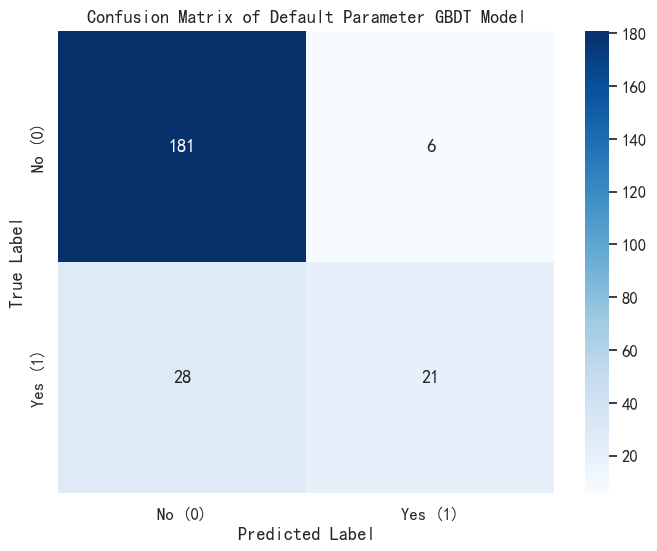

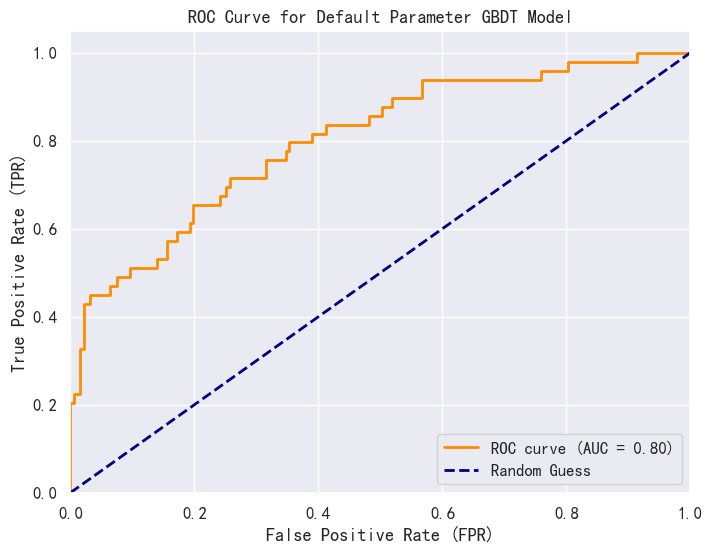

In [538]:
# 创建 GradientBoostingClassifier 模型，使用默认参数
gbdt_default = GradientBoostingClassifier(random_state=42) # 可以设置 random_state 以保证结果可复现

# 在训练数据上训练模型
gbdt_default.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_gbdt_default = gbdt_default.predict(X_test)
y_pred_proba_gbdt_default = gbdt_default.predict_proba(X_test)[:, 1]

# 评估默认参数 GBDT 模型
accuracy_gbdt_default = accuracy_score(y_test, y_pred_gbdt_default)
print(f"默认参数 GBDT 模型在测试集上的准确率: {accuracy_gbdt_default:.4f}")

print("默认参数 GBDT 模型分类报告:")
print(classification_report(y_test, y_pred_gbdt_default))

f1_gbdt_default = f1_score(y_test, y_pred_gbdt_default, average='weighted')
print(f"默认参数 GBDT 模型 F1 值: {f1_gbdt_default:.4f}")

auc_gbdt_default = roc_auc_score(y_test, y_pred_proba_gbdt_default)
print(f"默认参数 GBDT 模型 AUC: {auc_gbdt_default:.4f}")

# 计算混淆矩阵 - 针对默认参数 GBDT 模型
cm_gbdt_default = confusion_matrix(y_test, y_pred_gbdt_default)
print("\n默认参数 GBDT 模型混淆矩阵:\n", cm_gbdt_default)

# 可视化混淆矩阵 - 针对默认参数 GBDT 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbdt_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Default Parameter GBDT Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对默认参数 GBDT 模型)
fpr_gbdt_default, tpr_gbdt_default, thresholds_gbdt_default = roc_curve(y_test, y_pred_proba_gbdt_default)
roc_auc_gbdt_default = auc(fpr_gbdt_default, tpr_gbdt_default)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbdt_default, tpr_gbdt_default, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbdt_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Default Parameter GBDT Model')
plt.legend(loc="lower right")
plt.show()

贝叶斯

默认参数 GBDT 模型在测试集上的准确率: 0.8517
默认参数 GBDT 模型分类报告:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       187
           1       0.94      0.31      0.46        49

    accuracy                           0.85       236
   macro avg       0.89      0.65      0.69       236
weighted avg       0.86      0.85      0.82       236

默认参数 GBDT 模型 F1 值: 0.8201
默认参数 GBDT 模型 AUC: 0.8087

默认参数 GBDT 模型混淆矩阵:
 [[186   1]
 [ 34  15]]


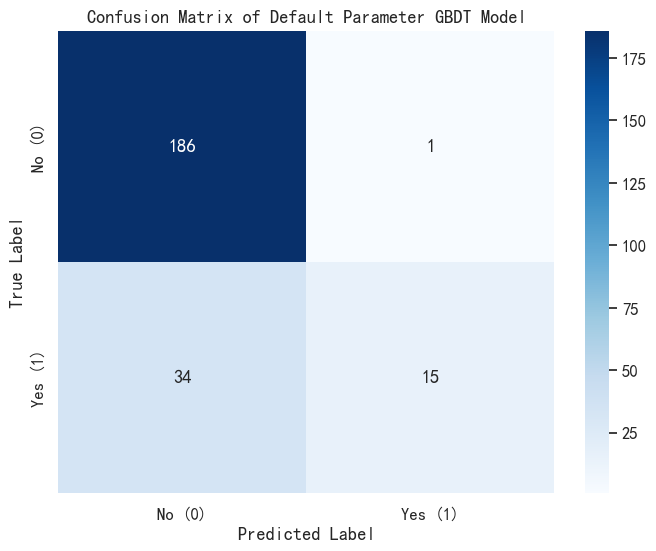

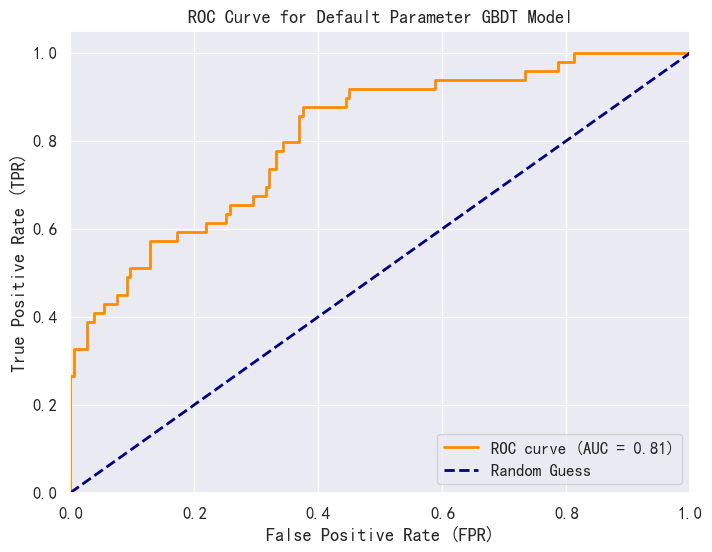

In [508]:
# 'n_estimators': 252, 'learning_rate': 0.031853892484216564, 'max_depth': 10, 'subsample': 0.5402985608633888, 'min_samples_split': 2
# 创建 GradientBoostingClassifier 模型，使用默认参数
gbdt_default = GradientBoostingClassifier(random_state=42,learning_rate=0.031853892484216564,max_depth=10,subsample=0.5402985608633888,n_estimators=252,min_samples_split=2) # 可以设置 random_state 以保证结果可复现

# 在训练数据上训练模型
gbdt_default.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_gbdt_default = gbdt_default.predict(X_test)
y_pred_proba_gbdt_default = gbdt_default.predict_proba(X_test)[:, 1]

# 评估默认参数 GBDT 模型
accuracy_gbdt_default = accuracy_score(y_test, y_pred_gbdt_default)
print(f"默认参数 GBDT 模型在测试集上的准确率: {accuracy_gbdt_default:.4f}")

print("默认参数 GBDT 模型分类报告:")
print(classification_report(y_test, y_pred_gbdt_default))

f1_gbdt_default = f1_score(y_test, y_pred_gbdt_default, average='weighted')
print(f"默认参数 GBDT 模型 F1 值: {f1_gbdt_default:.4f}")

auc_gbdt_default = roc_auc_score(y_test, y_pred_proba_gbdt_default)
print(f"默认参数 GBDT 模型 AUC: {auc_gbdt_default:.4f}")

# 计算混淆矩阵 - 针对默认参数 GBDT 模型
cm_gbdt_default = confusion_matrix(y_test, y_pred_gbdt_default)
print("\n默认参数 GBDT 模型混淆矩阵:\n", cm_gbdt_default)

# 可视化混淆矩阵 - 针对默认参数 GBDT 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbdt_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Default Parameter GBDT Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对默认参数 GBDT 模型)
fpr_gbdt_default, tpr_gbdt_default, thresholds_gbdt_default = roc_curve(y_test, y_pred_proba_gbdt_default)
roc_auc_gbdt_default = auc(fpr_gbdt_default, tpr_gbdt_default)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbdt_default, tpr_gbdt_default, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbdt_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Default Parameter GBDT Model')
plt.legend(loc="lower right")
plt.show()

论文参数

默认参数 GBDT 模型在测试集上的准确率: 0.8517
默认参数 GBDT 模型分类报告:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       187
           1       0.75      0.43      0.55        49

    accuracy                           0.85       236
   macro avg       0.81      0.70      0.73       236
weighted avg       0.84      0.85      0.84       236

默认参数 GBDT 模型 F1 值: 0.8354
默认参数 GBDT 模型 AUC: 0.8172

默认参数 GBDT 模型混淆矩阵:
 [[180   7]
 [ 28  21]]


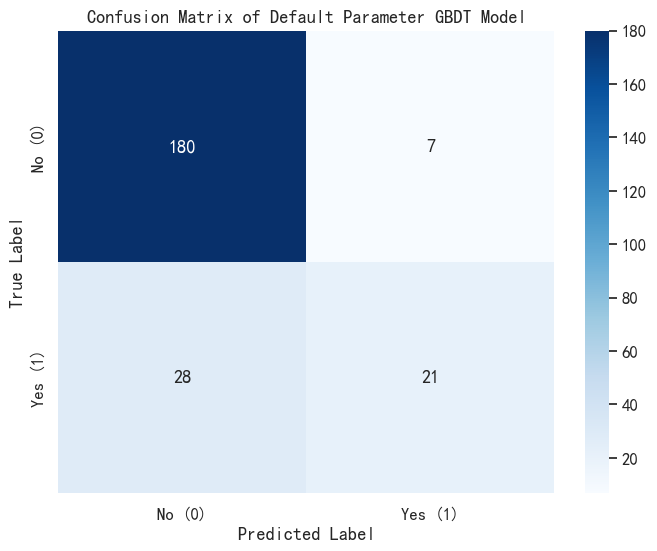

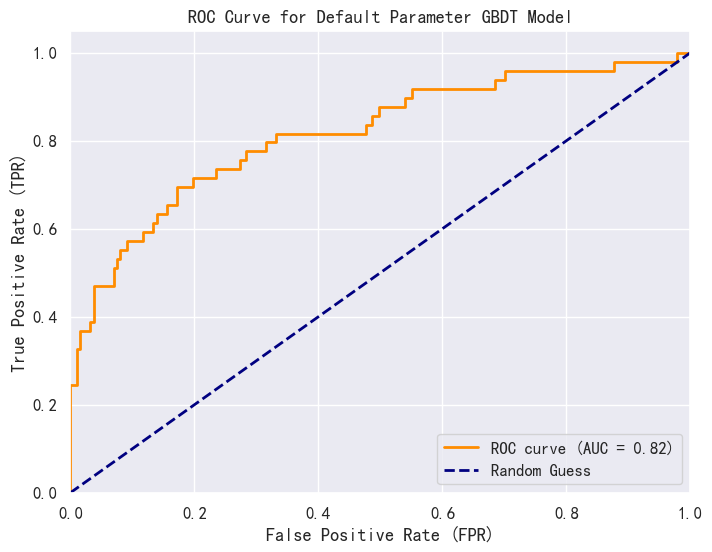

In [335]:
# 创建 GradientBoostingClassifier 模型，使用默认参数
gbdt_default = GradientBoostingClassifier(random_state=42,learning_rate=0.25,max_depth=2,subsample=1,max_features='sqrt') # 可以设置 random_state 以保证结果可复现

# 在训练数据上训练模型
gbdt_default.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_gbdt_default = gbdt_default.predict(X_test)
y_pred_proba_gbdt_default = gbdt_default.predict_proba(X_test)[:, 1]

# 评估默认参数 GBDT 模型
accuracy_gbdt_default = accuracy_score(y_test, y_pred_gbdt_default)
print(f"默认参数 GBDT 模型在测试集上的准确率: {accuracy_gbdt_default:.4f}")

print("默认参数 GBDT 模型分类报告:")
print(classification_report(y_test, y_pred_gbdt_default))

f1_gbdt_default = f1_score(y_test, y_pred_gbdt_default, average='weighted')
print(f"默认参数 GBDT 模型 F1 值: {f1_gbdt_default:.4f}")

auc_gbdt_default = roc_auc_score(y_test, y_pred_proba_gbdt_default)
print(f"默认参数 GBDT 模型 AUC: {auc_gbdt_default:.4f}")

# 计算混淆矩阵 - 针对默认参数 GBDT 模型
cm_gbdt_default = confusion_matrix(y_test, y_pred_gbdt_default)
print("\n默认参数 GBDT 模型混淆矩阵:\n", cm_gbdt_default)

# 可视化混淆矩阵 - 针对默认参数 GBDT 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbdt_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Default Parameter GBDT Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对默认参数 GBDT 模型)
fpr_gbdt_default, tpr_gbdt_default, thresholds_gbdt_default = roc_curve(y_test, y_pred_proba_gbdt_default)
roc_auc_gbdt_default = auc(fpr_gbdt_default, tpr_gbdt_default)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbdt_default, tpr_gbdt_default, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbdt_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Default Parameter GBDT Model')
plt.legend(loc="lower right")
plt.show()

### KNN

默认参数 KNN 模型在测试集上的准确率: 0.6483
默认参数 KNN 模型分类报告:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       187
           1       0.31      0.55      0.39        49

    accuracy                           0.65       236
   macro avg       0.58      0.61      0.57       236
weighted avg       0.74      0.65      0.68       236

默认参数 KNN 模型 F1 值: 0.6779
默认参数 KNN 模型 AUC: 0.6709

默认参数 KNN 模型混淆矩阵:
 [[126  61]
 [ 22  27]]


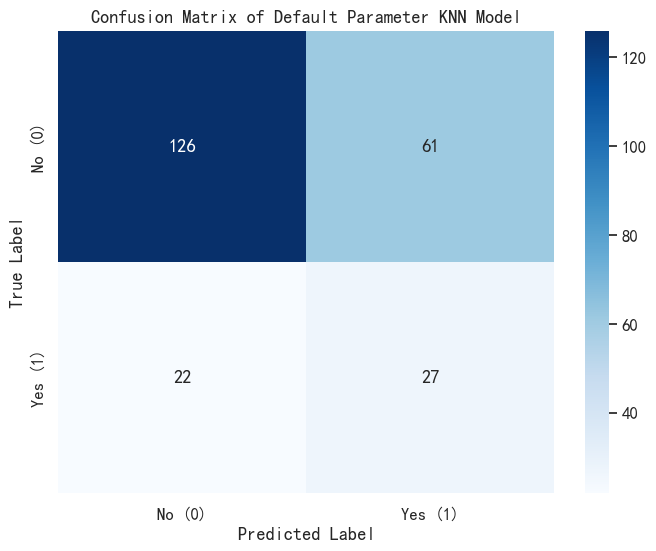

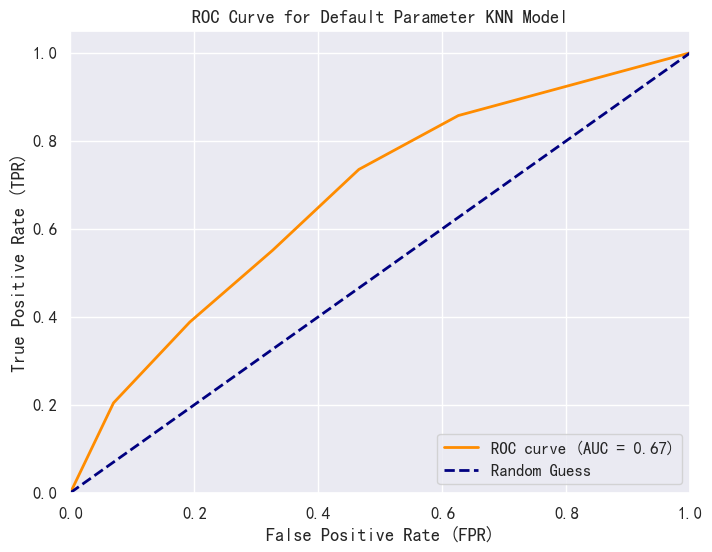

In [350]:
# 创建 KNeighborsClassifier 模型，使用默认参数 (不调参)
knn_default = KNeighborsClassifier() # 使用默认参数初始化 KNN 模型

# 在训练数据上训练模型
knn_default.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_knn_default = knn_default.predict(X_test)
y_pred_proba_knn_default = knn_default.predict_proba(X_test)[:, 1] # 获取概率用于 AUC 计算

# 评估默认参数 KNN 模型
accuracy_knn_default = accuracy_score(y_test, y_pred_knn_default)
print(f"默认参数 KNN 模型在测试集上的准确率: {accuracy_knn_default:.4f}")

print("默认参数 KNN 模型分类报告:")
print(classification_report(y_test, y_pred_knn_default))

f1_knn_default = f1_score(y_test, y_pred_knn_default, average='weighted')
print(f"默认参数 KNN 模型 F1 值: {f1_knn_default:.4f}")

auc_knn_default = roc_auc_score(y_test, y_pred_proba_knn_default)
print(f"默认参数 KNN 模型 AUC: {auc_knn_default:.4f}")

# 计算混淆矩阵 - 针对默认参数 KNN 模型
cm_knn_default = confusion_matrix(y_test, y_pred_knn_default)
print("\n默认参数 KNN 模型混淆矩阵:\n", cm_knn_default)

# 可视化混淆矩阵 - 针对默认参数 KNN 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Default Parameter KNN Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对默认参数 KNN 模型)
fpr_knn_default, tpr_knn_default, thresholds_knn_default = roc_curve(y_test, y_pred_proba_knn_default)
roc_auc_knn_default = auc(fpr_knn_default, tpr_knn_default)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_default, tpr_knn_default, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Default Parameter KNN Model')
plt.legend(loc="lower right")
plt.show()

### 朴素贝叶斯

默认参数 Naive Bayes 模型在测试集上的准确率: 0.6314
默认参数 Naive Bayes 模型分类报告:
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       187
           1       0.32      0.71      0.45        49

    accuracy                           0.63       236
   macro avg       0.61      0.66      0.58       236
weighted avg       0.77      0.63      0.67       236

默认参数 Naive Bayes 模型 F1 值: 0.6661
默认参数 Naive Bayes 模型 AUC: 0.7586

默认参数 Naive Bayes 模型混淆矩阵:
 [[114  73]
 [ 14  35]]


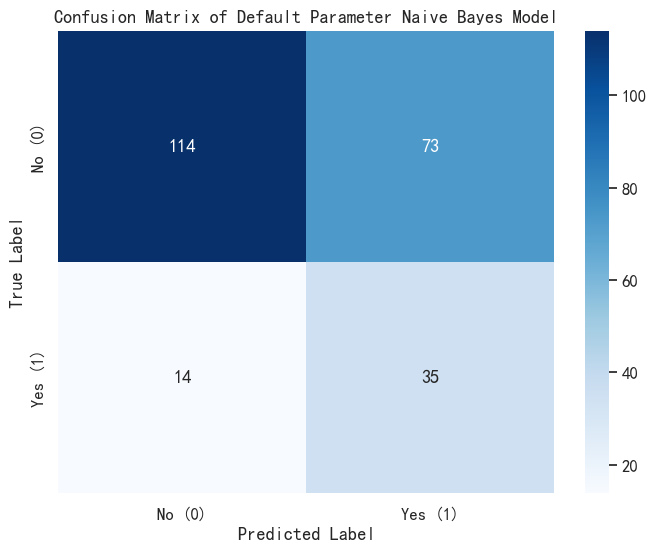

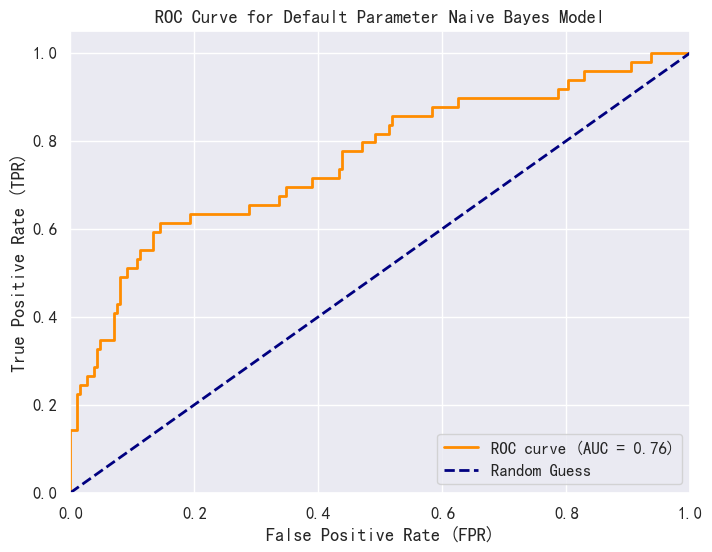

In [351]:
# 创建 GaussianNB 模型，使用默认参数 (不调参)
nb_default = GaussianNB() # 使用默认参数初始化 GaussianNB 模型

# 在训练数据上训练模型
nb_default.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_nb_default = nb_default.predict(X_test)
y_pred_proba_nb_default = nb_default.predict_proba(X_test)[:, 1] # 获取概率用于 AUC 计算

# 评估默认参数 GaussianNB 模型
accuracy_nb_default = accuracy_score(y_test, y_pred_nb_default)
print(f"默认参数 Naive Bayes 模型在测试集上的准确率: {accuracy_nb_default:.4f}")

print("默认参数 Naive Bayes 模型分类报告:")
print(classification_report(y_test, y_pred_nb_default))

f1_nb_default = f1_score(y_test, y_pred_nb_default, average='weighted')
print(f"默认参数 Naive Bayes 模型 F1 值: {f1_nb_default:.4f}")

auc_nb_default = roc_auc_score(y_test, y_pred_proba_nb_default)
print(f"默认参数 Naive Bayes 模型 AUC: {auc_nb_default:.4f}")

# 计算混淆矩阵 - 针对默认参数 Naive Bayes 模型
cm_nb_default = confusion_matrix(y_test, y_pred_nb_default)
print("\n默认参数 Naive Bayes 模型混淆矩阵:\n", cm_nb_default)

# 可视化混淆矩阵 - 针对默认参数 Naive Bayes 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Default Parameter Naive Bayes Model')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对默认参数 Naive Bayes 模型)
fpr_nb_default, tpr_nb_default, thresholds_nb_default = roc_curve(y_test, y_pred_proba_nb_default)
roc_auc_nb_default = auc(fpr_nb_default, tpr_nb_default)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_default, tpr_nb_default, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nb_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Default Parameter Naive Bayes Model')
plt.legend(loc="lower right")
plt.show()

### LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 801, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4631
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
默认参数 LightGBM 模型在测试集上的准确率: 0.8475
默认参数 LightGBM 模型分类报告:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       187
           1       0.76      0.39      0.51        49

    accuracy                           0.85       236
   macro avg       0.81      0.68      0.71       236
weighted avg       0.84      0.85      0.83       236

默认参数 LightGBM 模型 F1 值: 0.8273
默认参数 LightGBM 模型 AUC: 0.7996

默认参数 LightGBM 模型混淆矩阵:
 [[181   6]
 [ 30  19

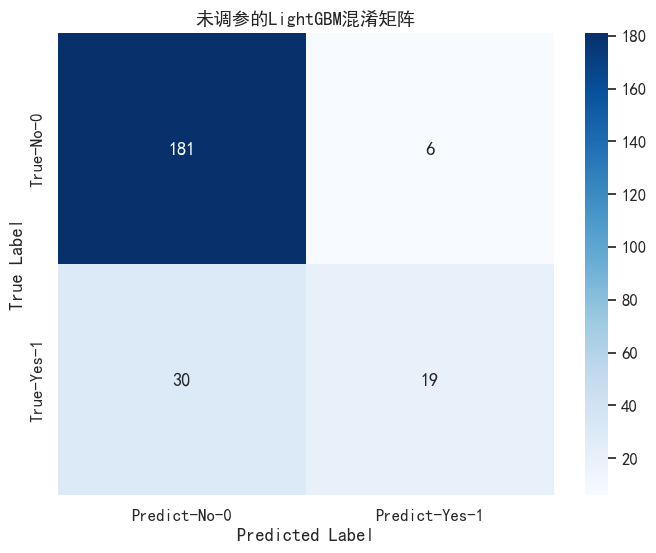

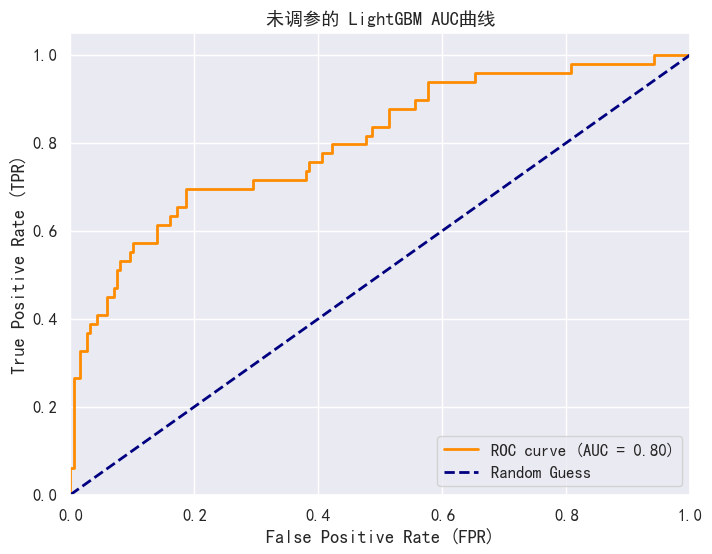

In [562]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# 创建 LightGBM 模型，使用默认参数 (不调参)
lgbm_default = lgb.LGBMClassifier(random_state=42)  # 使用默认参数初始化 LightGBM 模型

# 在训练数据上训练模型
lgbm_default.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_lgbm_default = lgbm_default.predict(X_test)
y_pred_proba_lgbm_default = lgbm_default.predict_proba(X_test)[:, 1]  # 获取概率用于 AUC 计算

# 评估默认参数 LightGBM 模型
accuracy_lgbm_default = accuracy_score(y_test, y_pred_lgbm_default)
print(f"默认参数 LightGBM 模型在测试集上的准确率: {accuracy_lgbm_default:.4f}")

print("默认参数 LightGBM 模型分类报告:")
print(classification_report(y_test, y_pred_lgbm_default))

f1_lgbm_default = f1_score(y_test, y_pred_lgbm_default, average='weighted')
print(f"默认参数 LightGBM 模型 F1 值: {f1_lgbm_default:.4f}")

auc_lgbm_default = roc_auc_score(y_test, y_pred_proba_lgbm_default)
print(f"默认参数 LightGBM 模型 AUC: {auc_lgbm_default:.4f}")

# 计算混淆矩阵 - 针对默认参数 LightGBM 模型
cm_lgbm_default = confusion_matrix(y_test, y_pred_lgbm_default)
print("\n默认参数 LightGBM 模型混淆矩阵:\n", cm_lgbm_default)

# 可视化混淆矩阵 - 针对默认参数 LightGBM 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predict-No-0', 'Predict-Yes-1'],
            yticklabels=['True-No-0', 'True-Yes-1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('未调参的LightGBM混淆矩阵')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对默认参数 LightGBM 模型)
fpr_lgbm_default, tpr_lgbm_default, thresholds_lgbm_default = roc_curve(y_test, y_pred_proba_lgbm_default)
roc_auc_lgbm_default = auc(fpr_lgbm_default, tpr_lgbm_default)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm_default, tpr_lgbm_default, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lgbm_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('未调参的 LightGBM AUC曲线')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 801, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4631
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

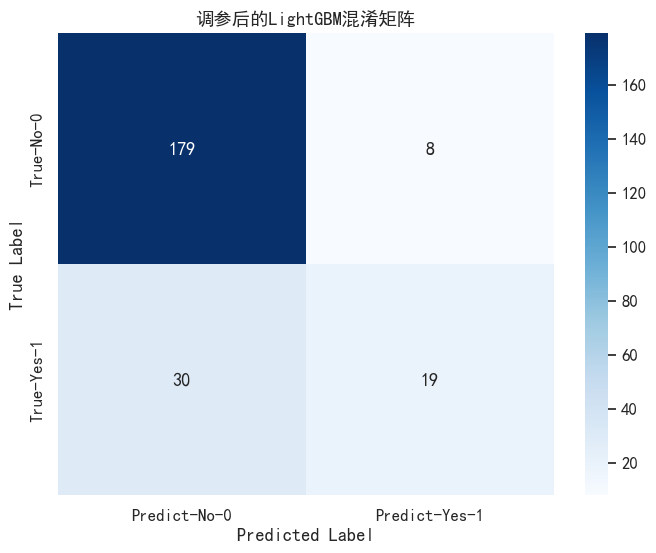

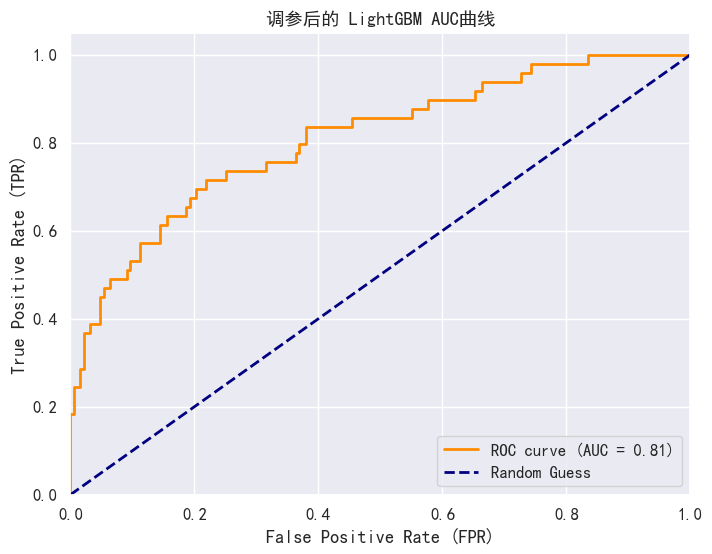

In [561]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# 创建 LightGBM 模型，使用默认参数 (不调参)
lgbm_default = lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
                                    n_estimators=100, num_leaves=31, subsample=0.8,random_state=42)  # 使用默认参数初始化 LightGBM 模型

# 在训练数据上训练模型
lgbm_default.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_lgbm_default = lgbm_default.predict(X_test)
y_pred_proba_lgbm_default = lgbm_default.predict_proba(X_test)[:, 1]  # 获取概率用于 AUC 计算

# 评估默认参数 LightGBM 模型
accuracy_lgbm_default = accuracy_score(y_test, y_pred_lgbm_default)
print(f"默认参数 LightGBM 模型在测试集上的准确率: {accuracy_lgbm_default:.4f}")

print("默认参数 LightGBM 模型分类报告:")
print(classification_report(y_test, y_pred_lgbm_default))

f1_lgbm_default = f1_score(y_test, y_pred_lgbm_default, average='weighted')
print(f"默认参数 LightGBM 模型 F1 值: {f1_lgbm_default:.4f}")

auc_lgbm_default = roc_auc_score(y_test, y_pred_proba_lgbm_default)
print(f"默认参数 LightGBM 模型 AUC: {auc_lgbm_default:.4f}")

# 计算混淆矩阵 - 针对默认参数 LightGBM 模型
cm_lgbm_default = confusion_matrix(y_test, y_pred_lgbm_default)
print("\n默认参数 LightGBM 模型混淆矩阵:\n", cm_lgbm_default)

# 可视化混淆矩阵 - 针对默认参数 LightGBM 模型
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predict-No-0', 'Predict-Yes-1'],
            yticklabels=['True-No-0', 'True-Yes-1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('调参后的LightGBM混淆矩阵')
plt.show()

# 计算 ROC 曲线和 AUC (同样针对默认参数 LightGBM 模型)
fpr_lgbm_default, tpr_lgbm_default, thresholds_lgbm_default = roc_curve(y_test, y_pred_proba_lgbm_default)
roc_auc_lgbm_default = auc(fpr_lgbm_default, tpr_lgbm_default)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm_default, tpr_lgbm_default, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lgbm_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('调参后的 LightGBM AUC曲线')
plt.legend(loc="lower right")
plt.show()


### 参数调优

#### 优化函数

In [256]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

# 定义评估指标 (加权F1)
f1_scorer = make_scorer(f1_score, average='weighted')

# 通用优化函数
def optimize_model(trial, model_class, param_space):
    params = {}
    for param_name, param_config in param_space.items():
        if param_config['type'] == 'categorical':
            params[param_name] = trial.suggest_categorical(param_name, param_config['choices'])
        elif param_config['type'] == 'int':
            params[param_name] = trial.suggest_int(param_name, *param_config['range'])
        elif param_config['type'] == 'float':
            params[param_name] = trial.suggest_float(param_name, *param_config['range'], log=param_config.get('log', False))
    model = model_class(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=f1_scorer).mean()
    return score

c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 逻辑回归

In [ ]:
def objective_lr(trial):
    param_space = {
        'C': {'type': 'float', 'range': (1e-4, 1e4), 'log': True},
        'penalty': {'type': 'categorical', 'choices': ['l1', 'l2']},
        'solver': {'type': 'categorical', 'choices': ['liblinear', 'saga']},
        'class_weight': {'type': 'categorical', 'choices': [None, 'balanced']}
    }
    return optimize_model(trial, LogisticRegression, param_space)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100)
best_lr = LogisticRegression(**study_lr.best_params)
#  {'C': 124.15503013717493, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': 'balanced'}. 
# Best is trial 12 with value: 0.7922651662349705.

[I 2025-03-20 22:30:47,470] A new study created in memory with name: no-name-5ae9fe08-775d-41ac-847b-e3c84f77eb43
[I 2025-03-20 22:30:47,642] Trial 0 finished with value: 0.7916442698818771 and parameters: {'C': 0.25234570356256925, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7916442698818771.
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

#### SVC

In [ ]:
def objective_svm(trial):
    param_space = {
        'C': {'type': 'float', 'range': (1e-2, 1e3), 'log': True},
        'kernel': {'type': 'categorical', 'choices': ['linear', 'rbf', 'poly']},
        'gamma': {'type': 'float', 'range': (1e-4, 1e2), 'log': True},
        'class_weight': {'type': 'categorical', 'choices': [None, 'balanced']}
    }
    return optimize_model(trial, SVC, param_space)

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=100)
best_svm = SVC(**study_svm.best_params, probability=True)
# 
# 'C': 70.20314474657421, 'kernel': 'rbf', 'gamma': 0.06730170359351065, 'class_weight': None
#  {'C': 70.20314474657421, 'kernel': 'rbf', 'gamma': 0.06730170359351065, 'class_weight': None}.
#  Best is trial 96 with value: 0.9956378914155163.

[I 2025-03-20 22:32:21,753] A new study created in memory with name: no-name-785ede67-9549-41f9-93c9-dfb092bedea1
[I 2025-03-20 22:32:22,769] Trial 0 finished with value: 0.925871017387484 and parameters: {'C': 51.825176563555026, 'kernel': 'rbf', 'gamma': 0.5564809306071091, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.925871017387484.
[I 2025-03-20 22:32:23,515] Trial 1 finished with value: 0.7880486604957607 and parameters: {'C': 1.0825581492694805, 'kernel': 'linear', 'gamma': 0.00016500578060433228, 'class_weight': None}. Best is trial 0 with value: 0.925871017387484.
[I 2025-03-20 22:32:24,050] Trial 2 finished with value: 0.8274298919101923 and parameters: {'C': 22.885318783032233, 'kernel': 'rbf', 'gamma': 0.0012597856143457306, 'class_weight': None}. Best is trial 0 with value: 0.925871017387484.
[I 2025-03-20 22:34:11,553] Trial 3 finished with value: 0.7904606944313357 and parameters: {'C': 311.35280616051864, 'kernel': 'linear', 'gamma': 0.1588544934186856, 'c

#### 随机森林

In [ ]:
def objective_rf(trial):
    param_space = {
        'n_estimators': {'type': 'int', 'range': (100, 1000)},
        'max_depth': {'type': 'int', 'range': (5, 50)},
        'min_samples_split': {'type': 'int', 'range': (2, 20)},
        'min_samples_leaf': {'type': 'int', 'range': (1, 10)},
        'class_weight': {'type': 'categorical', 'choices': [None, 'balanced']}
    }
    return optimize_model(trial, RandomForestClassifier, param_space)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)
best_rf = RandomForestClassifier(**study_rf.best_params)
# {'n_estimators': 237, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3, 'class_weight': None}. Best is trial 52 with value: 0.9360365735408012.

[I 2025-03-20 22:50:56,275] A new study created in memory with name: no-name-fdbede65-f494-4b46-a359-817d012a0ce2
[I 2025-03-20 22:51:18,759] Trial 0 finished with value: 0.9216344883469627 and parameters: {'n_estimators': 991, 'max_depth': 47, 'min_samples_split': 12, 'min_samples_leaf': 5, 'class_weight': None}. Best is trial 0 with value: 0.9216344883469627.
[I 2025-03-20 22:51:34,102] Trial 1 finished with value: 0.9290368284849781 and parameters: {'n_estimators': 646, 'max_depth': 31, 'min_samples_split': 7, 'min_samples_leaf': 1, 'class_weight': None}. Best is trial 1 with value: 0.9290368284849781.
[I 2025-03-20 22:51:37,058] Trial 2 finished with value: 0.9168023781851333 and parameters: {'n_estimators': 151, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 6, 'class_weight': None}. Best is trial 1 with value: 0.9290368284849781.
[I 2025-03-20 22:51:40,586] Trial 3 finished with value: 0.9218132556546145 and parameters: {'n_estimators': 170, 'max_depth': 9, 'min_sa

16min

#### GDBC

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

def objective_gbdt(trial):
    param_space = {
        'n_estimators': {'type': 'int', 'range': (100, 1000)},
        'learning_rate': {'type': 'float', 'range': (0.01, 0.3)},
        'max_depth': {'type': 'int', 'range': (3, 10)},
        'subsample': {'type': 'float', 'range': (0.5, 1.0)},
        'min_samples_split': {'type': 'int', 'range': (2, 20)}
    }
    return optimize_model(trial, GradientBoostingClassifier, param_space)

study_gbdt = optuna.create_study(direction='maximize')
study_gbdt.optimize(objective_gbdt, n_trials=100)
best_gbdt = GradientBoostingClassifier(**study_gbdt.best_params)

[I 2025-03-20 23:09:37,524] A new study created in memory with name: no-name-feb18785-cd8d-4d9f-8ab4-514d69013d8a
[I 2025-03-20 23:10:35,278] Trial 0 finished with value: 0.9128713902880475 and parameters: {'n_estimators': 593, 'learning_rate': 0.11770591662044894, 'max_depth': 10, 'subsample': 0.5504529662570057, 'min_samples_split': 18}. Best is trial 0 with value: 0.9128713902880475.
[I 2025-03-20 23:11:05,202] Trial 1 finished with value: 0.9280097103273739 and parameters: {'n_estimators': 262, 'learning_rate': 0.012825141815144164, 'max_depth': 7, 'subsample': 0.6852530289424719, 'min_samples_split': 4}. Best is trial 1 with value: 0.9280097103273739.
[I 2025-03-20 23:12:05,599] Trial 2 finished with value: 0.8801229662132897 and parameters: {'n_estimators': 982, 'learning_rate': 0.04683215925269703, 'max_depth': 3, 'subsample': 0.9172941170723055, 'min_samples_split': 2}. Best is trial 1 with value: 0.9280097103273739.
[I 2025-03-20 23:12:22,965] Trial 3 finished with value: 0.90

675min

#### XGBoost

In [102]:
def objective_xgb(trial):
    param_space = {
        'n_estimators': {'type': 'int', 'range': (100, 1000)},
        'learning_rate': {'type': 'float', 'range': (0.01, 0.3)},
        'max_depth': {'type': 'int', 'range': (3, 10)},
        'subsample': {'type': 'float', 'range': (0.6, 1.0)},
        'colsample_bytree': {'type': 'float', 'range': (0.6, 1.0)},
        'gamma': {'type': 'float', 'range': (0, 5)},
        'reg_alpha': {'type': 'float', 'range': (0, 5)},
        'reg_lambda': {'type': 'float', 'range': (0, 5)}
    }
    return optimize_model(trial, XGBClassifier, param_space)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)
best_xgb = XGBClassifier(**study_xgb.best_params)

[I 2025-03-21 10:24:51,735] A new study created in memory with name: no-name-59c03821-ca1a-442d-9e79-5d501a8b4564
[I 2025-03-21 10:24:54,541] Trial 0 finished with value: 0.9022568560907953 and parameters: {'n_estimators': 529, 'learning_rate': 0.22578010187142755, 'max_depth': 5, 'subsample': 0.7093681460418568, 'colsample_bytree': 0.7170228830425633, 'gamma': 2.7955523856450233, 'reg_alpha': 2.3250170279079034, 'reg_lambda': 0.20759228982182965}. Best is trial 0 with value: 0.9022568560907953.
[I 2025-03-21 10:24:58,996] Trial 1 finished with value: 0.9047263318775582 and parameters: {'n_estimators': 872, 'learning_rate': 0.14350738439982524, 'max_depth': 8, 'subsample': 0.7883578819816414, 'colsample_bytree': 0.8573503516608245, 'gamma': 3.8756948254309136, 'reg_alpha': 4.0915039128352975, 'reg_lambda': 2.708703563898918}. Best is trial 1 with value: 0.9047263318775582.
[I 2025-03-21 10:25:02,995] Trial 2 finished with value: 0.9038558642977457 and parameters: {'n_estimators': 595, 

8min

### AUC 曲线大家族

#### 调参之前

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 641, number of negative: 640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4587
[LightGBM] [Info] Number of data points in the train set: 1281, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500390 -> initscore=0.001561
[LightGBM] [Info] Start training from score 0.001561
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 640, number of negative: 641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3674
[LightGBM] [Info] Number of data points in the train set: 1281, number of used features: 2

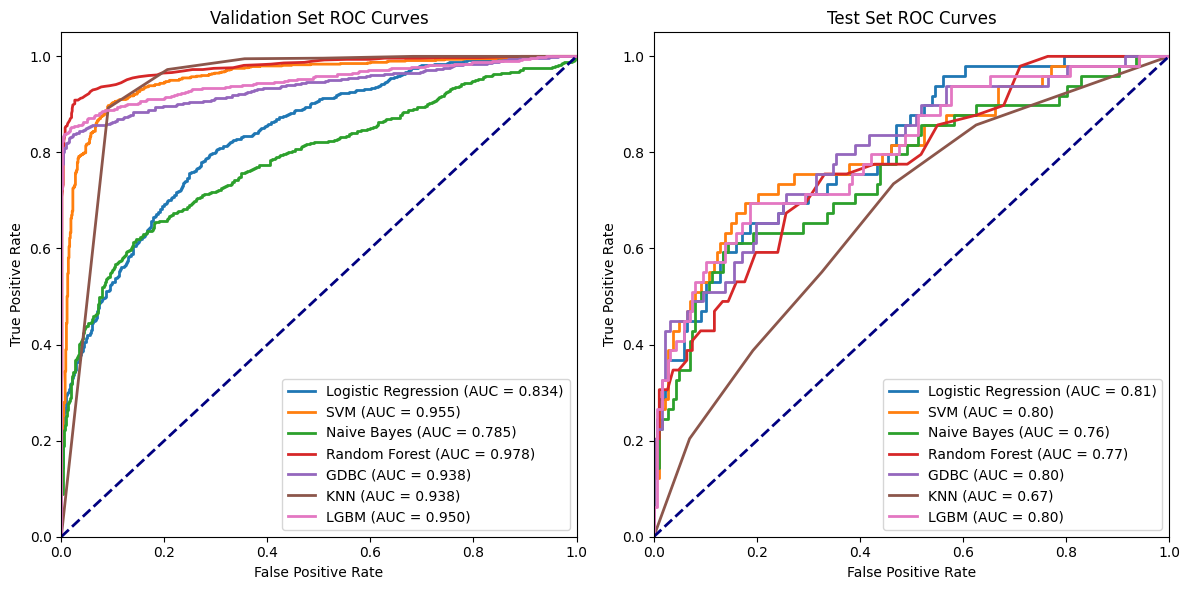

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier
# 假设你已经有了数据集 X_train, X_test, y_train, y_test

        # max_depth=10, max_features='sqrt', min_samples_leaf=1,
        # min_samples_split=10, n_estimators=200
# 定义模型及其最佳参数
models = {
    "Logistic Regression": LogisticRegression(random_state=43),
    "SVM": SVC(probability=True,random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=43
    ),
    "GDBC": GradientBoostingClassifier(random_state=45),
    "KNN":KNeighborsClassifier(), # KNN
    "LGBM":lgb.LGBMClassifier()
}

# 绘制验证集的 ROC 曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 左边图：验证集

for name, model in models.items():
    # 使用交叉验证获取验证集的预测概率
    y_pred_val = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_pred_val)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curves')
plt.legend(loc="lower right")

# 绘制测试集的 ROC 曲线
plt.subplot(1, 2, 2)  # 右边图：测试集

for name, model in models.items():
    # 训练模型并在测试集上进行预测
    model.fit(X_train, y_train)
    y_pred_test = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curves')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 调参之后

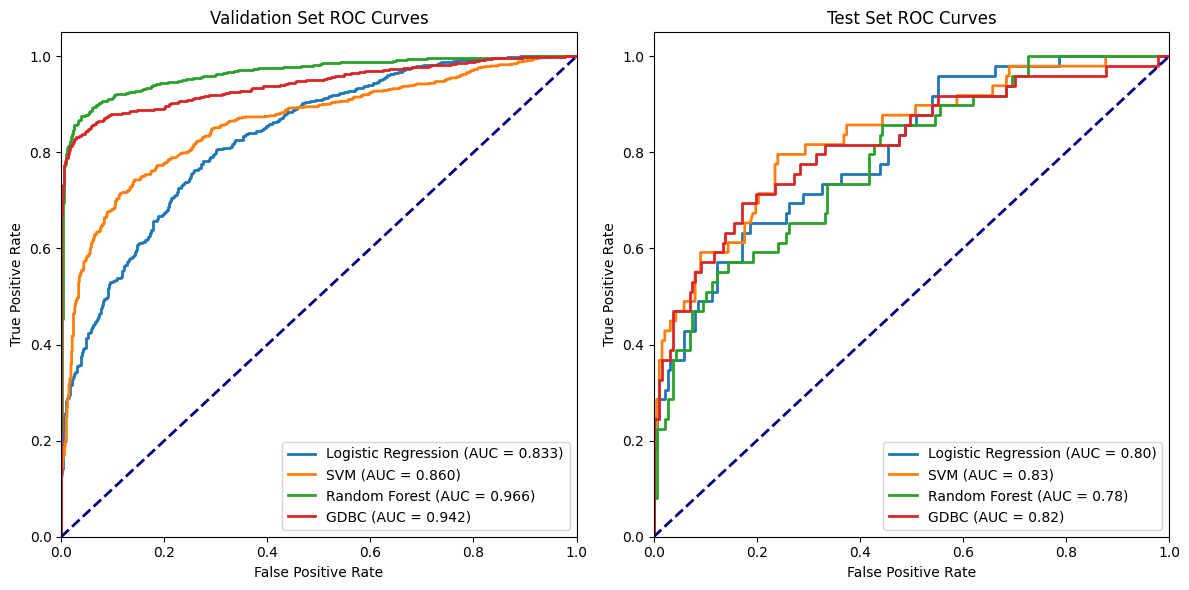

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier
# 假设你已经有了数据集 X_train, X_test, y_train, y_test

        # max_depth=10, max_features='sqrt', min_samples_leaf=1,
        # min_samples_split=10, n_estimators=200
# 定义模型及其最佳参数
models = {
    "Logistic Regression": LogisticRegression(C=10, penalty= 'l1', solver= 'liblinear'),
    "SVM": SVC(probability=True,C=1, gamma=0.01),
    "Random Forest": RandomForestClassifier(
        max_depth=15, min_samples_leaf=5,
        min_samples_split=14, n_estimators=200
    ),
    "GDBC": GradientBoostingClassifier(random_state=42,learning_rate=0.25, max_depth=2,subsample=1, max_features='sqrt'),
    
}

# 绘制验证集的 ROC 曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 左边图：验证集

for name, model in models.items():
    # 使用交叉验证获取验证集的预测概率
    y_pred_val = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_pred_val)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curves')
plt.legend(loc="lower right")

# 绘制测试集的 ROC 曲线
plt.subplot(1, 2, 2)  # 右边图：测试集

for name, model in models.items():
    # 训练模型并在测试集上进行预测
    model.fit(X_train, y_train)
    y_pred_test = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curves')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

### 画出F1 auc 准确率的曲线图

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_curve, auc
import xgboost as xgb
import catboost as cb
import lightgbm as lgb

# 封装评估函数
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # 训练模型
    model.fit(X_train, y_train)
    # 预测类别
    y_pred = model.predict(X_test)
    # 预测正类的概率
    y_score = model.predict_proba(X_test)[:, 1]

    # 评估模型
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # 计算 ROC 曲线的假正率、真正率和阈值
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    # 计算 AUC 值
    roc_auc = auc(fpr, tpr)

    return accuracy, f1, roc_auc


In [20]:
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier
# 初始化模型列表
models = [
    LogisticRegression(random_state=43),
    KNeighborsClassifier(), # KNN
    GaussianNB(),
    # cb.CatBoostClassifier(verbose=0),
    RandomForestClassifier(random_state=43),
    # lgb.LGBMClassifier(),
    SVC(probability=True,random_state=42),
    GradientBoostingClassifier(random_state=45),
    lgb.LGBMClassifier(random_state=42)
]

model_names = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Random Forest','SVC','GBDT','LGBM']
# model_names= ['XGBoost','Naive Bayes']
# 存储评估结果
accuracies = []
f1_scores = []
auc_scores = []

# 遍历每个模型进行评估
for model in models:
    accuracy, f1, roc_auc = evaluate_model(model, X_train, y_train, X_test, y_test)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    auc_scores.append(roc_auc)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 801, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4631
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [124]:
type(auc)

function

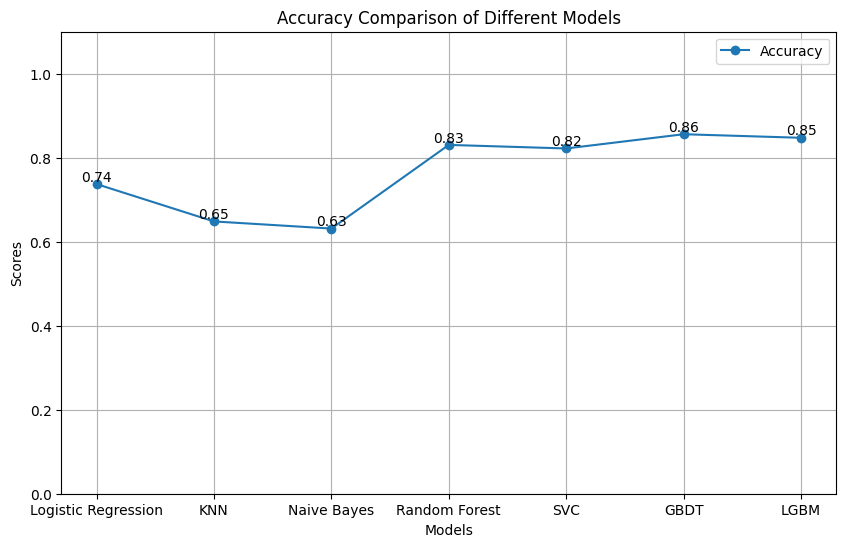

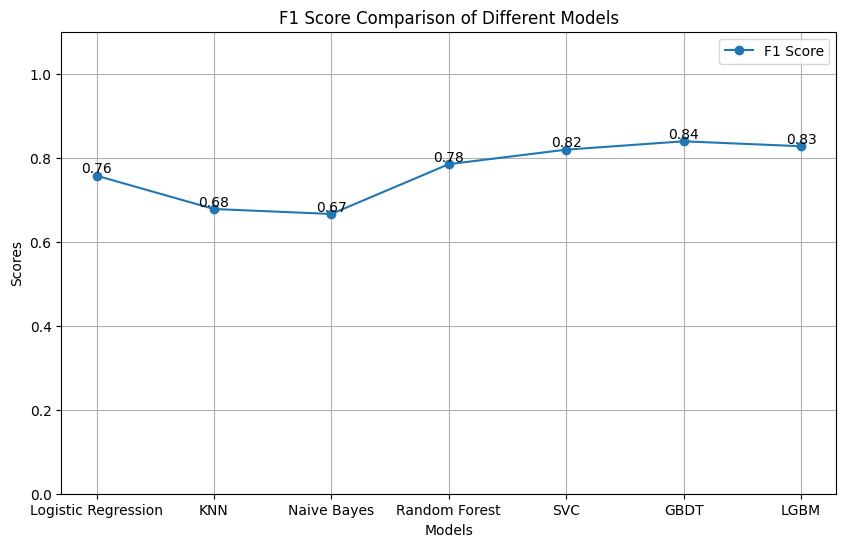

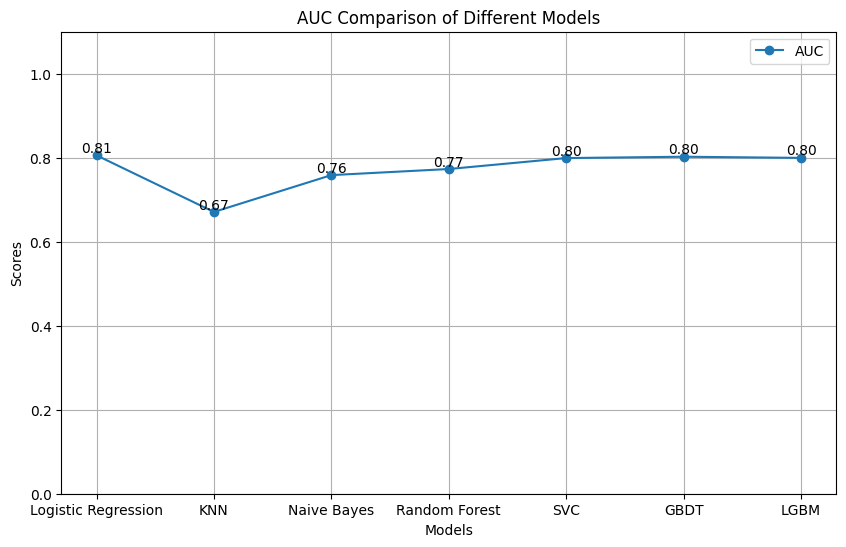

In [21]:
# 定义一个函数来绘制带标注的折线图
def plot_metric(model_names, metric_values, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(model_names, metric_values, marker='o', label=metric_name)
    # 标注数值
    for i, value in enumerate(metric_values):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title(f'{metric_name} Comparison of Different Models')
    plt.ylim(0, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()

# 绘制准确率折线图
plot_metric(model_names, accuracies, 'Accuracy')

# 绘制F1值折线图
plot_metric(model_names, f1_scores, 'F1 Score')

# 绘制AUC值折线图
plot_metric(model_names, auc_scores, 'AUC')

### 调参之后

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 801, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4631
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

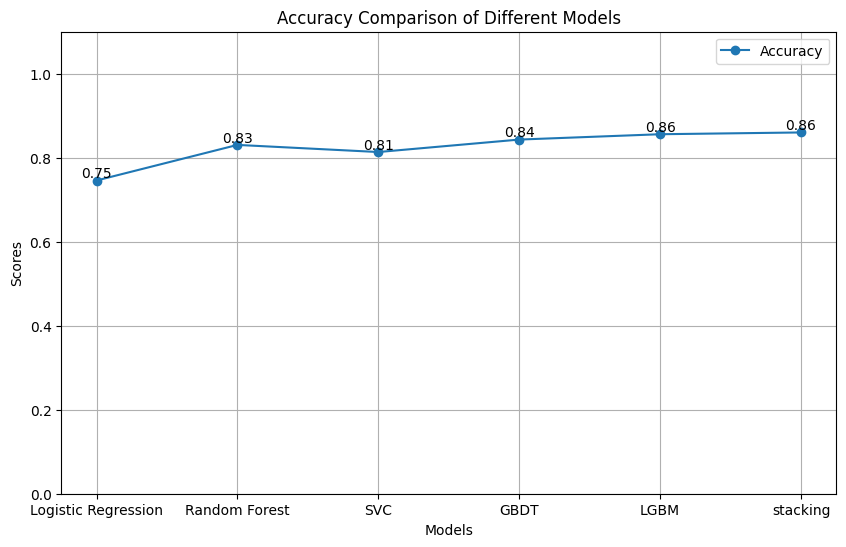

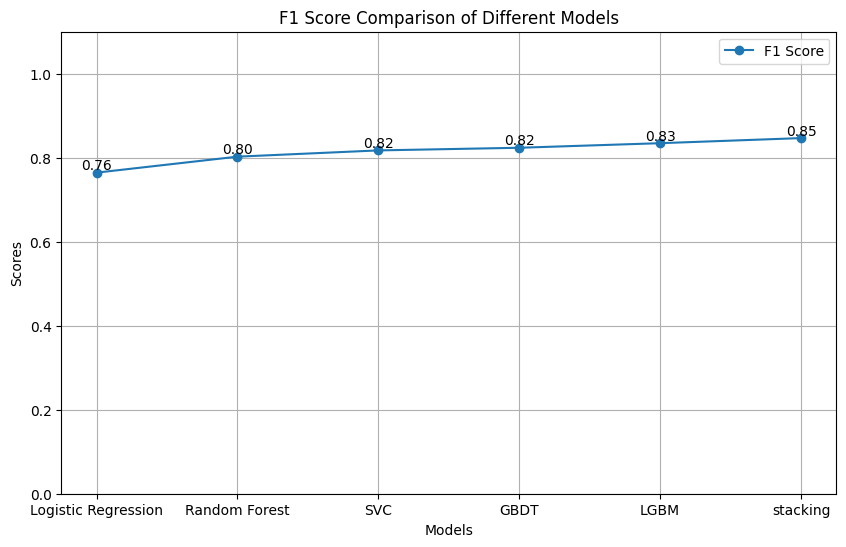

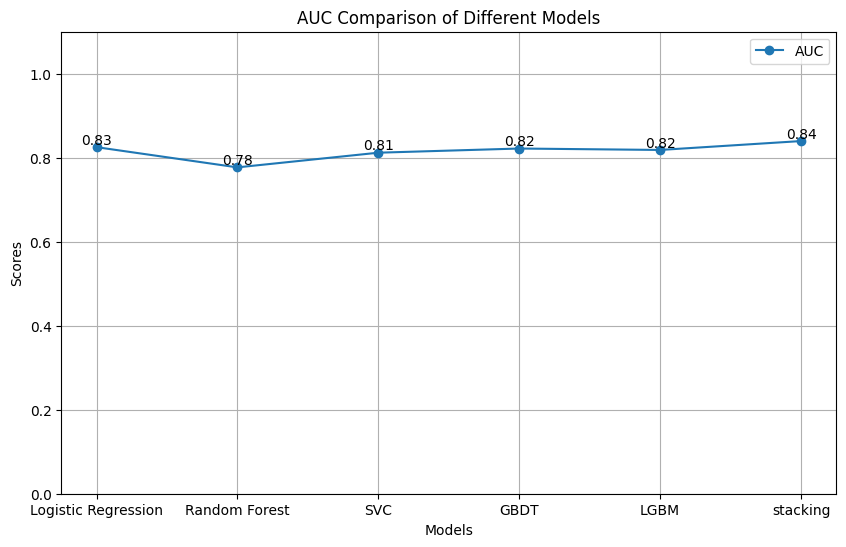

In [31]:
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 初始化模型列表
# #base_learners = [

#     ('rf', RandomForestClassifier(n_estimators=90,max_depth=8,min_samples_leaf=6)),
#     ('gbdt', GradientBoostingClassifier(learning_rate=0.25, max_depth=2, 
#                 subsample=1, max_features='sqrt')),
#     ('svm',SVC(C=1, gamma=0.01))
# ]

# # 定义元学习器（第二层分类器）
# meta_learner = LogisticRegression(penalty='l2',C=3) 
# 
# 定义模型
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=90, max_depth=8, min_samples_leaf=6, random_state=43)),
    ('gbdt', GradientBoostingClassifier(learning_rate=0.25, max_depth=2, random_state=45, subsample=1, max_features='sqrt')),
    ('svm', SVC(C=10, gamma=0.01, random_state=45, probability=True)),
    ('lightgbm', lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
                                    n_estimators=100, num_leaves=31, subsample=0.8))
]

meta_learner = LogisticRegression(C=0.05696421076895237, solver='lbfgs')

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# 定义StackingClassifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
models = [
    LogisticRegression(C=0.05696421076895237, solver='lbfgs',random_state=43),
    # KNeighborsClassifier(), # KNN
    # GaussianNB(),
    # cb.CatBoostClassifier(verbose=0),
    RandomForestClassifier(n_estimators=90,max_depth=8,min_samples_leaf=6,random_state=45),
    # lgb.LGBMClassifier(),
    SVC(C=10, gamma=0.01,random_state=45,probability=True),
    GradientBoostingClassifier(learning_rate=0.25, max_depth=2, random_state=45,
                subsample=1, max_features='sqrt'),
    lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
                                    n_estimators=100, num_leaves=31, subsample=0.8,random_state=23),
    stacking_model

]

model_names = ['Logistic Regression', 'Random Forest','SVC','GBDT','LGBM','stacking']
# model_names= ['XGBoost','Naive Bayes']
# 存储评估结果
accuracies = []
f1_scores = []
auc_scores = []

# 遍历每个模型进行评估
for model in models:
    accuracy, f1, roc_auc = evaluate_model(model, X_train, y_train, X_test, y_test)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    auc_scores.append(roc_auc)

# 绘制准确率折线图
plot_metric(model_names, accuracies, 'Accuracy')

# 绘制F1值折线图
plot_metric(model_names, f1_scores, 'F1 Score')

# 绘制AUC值折线图
plot_metric(model_names, auc_scores, 'AUC')

auc

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 801, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4631
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

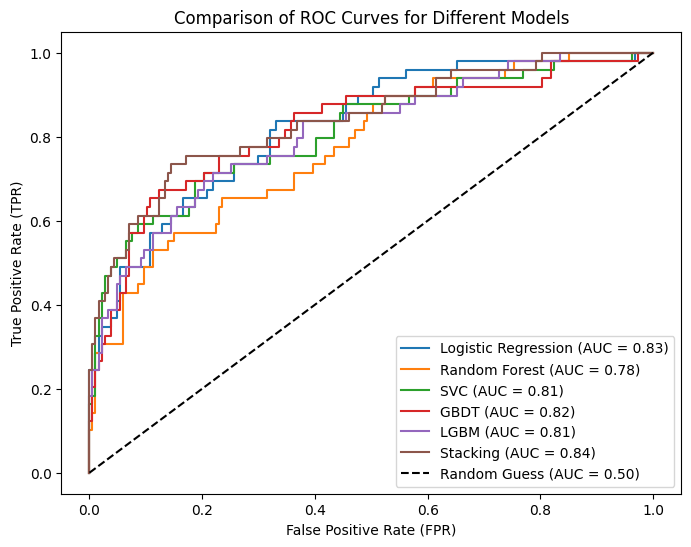

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# 假设 X_train, X_test, y_train, y_test 已经定义

# 定义模型
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=90, max_depth=8, min_samples_leaf=6, random_state=43)),
    ('gbdt', GradientBoostingClassifier(learning_rate=0.25, max_depth=2, random_state=45, subsample=1, max_features='sqrt')),
    ('svm', SVC(C=10, gamma=0.01, random_state=45, probability=True)),
    ('lightgbm', lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
                                    n_estimators=100, num_leaves=31, subsample=0.8))
]

meta_learner = LogisticRegression(C=0.05696421076895237, solver='lbfgs')

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

models = {
    'Logistic Regression': LogisticRegression(C=0.05696421076895237, solver='lbfgs',random_state=41),
    'Random Forest': RandomForestClassifier(n_estimators=90, max_depth=8, min_samples_leaf=6, random_state=45),
    'SVC': SVC(C=10, gamma=0.01, random_state=45, probability=True),
    'GBDT': GradientBoostingClassifier(learning_rate=0.25, max_depth=2, random_state=45, subsample=1, max_features='sqrt'),
    'LGBM': lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
                               n_estimators=100, num_leaves=31, subsample=0.8,random_state=42),
    'Stacking': stacking_model
}

# 画多个 ROC 曲线
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # 取正类的概率
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# 绘制对角线（随机分类器的 ROC）
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

# 设置图例和标题
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Comparison of ROC Curves for Different Models')
plt.legend(loc='lower right')

# 显示图像
plt.show()


### 画出PR曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# 假设 X_train, X_test, y_train, y_test 已经定义

# 定义模型
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=90, max_depth=8, min_samples_leaf=6, random_state=43)),
    ('gbdt', GradientBoostingClassifier(learning_rate=0.25, max_depth=2, random_state=45, subsample=1, max_features='sqrt')),
    ('svm', SVC(C=10, gamma=0.01, random_state=45, probability=True)),
    ('lightgbm', lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
                                    n_estimators=100, num_leaves=31, subsample=0.8))
]

meta_learner = LogisticRegression(C=0.05696421076895237, solver='lbfgs')

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

models = {
    'Logistic Regression': LogisticRegression(C=0.05696421076895237, solver='lbfgs', random_state=41),
    'Random Forest': RandomForestClassifier(n_estimators=90, max_depth=8, min_samples_leaf=6, random_state=45),
    'SVC': SVC(C=10, gamma=0.01, random_state=45, probability=True),
    'GBDT': GradientBoostingClassifier(learning_rate=0.25, max_depth=2, random_state=45, subsample=1, max_features='sqrt'),
    'LGBM': lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
                               n_estimators=100, num_leaves=31, subsample=0.8, random_state=42),
    'Stacking': stacking_model
}

# 画多个 PR 曲线
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # 取正类的概率
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (PR AUC = {pr_auc:.2f})')

# 设置图例和标题
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of Precision-Recall Curves for Different Models')
plt.legend(loc='lower left')

# 显示图像
plt.show()


NameError: name 'X_train' is not defined

<Figure size 800x600 with 0 Axes>

### 模型融合

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import lightgbm as lgb
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import catboost as cb

# 假设 X_train, X_test, y_train, y_test 是你已经准备好的训练和测试数据

# lr{'C': 124.15503013717493, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': 'balanced'}
# svc{'C': 70.20314474657421, 'kernel': 'rbf', 'gamma': 0.06730170359351065, 'class_weight': None}.
# rf{'n_estimators': 237, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3, 'class_weight': None}
#   ('logreg', LogisticRegression(C=0.05696421076895237, solver='lbfgs',class_weight='balanced')),
# xgb {'n_estimators': 628, 'learning_rate': 0.13417725668296787, 'max_depth': 5, 'subsample': 0.6374058908219749, 'colsample_bytree': 0.7653292476281399, 'gamma': 0.4094987931949272, 'reg_alpha': 4.855727115959089, 'reg_lambda': 0.5360691022682742}
#     ('xgboost', XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3,
#                     n_estimators=100, subsample=0.8)),
#     ('lightgbm', lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
#                                     n_estimators=100, num_leaves=31, subsample=0.8)),
#     # ('catboost', cb.CatBoostClassifier(verbose=0, iterations=395, depth=7, 
#     #                                     learning_rate=0.3156251048306349, l2_leaf_reg=10.938235283132196, 
#     #                                     border_count=73)),
#     ('svm',SVC(C=10, probability=True))

    # ('logreg', LogisticRegression(C=124.15503013717493, solver='liblinear',class_weight='balanced',penalty='l1')),
    # ('xgboost', XGBClassifier(colsample_bytree=0.7653292476281399, learning_rate=0.13417725668296787, max_depth=5,
    #                 n_estimators=628, subsample= 0.6374058908219749,gamma=0.4094987931949272,reg_alpha=4.855727115959089,reg_lambda=0.5360691022682742)),
    # ('lightgbm', RandomForestClassifier(min_samples_leaf=3, n_estimators=237,max_depth=5, min_samples_split=2)),
    # # ('catboost', cb.CatBoostClassifier(verbose=0, iterations=395, depth=7, 
    # #                                     learning_rate=0.3156251048306349, l2_leaf_reg=10.938235283132196, 
    # #                                     border_count=73)),
    # ('svm',SVC(C=70.20314474657421, probability=True,kernel='rbf',gamma=0.06730170359351065))
# 定义基础学习器（模型）

base_learners = [
# {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
    # ('rf', RandomForestClassifier(n_estimators=90,max_depth=8,min_samples_leaf=6,random_state=45)),
    ('gbdt', GradientBoostingClassifier(learning_rate=0.25, max_depth=2, random_state=45,
                subsample=1, max_features='sqrt')),
    ('svm',SVC(C=10, gamma=0.01,kernel='rbf',random_state=45)),
    ('lgbm',lgb.LGBMClassifier())
]

# 定义元学习器（第二层分类器）
meta_learner = LogisticRegression(C=10, penalty= 'l1', solver= 'liblinear')

# 定义StackingClassifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# 训练Stacking模型
stacking_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_stacking = stacking_model.predict_proba(X_test)[:, 1]

# 计算AUC分数
stacking_auc = roc_auc_score(y_test, y_pred_stacking)
print(f"Stacking AUC: {stacking_auc:.4f}")
# 原本的数据可以跑0.8631 现在只能跑0.8239


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 801, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4631
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 641, number of negative: 640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4587
[LightGBM] [Info] Number of data points in the train set: 1281, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.5

In [24]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 定义基学习器
base_learners = [
    ('rfc', RandomForestClassifier(max_depth=7, min_samples_leaf=4, n_estimators=50)),
    ('gdbt', GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100))
]

# 定义元学习器
meta_learner = LogisticRegression(C=0.5, solver='newton-cg')

# 定义 StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5  # 使用 5 折交叉验证生成元特征
)

# 计算 5 折交叉验证的 ROC AUC 得分
scores = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='roc_auc')

# 输出平均得分
print('%.3f' % (scores.mean()))

0.860


In [535]:
# 获取预测的概率值
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# 使用0.5的阈值将概率值转换为标签（0或1）
y_pred = (y_pred_proba > 0.5).astype(int)

# 计算F1值
f1 = f1_score(y_test, y_pred,average='weighted')
print(f"F1 Score (based on probabilities): {f1:.4f}")
# 0.8273

F1 Score (based on probabilities): 0.8296


最佳阈值: 0.3199999999999999
最大准确率: 0.8516949152542372


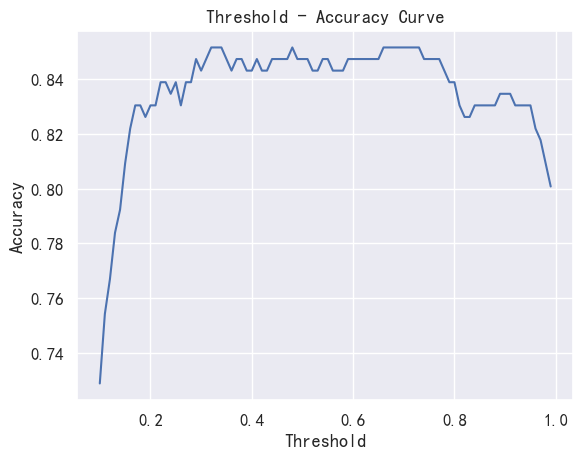

Confusion Matrix:
 [[174  13]
 [ 22  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       187
           1       0.68      0.55      0.61        49

    accuracy                           0.85       236
   macro avg       0.78      0.74      0.76       236
weighted avg       0.84      0.85      0.85       236



In [536]:
# 初始化列表用于存储不同阈值下的准确率
accuracies = []
thresholds = np.arange(0.1, 1, 0.01)  # 从0.1到1 每次增加0.01

# 从不同的阈值计算准确率
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)  # 将概率转换为类别
    accuracy = accuracy_score(y_test, y_pred)  # 计算准确率
    accuracies.append(accuracy)  # 保存准确率

# 找到最大准确率及其对应的阈值
max_accuracy_index = np.argmax(accuracies)  # 找到最大准确率的索引
optimal_threshold = thresholds[max_accuracy_index]  # 最佳阈值
max_accuracy = accuracies[max_accuracy_index]

print(f"最佳阈值: {optimal_threshold}")
print(f"最大准确率: {max_accuracy}")

# 绘制阈值 - 准确率曲线
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold - Accuracy Curve')
plt.grid(True)
plt.show()

# 输出混淆矩阵
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimal))

# 输出分类报告
print("Classification Report:\n", classification_report(y_test, y_pred_optimal))

最佳阈值: 0.3199999999999999
最大F1值: 0.8459388314944859


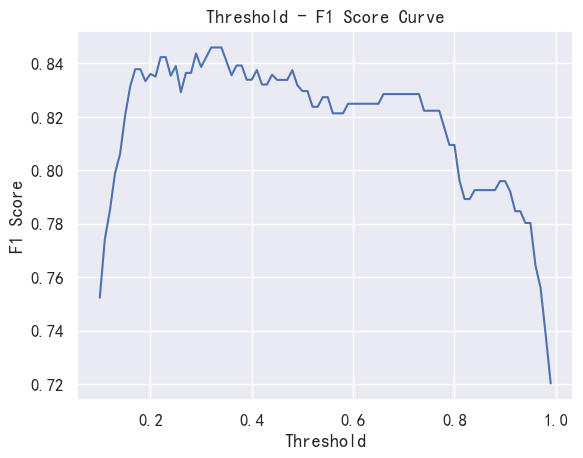

Confusion Matrix:
 [[174  13]
 [ 22  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       187
           1       0.68      0.55      0.61        49

    accuracy                           0.85       236
   macro avg       0.78      0.74      0.76       236
weighted avg       0.84      0.85      0.85       236



In [537]:
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 初始化列表用于存储不同阈值下的F1值
f1_scores = []
thresholds = np.arange(0.1, 1, 0.01)  # 从0.1到1 每次增加0.01

# 从不同的阈值计算F1值
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)  # 将概率转换为类别
    f1 = f1_score(y_test, y_pred,average='weighted')  # 计算F1值
    f1_scores.append(f1)  # 保存F1值

# 找到最大F1值及其对应的阈值
max_f1_index = np.argmax(f1_scores)  # 找到最大F1值的索引
optimal_threshold_f1 = thresholds[max_f1_index]  # 最佳阈值
max_f1 = f1_scores[max_f1_index]

print(f"最佳阈值: {optimal_threshold_f1}")
print(f"最大F1值: {max_f1}")

# 绘制阈值 - F1值曲线
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('Threshold - F1 Score Curve')
plt.grid(True)
plt.show()

# 输出混淆矩阵
y_pred_optimal_f1 = (y_pred_proba >= optimal_threshold_f1).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimal_f1))

# 输出分类报告
print("Classification Report:\n", classification_report(y_test, y_pred_optimal_f1))
# 最佳阈值: 0.29999999999999993
# 最大F1值: 0.8756673299938244


In [91]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 添加常数项
X_train_const = sm.add_constant(X_train)
# 检查共线性并删除高VIF特征
vif = pd.DataFrame()
vif["Feature"] = X_train_const.columns
vif["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
high_vif_features = vif[vif['VIF'] > 10]['Feature'].tolist()
print(high_vif_features)

divide by zero encountered in scalar divide
divide by zero encountered in scalar divide


['Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']


In [371]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [528]:
import optuna
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# 假设 X, y 是你的数据
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 目标函数：优化 AUC
def objective(trial):
    # 选择基学习器（Base Learners）
    base_models = []
    
    if trial.suggest_categorical("use_rf", [True, False]):
        base_models.append(("rf", RandomForestClassifier(
            n_estimators=trial.suggest_int("rf_n_estimators", 50, 200),
            max_depth=trial.suggest_int("rf_max_depth", 5, 15)
        )))
    
    if trial.suggest_categorical("use_gbdt", [True, False]):
        base_models.append(("gbdt", GradientBoostingClassifier(
            learning_rate=trial.suggest_float("gbdt_learning_rate", 0.01, 0.2),
            max_depth=trial.suggest_int("gbdt_max_depth", 3, 6)
        )))
    
    if trial.suggest_categorical("use_et", [True, False]):
        base_models.append(("et", ExtraTreesClassifier(
            n_estimators=trial.suggest_int("et_n_estimators", 50, 200),
            max_depth=trial.suggest_int("et_max_depth", 5, 15)
        )))
    
    if trial.suggest_categorical("use_knn", [True, False]):
        base_models.append(("knn", KNeighborsClassifier(
            n_neighbors=trial.suggest_int("knn_n_neighbors", 3, 15)
        )))
    
    if trial.suggest_categorical("use_lr", [True, False]):
        base_models.append(("lr", LogisticRegression(
            C=trial.suggest_float("lr_C", 0.1, 10.0),
            penalty='l1',
            solver='liblinear'
        )))

    if len(base_models) == 0:
        return 0.5  # 至少要有一个模型，否则返回默认值

    # 选择元学习器（Meta Learner）
    meta_learner_choice = trial.suggest_categorical("meta_learner", ["SVM", "LR"])
    
    if meta_learner_choice == "SVM":
        meta_learner = SVC(
            C=trial.suggest_float("svm_C", 0.1, 10.0),
            gamma=trial.suggest_float("svm_gamma", 0.001, 0.1),
            probability=True
        )
    else:
        meta_learner = LogisticRegression(
            C=trial.suggest_float("meta_lr_C", 0.1, 10.0),
            penalty='l1',
            solver='liblinear'
        )

    # 构建 Stacking 模型
    model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)
    model.fit(X_train, y_train)

    # 计算 AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)

    return auc_score  # Optuna 自动优化这个分数

# 运行 Optuna 搜索
study = optuna.create_study(direction="maximize")  # 目标是最大化 AUC
study.optimize(objective, n_trials=50)  # 进行 50 次搜索

# 输出最佳参数
print("最佳参数: ", study.best_params)

# 训练最优模型
best_params = study.best_params

# 选择最佳的基学习器
final_learners = []
if best_params["use_rf"]:
    final_learners.append(("rf", RandomForestClassifier(n_estimators=best_params["rf_n_estimators"], max_depth=best_params["rf_max_depth"])))
if best_params["use_gbdt"]:
    final_learners.append(("gbdt", GradientBoostingClassifier(learning_rate=best_params["gbdt_learning_rate"], max_depth=best_params["gbdt_max_depth"])))
if best_params["use_et"]:
    final_learners.append(("et", ExtraTreesClassifier(n_estimators=best_params["et_n_estimators"], max_depth=best_params["et_max_depth"])))
if best_params["use_knn"]:
    final_learners.append(("knn", KNeighborsClassifier(n_neighbors=best_params["knn_n_neighbors"])))
if best_params["use_lr"]:
    final_learners.append(("lr", LogisticRegression(C=best_params["lr_C"], penalty='l1', solver='liblinear')))

# 选择最佳的元学习器
if best_params["meta_learner"] == "SVM":
    final_meta_learner = SVC(C=best_params["svm_C"], gamma=best_params["svm_gamma"], probability=True)
else:
    final_meta_learner = LogisticRegression(C=best_params["meta_lr_C"], penalty='l1', solver='liblinear')

# 训练最终模型
best_model = StackingClassifier(estimators=final_learners, final_estimator=final_meta_learner)
best_model.fit(X_train, y_train)

# 计算最终 AUC
y_pred_best = best_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_pred_best)
print(f"最终 Stacking AUC: {final_auc:.4f}")


[I 2025-03-23 21:58:43,695] A new study created in memory with name: no-name-020d360a-185b-4eb8-aa81-0d36e5f9f5f6
[I 2025-03-23 21:58:43,814] Trial 0 finished with value: 0.8022481719960711 and parameters: {'use_rf': False, 'use_gbdt': False, 'use_et': False, 'use_knn': False, 'use_lr': True, 'lr_C': 5.06288674505471, 'meta_learner': 'LR', 'meta_lr_C': 9.170096443073843}. Best is trial 0 with value: 0.8022481719960711.
[I 2025-03-23 21:58:44,249] Trial 1 finished with value: 0.8023027392775293 and parameters: {'use_rf': False, 'use_gbdt': False, 'use_et': False, 'use_knn': False, 'use_lr': True, 'lr_C': 6.212644895654995, 'meta_learner': 'SVM', 'svm_C': 0.1899101735693244, 'svm_gamma': 0.08023094607171583}. Best is trial 1 with value: 0.8023027392775293.
[I 2025-03-23 21:58:45,447] Trial 2 finished with value: 0.7382953181272508 and parameters: {'use_rf': False, 'use_gbdt': False, 'use_et': True, 'et_n_estimators': 101, 'et_max_depth': 11, 'use_knn': False, 'use_lr': False, 'meta_learn

最佳参数:  {'use_rf': False, 'use_gbdt': True, 'gbdt_learning_rate': 0.15572282176526364, 'gbdt_max_depth': 4, 'use_et': False, 'use_knn': False, 'use_lr': True, 'lr_C': 0.7343343864190679, 'meta_learner': 'LR', 'meta_lr_C': 3.3460705899695755}
最终 Stacking AUC: 0.8218


## 可解释新分析

Optimization terminated successfully.
         Current function value: 0.480325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1602
Model:                          Logit   Df Residuals:                     1574
Method:                           MLE   Df Model:                           27
Date:                  周日, 23 3月 2025   Pseudo R-squ.:                  0.3070
Time:                        01:29:04   Log-Likelihood:                -769.48
converged:                       True   LL-Null:                       -1110.4
Covariance Type:            nonrobust   LLR p-value:                2.357e-126
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.5018      0.369     -6

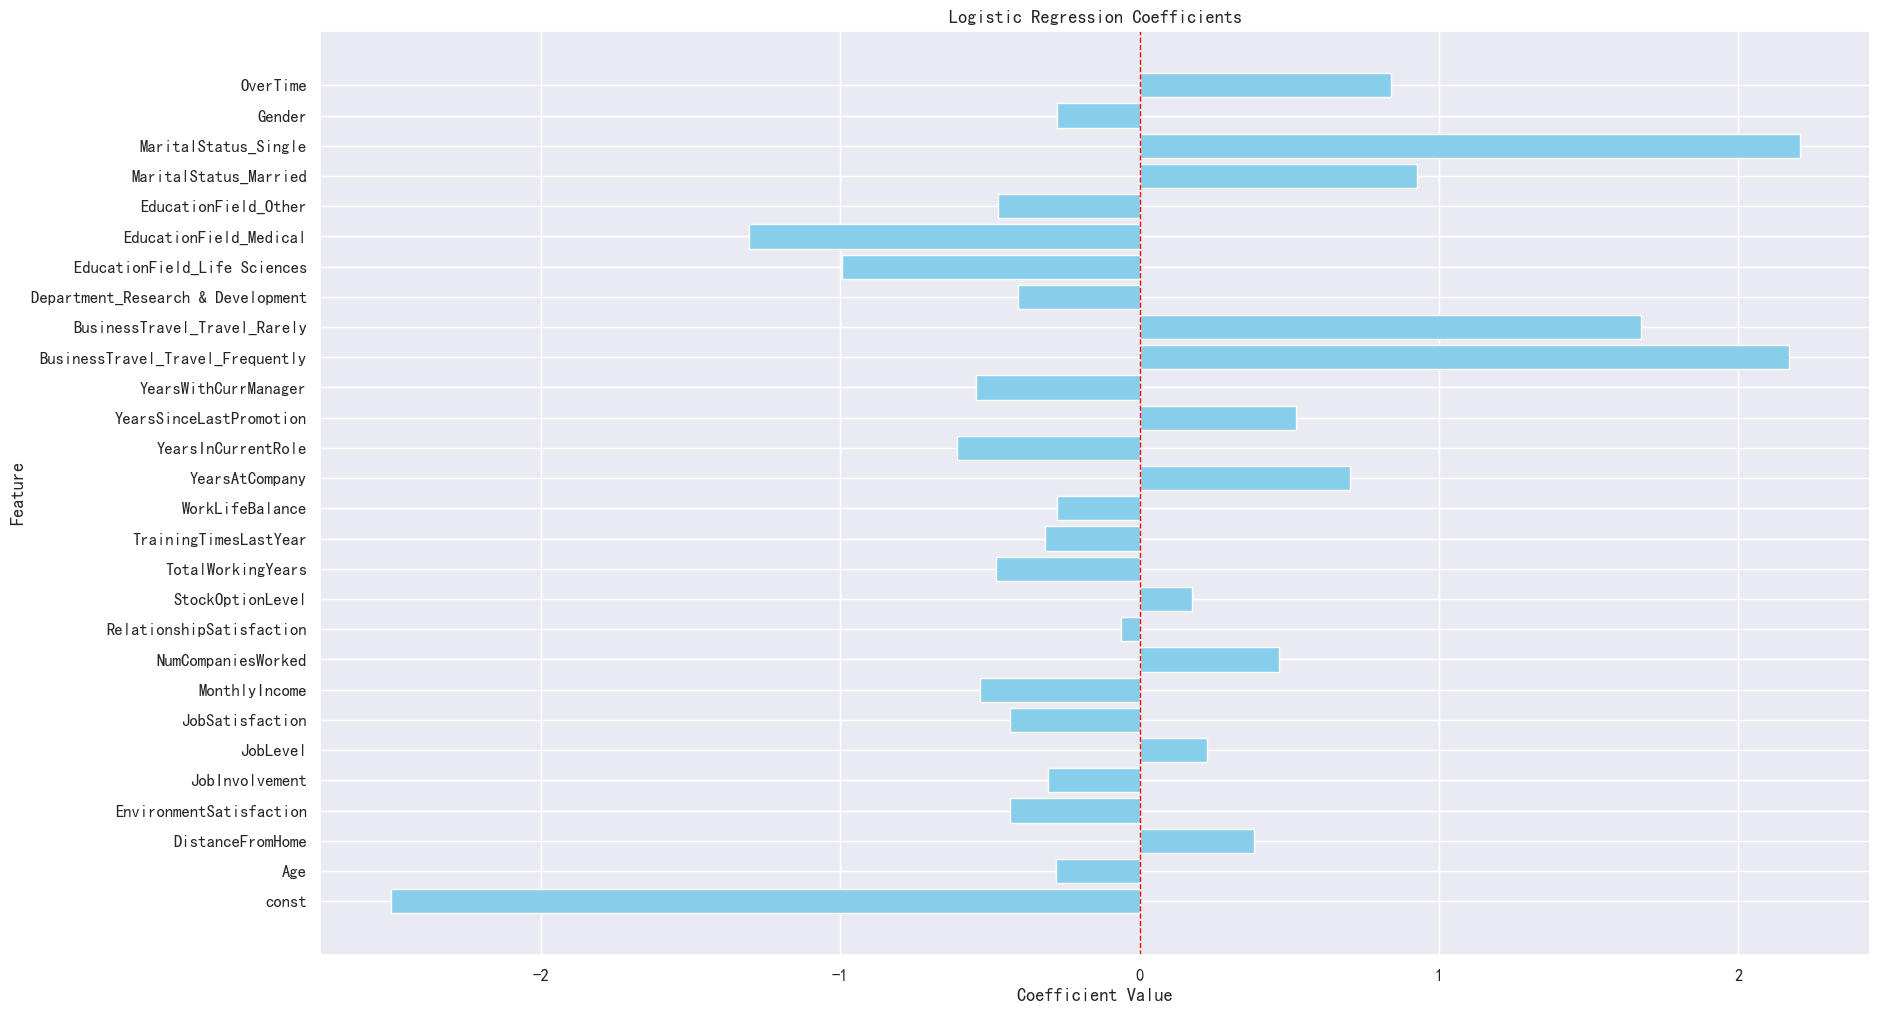

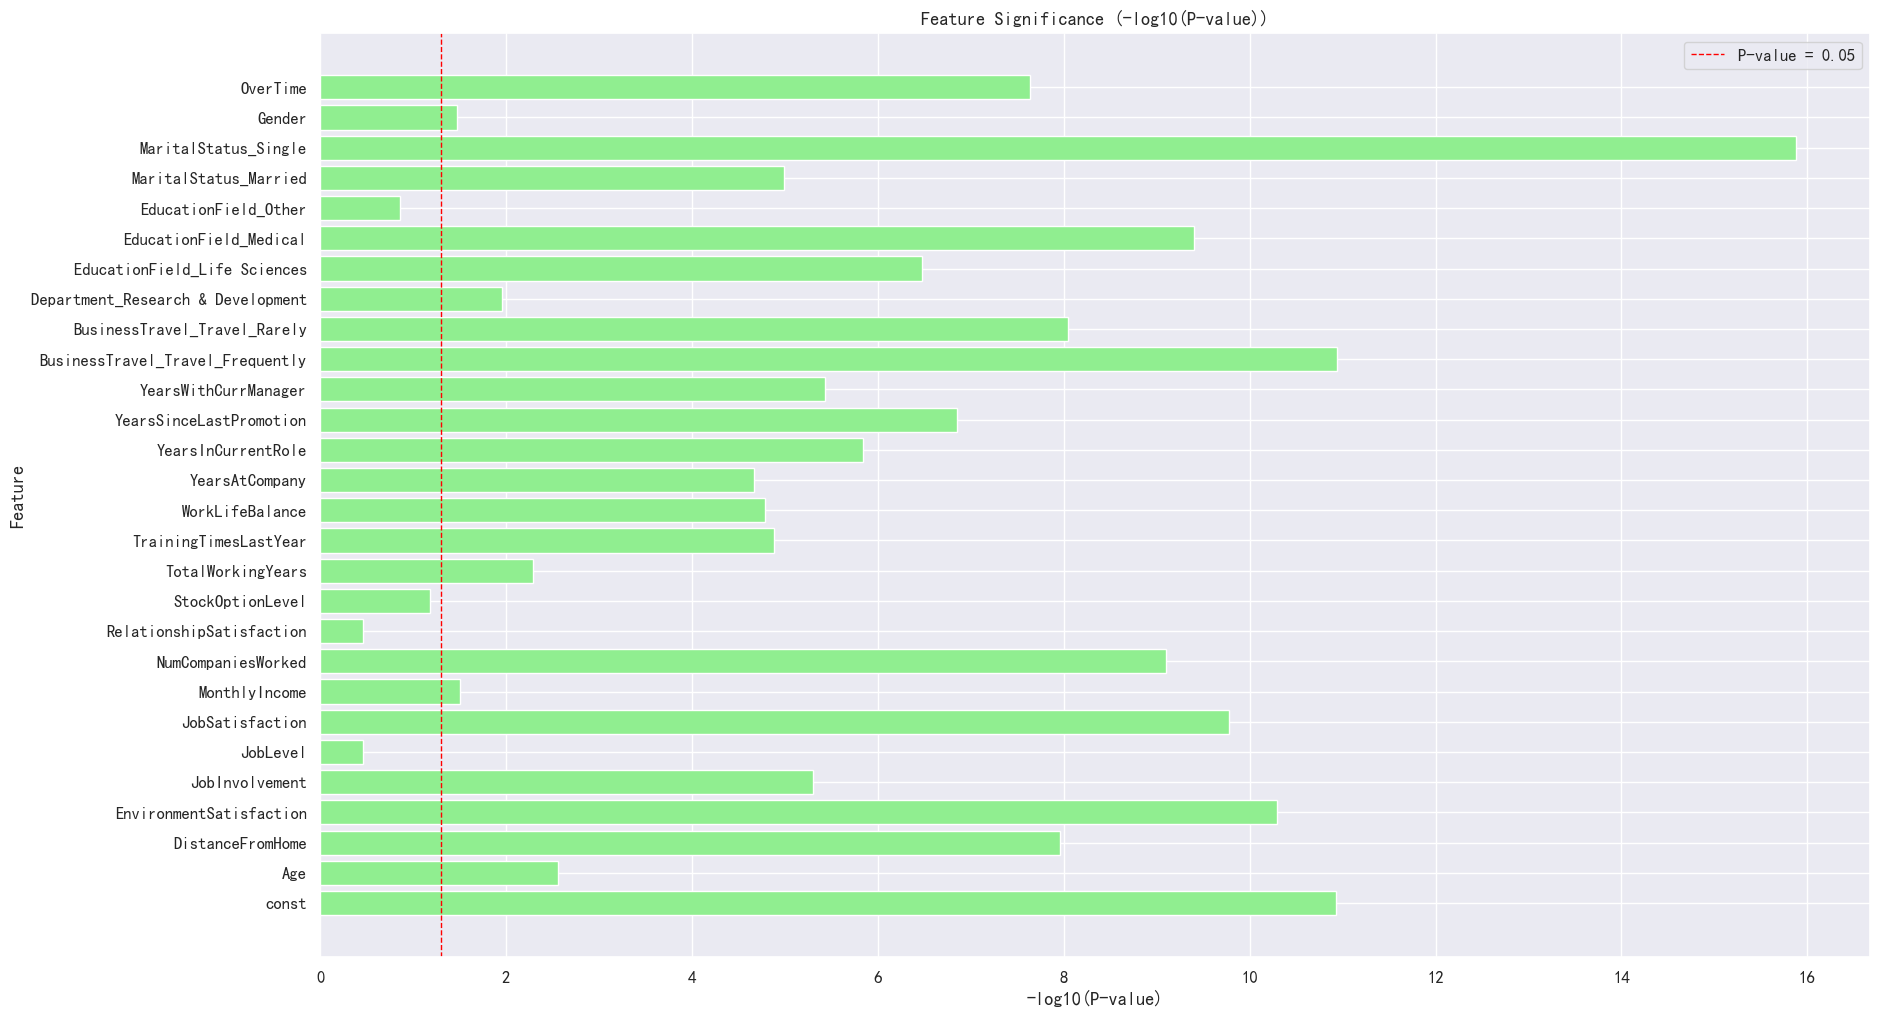

In [481]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 假设你已经有了数据集 X_train, y_train

# 添加常数项（截距）
X_train_const = sm.add_constant(X_train)

# 使用 statsmodels 拟合逻辑回归模型
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit(maxiter=300)

# 输出模型摘要
print(result.summary())

# 提取系数和 p 值
params = result.params  # 系数
p_values = result.pvalues  # p 值

# 创建一个 DataFrame 来存储系数和 p 值
coef_df = pd.DataFrame({
    'Feature': X_train_const.columns,
    'Coefficient': params,
    'P-value': p_values
})

# 打印系数和 p 值
print(coef_df)

# 绘制显著性图（系数条形图）
plt.figure(figsize=(20, 12))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

# 绘制显著性图（p 值条形图）
plt.figure(figsize=(20, 12))
plt.barh(coef_df['Feature'], -np.log10(coef_df['P-value']), color='lightgreen')
plt.axvline(x=-np.log10(0.05), color='red', linestyle='--', linewidth=1, label='P-value = 0.05')
plt.xlabel('-log10(P-value)')
plt.ylabel('Feature')
plt.title('Feature Significance (-log10(P-value))')
plt.legend()
plt.show()

检查列名是否重复

In [462]:
# 检查列名是否重复
if len(X_train.columns) != len(set(X_train.columns)):
    print("存在重复列名:")
    print(X_train.columns[X_train.columns.duplicated()])
else:
    print("列名无重复。")

列名无重复。


In [464]:
constant_features = X_train.columns[X_train.nunique() == 1]
if len(constant_features) > 0:
    print("常数特征:", constant_features)
    X_train = X_train.drop(columns=constant_features)

常数特征: Index(['EmployeeCount', 'StandardHours'], dtype='object')


In [482]:
# shap解释需要计算shap值，才可以后续可视化
import shap
import lightgbm as lgb

# 使用最佳参数重新训练一个新的 LightGBM 模型
best_params = {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 63}
lgb_best = lgb.LGBMClassifier(**best_params)
lgb_best.fit(X_train, y_train)

# 使用 shap 进行解释
# 创建一个 SHAP 解释器，使用训练好的 LightGBM 模型
explainer = shap.Explainer(lgb_best)

# 计算 SHAP 值，使用训练集
shap_values = explainer.shap_values(X_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 801, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4631
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


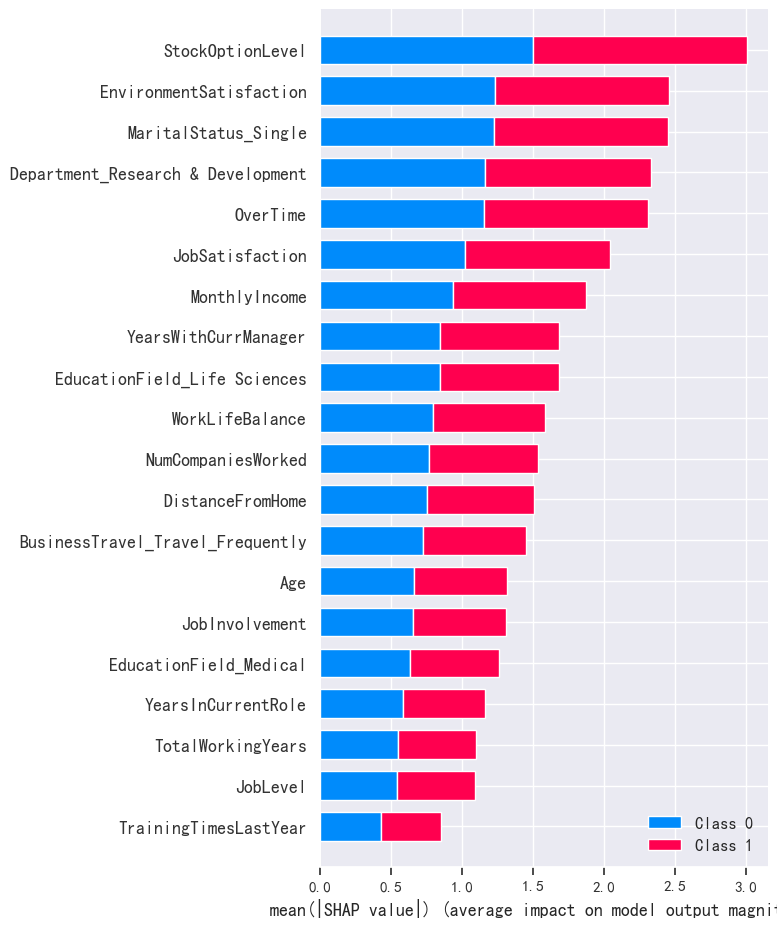

In [483]:
# 可视化所有类别的SHAP 汇总图
shap.summary_plot(shap_values, X_train)

In [318]:
from sklearn.svm import SVC

# 假设已经训练好线性 SVM 模型
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 获取特征重要性（系数的绝对值）
svm_feature_importance = np.abs(svm_model.coef_[0])

# 输出特征重要性排名
svm_feature_ranking = np.argsort(svm_feature_importance)[::-1]  # 从大到小排序
print("SVM 特征重要性排名:", svm_feature_ranking)
print("SVM 特征重要性值:", svm_feature_importance[svm_feature_ranking])

SVM 特征重要性排名: [ 5 41  2 39 30 42 16 40 29 23 17 12 20 34 37 21 32 15 18 31 13  6 25 28
  0 35 14 19 10 26  4 33 22 27  1  8 36 11  7 38  9  3 24]
SVM 特征重要性值: [4.66365666e+00 4.51910531e+00 4.30518186e+00 4.21869773e+00
 7.93130412e-01 7.85441056e-01 6.64937939e-01 6.38114660e-01
 6.11470879e-01 5.65549523e-01 5.03832519e-01 5.00480484e-01
 4.97444133e-01 4.67505361e-01 4.46063277e-01 4.42553559e-01
 3.95073832e-01 3.83260806e-01 3.80073970e-01 3.62441318e-01
 3.22473982e-01 3.13920941e-01 3.06678272e-01 3.05025797e-01
 2.75334876e-01 2.68417431e-01 2.54601503e-01 2.54180956e-01
 2.50068709e-01 2.45640204e-01 2.32086563e-01 2.18694559e-01
 2.05124708e-01 1.93589172e-01 1.92872128e-01 1.89840849e-01
 1.77645846e-01 1.65715969e-01 1.07915381e-01 6.94432253e-02
 5.25636783e-02 2.64741818e-02 1.14403151e-03]


Spearman 相关系数: -0.06898656898656899, p-value: 0.7324183489147094


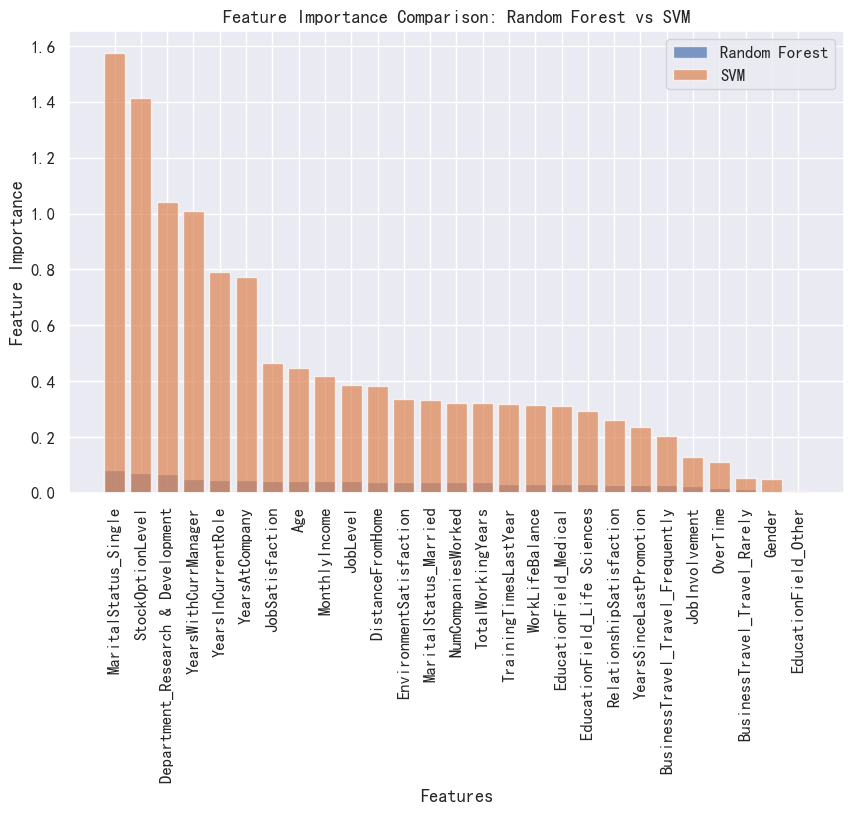

In [484]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import spearmanr
import shap

# 假设 X_train, y_train, X_test 已经定义

# 随机森林模型
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_feature_importance = rf_model.feature_importances_
rf_feature_ranking = np.argsort(rf_feature_importance)[::-1]

# SVM 模型（线性核）
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_feature_importance = np.abs(svm_model.coef_[0])
svm_feature_ranking = np.argsort(svm_feature_importance)[::-1]

# 计算 Spearman 相关系数
correlation, p_value = spearmanr(rf_feature_ranking, svm_feature_ranking)
print(f"Spearman 相关系数: {correlation}, p-value: {p_value}")

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_feature_importance)), rf_feature_importance[rf_feature_ranking], alpha=0.7, label='Random Forest')
plt.bar(range(len(svm_feature_importance)), svm_feature_importance[svm_feature_ranking], alpha=0.7, label='SVM')
plt.xticks(range(len(rf_feature_importance)), X_train.columns[rf_feature_ranking], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Comparison: Random Forest vs SVM')
plt.legend()
plt.show()

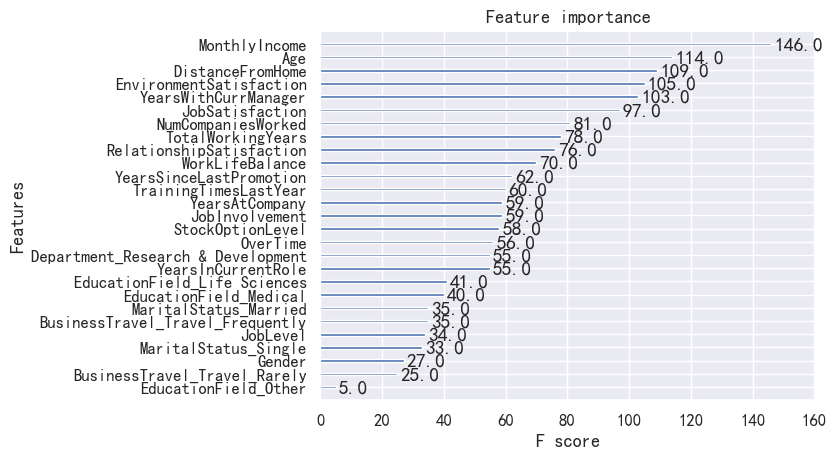

In [485]:
import xgboost as xgb
import matplotlib.pyplot as plt

# 训练 XGBoost 模型
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 绘制特征重要性
xgb.plot_importance(xgb_model)
plt.show()


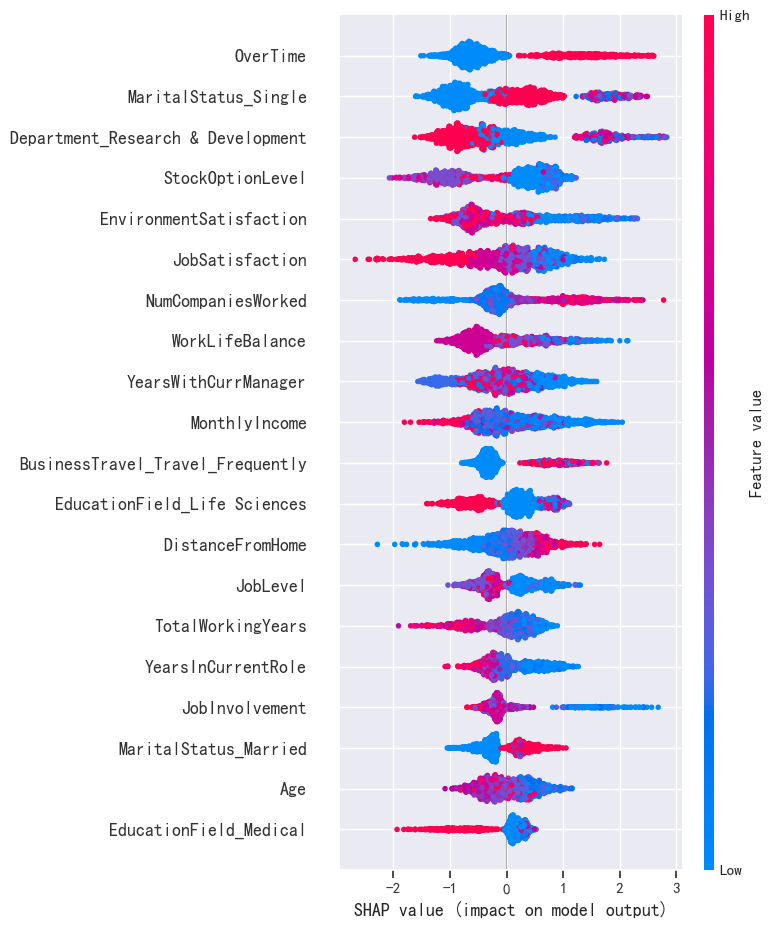

In [486]:
import shap

# 计算 SHAP 值
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

# 绘制 SHAP 特征重要性图
shap.summary_plot(shap_values, X_train)


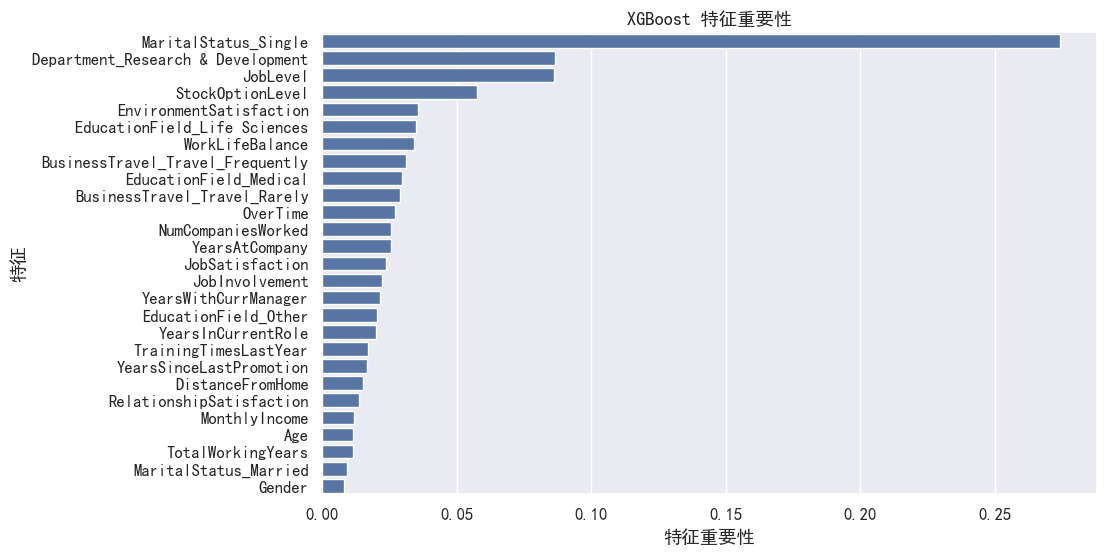

In [487]:
import numpy as np
import pandas as pd
import seaborn as sns

# 获取特征重要性
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns

# 创建 DataFrame 并排序
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# 绘制柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.xlabel("特征重要性")
plt.ylabel("特征")
plt.title("XGBoost 特征重要性")
plt.show()


### 投票法

In [559]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
voting_clf = VotingClassifier(estimators=[
    ('rfc',RandomForestClassifier(max_depth=7,min_samples_leaf=4,n_estimators=50)),
   ('gdbt',GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=100)),
     ('lr',LogisticRegression(C=0.5,solver='newton-cg'))
], voting='soft')
scores=cross_val_score(voting_clf,X_train,y_train,cv=5,scoring='roc_auc')
print('%.3f'%(scores.mean()))
# 0.967

0.967


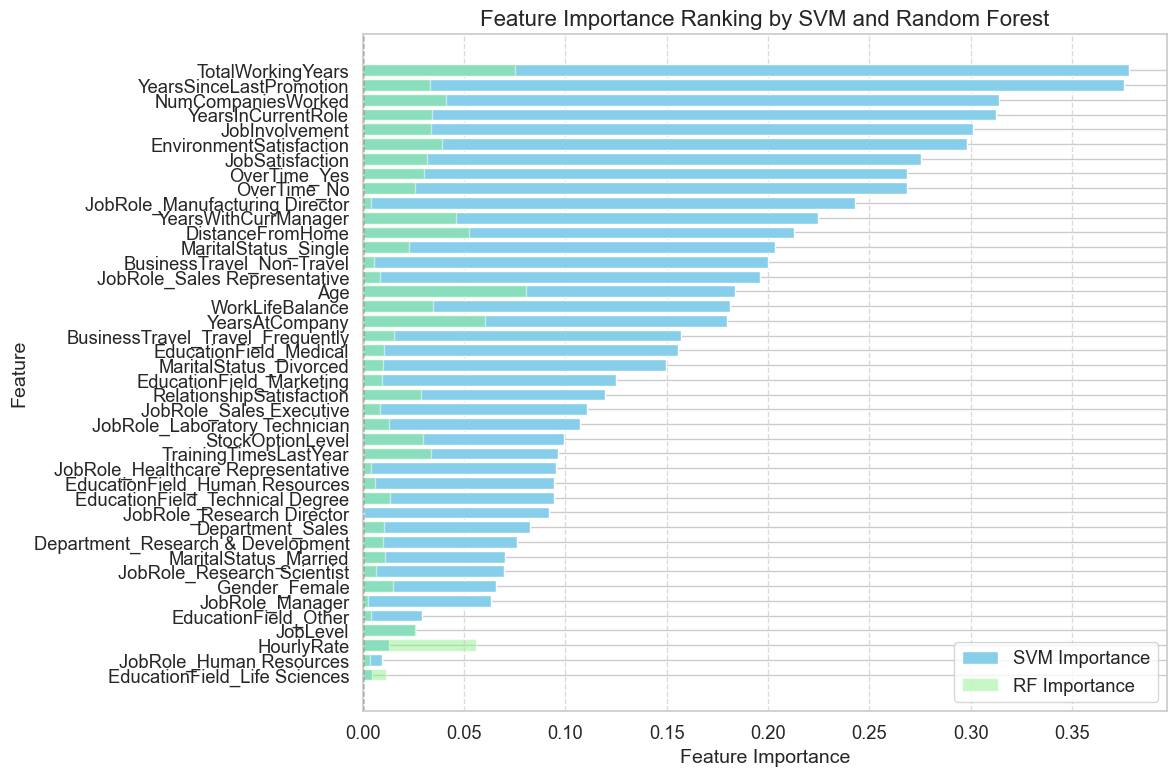

Selected Features by RFE: ['TotalWorkingYears', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction', 'OverTime_Yes', 'JobRole_Manufacturing Director', 'YearsWithCurrManager', 'MaritalStatus_Single']


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# 假设 X_train 和 y_train 是训练数据
# 假设 X_train 包含特征，y_train 是目标变量（离职与否）

# 标准化数据（SVM 对数据尺度敏感）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 使用 SVM 模型
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# 提取 SVM 的系数（特征重要性）
svm_feature_importance = np.abs(svm_model.coef_[0])

# 使用随机森林模型
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 提取随机森林的特征重要性
rf_feature_importance = rf_model.feature_importances_

# 使用递归特征消除（RFE）选择重要特征
rfe = RFE(estimator=svm_model, n_features_to_select=10)  # 选择前 10 个重要特征
rfe.fit(X_train_scaled, y_train)
rfe_feature_importance = rfe.support_.astype(int)  # 1 表示被选中，0 表示未被选中

# 创建一个 DataFrame 来存储特征重要性
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'SVM Importance': svm_feature_importance,
    'RF Importance': rf_feature_importance,
    'RFE Selected': rfe_feature_importance
})

# 按 SVM 特征重要性排序
feature_importance_df = feature_importance_df.sort_values(by='SVM Importance', ascending=False)

# 绘制特征重要性排名图
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['SVM Importance'], color='skyblue', label='SVM Importance')
plt.barh(feature_importance_df['Feature'], feature_importance_df['RF Importance'], color='lightgreen', alpha=0.5, label='RF Importance')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance Ranking by SVM and Random Forest', fontsize=16)
plt.legend(loc='lower right')
plt.gca().invert_yaxis()  # 反转 y 轴
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 输出被 RFE 选中的特征
selected_features = feature_importance_df[feature_importance_df['RFE Selected'] == 1]['Feature']
print("Selected Features by RFE:", selected_features.tolist())

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

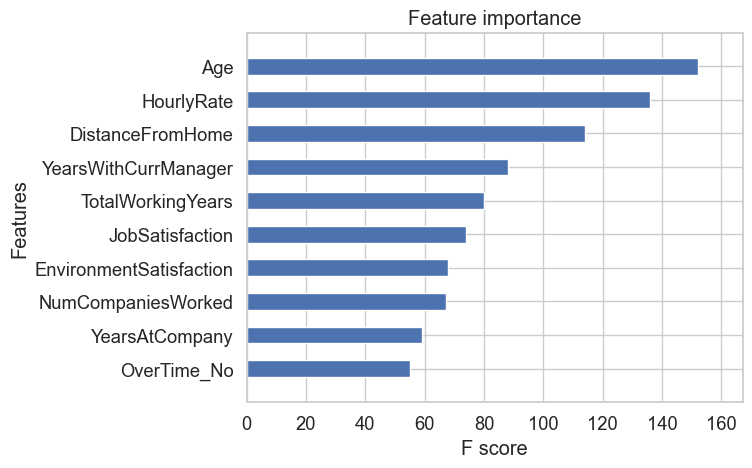

In [142]:
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='mlogloss').fit(X_train, y_train) # type: ignore
xgboost.plot_importance(model,height = .5, 
                        max_num_features=10,
                        show_values = False)

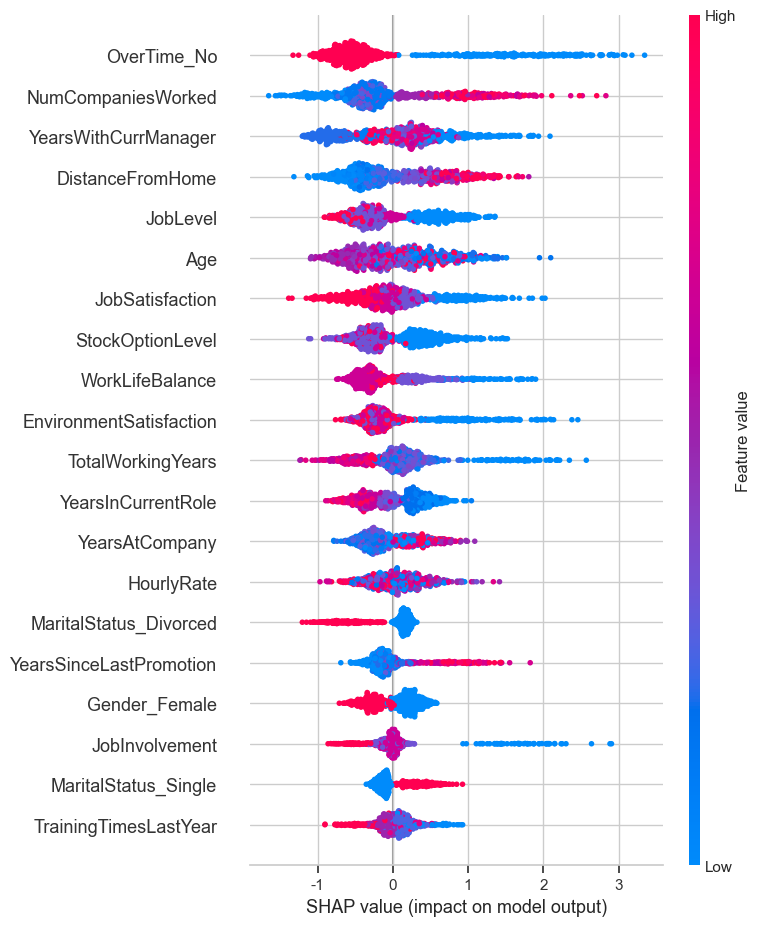

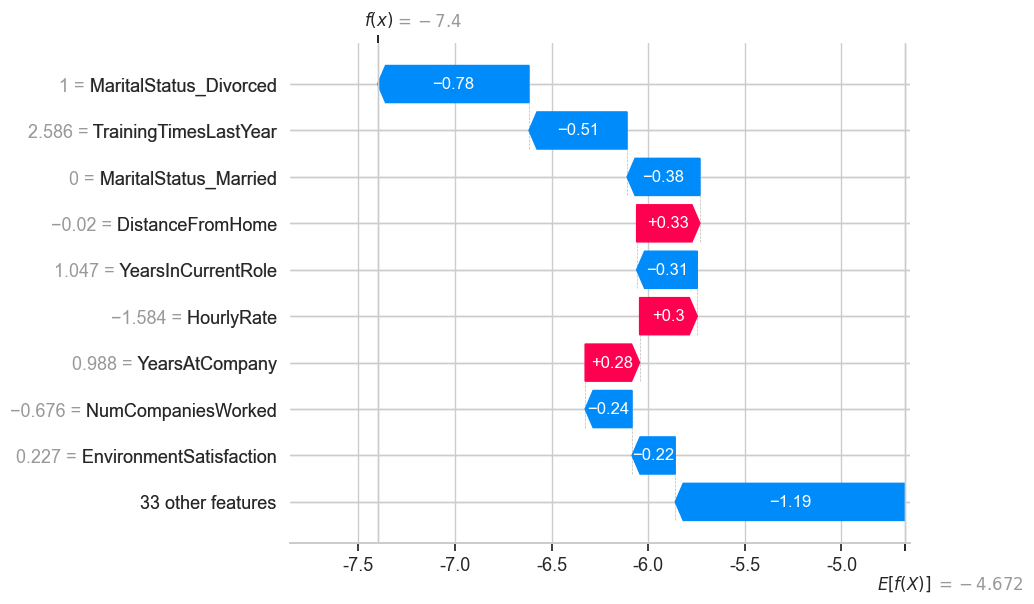

In [143]:
import shap

# 训练 XGBoost 模型
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# 计算 SHAP 值
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

# 画出整体特征重要性
shap.summary_plot(shap_values, X_train)

# 画出单个样本的 SHAP 分析（局部解释）
shap.plots.waterfall(shap_values[0])




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



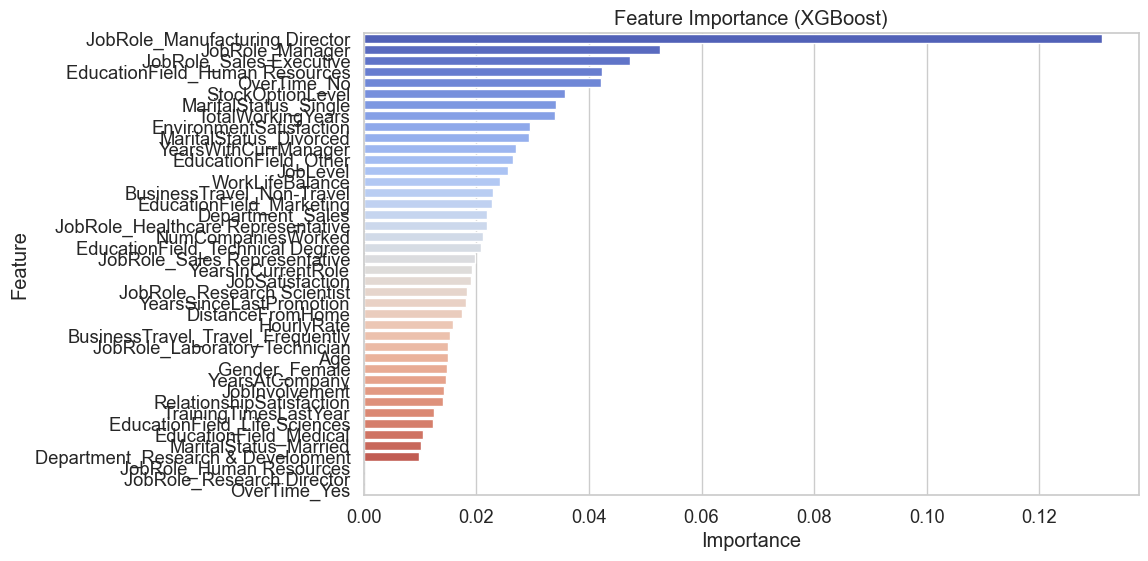

In [144]:
# 获取特征重要性
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns

# 可视化特征重要性
import matplotlib.pyplot as plt
import seaborn as sns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importance (XGBoost)')
plt.show()
